In [1]:
from IPython.display import Image
from glob import glob
import pandas as pd
import numpy as np
import os
from pathlib import Path
import subprocess
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord

In [2]:
#os.environ["PYSPARK_GATEWAY_PORT"]=45323
#os.environ["PYSPARK_GATEWAY_SECRET"]=1f5c85fdccaec5212a9cb3beadf12b67308ab20df4a4a43b00c0d91e7c6c6855
#os.environ["PYSPARK_PIN_THREAD"]=true

spark = SparkSession.builder.appName('MastersProject').getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/04/04 13:23:58 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
taxon = '\"Escherichia coli\"'
pwd = "/home/infosebi/Documents/MastersProject"
number_of_genomes=5

In [4]:
# Parameters
taxon = "'Rhodothermus'"
pwd = "/home/infosebi/Documents/Programmieren/MastersProject/rhodothermus"
number_of_genomes = 10


In [5]:
os.chdir(pwd)
taxon_file = taxon.lower().replace(" ", "_").replace("\'", "")
subprocess.run(f"""ncbi-datasets summary genome taxon {str(taxon)} --assembly-level complete --assembly-source genbank --annotated>  {taxon_file}.json""", shell=True)
p = subprocess.Popen(f"""jq '.total_count' {taxon_file}.json""", stdout=subprocess.PIPE, shell=True)
print(p.stdout.read().decode('ascii').strip())

New version of client (14.20.0) available at https://ftp.ncbi.nlm.nih.gov/pub/datasets/command-line/LATEST/linux-amd64/datasets


4


In [6]:
subprocess.run(f"cat {taxon_file}.json | jq -r '.reports[] | [.accession, .organism.infraspecific_names.strain, .organism.tax_id, .assembly_stats.total_sequence_length, .assembly_stats.gc_count, .assembly_stats.contig_n50, .annotation_info.stats.gene_counts.total] | @tsv' | head -{number_of_genomes} > info_table.tsv", shell=True) 

CompletedProcess(args="cat rhodothermus.json | jq -r '.reports[] | [.accession, .organism.infraspecific_names.strain, .organism.tax_id, .assembly_stats.total_sequence_length, .assembly_stats.gc_count, .assembly_stats.contig_n50, .annotation_info.stats.gene_counts.total] | @tsv' | head -10 > info_table.tsv", returncode=0)

In [7]:
subprocess.run(f"cat {taxon_file}.json | jq -r '.reports[]| .accession' | head -{number_of_genomes} > accession_list.txt", shell=True)

CompletedProcess(args="cat rhodothermus.json | jq -r '.reports[]| .accession' | head -10 > accession_list.txt", returncode=0)

In [8]:
subprocess.run(f"ncbi-datasets download genome accession --include gbff --inputfile accession_list.txt --filename {taxon_file}.zip", shell=True)

New version of client (14.20.0) available at https://ftp.ncbi.nlm.nih.gov/pub/datasets/command-line/LATEST/linux-amd64/datasets


Downloading: rhodothermus.zip    855B 7.12MB/s
Downloading: rhodothermus.zip    855B 7.12MB/s
Downloading: rhodothermus.zip    855B 7.12MB/s
Downloading: rhodothermus.zip    855B 7.12MB/s
Downloading: rhodothermus.zip    855B 7.12MB/s
Downloading: rhodothermus.zip    855B 7.12MB/s
Downloading: rhodothermus.zip    855B 7.12MB/s
Downloading: rhodothermus.zip    855B 7.12MB/s
Downloading: rhodothermus.zip    855B 7.12MB/s
Downloading: rhodothermus.zip    855B 7.12MB/s
Downloading: rhodothermus.zip    855B 7.12MB/s
Downloading: rhodothermus.zip    855B 7.12MB/s
Downloading: rhodothermus.zip    855B 7.12MB/s
Downloading: rhodothermus.zip    855B 7.12MB/s
Downloading: rhodothermus.zip    855B 7.12MB/s
Downloading: rhodothermus.zip    855B 7.12MB/s


Downloading: rhodothermus.zip    855B 7.12MB/s
Downloading: rhodothermus.zip    855B 7.12MB/s
Downloading: rhodothermus.zip    855B 7.12MB/s
Downloading: rhodothermus.zip    855B 7.12MB/s
Downloading: rhodothermus.zip    855B 7.12MB/s
Downloading: rhodothermus.zip    855B 7.12MB/s
Downloading: rhodothermus.zip    855B 7.12MB/s
Downloading: rhodothermus.zip    5.15kB 21.5kB/s
Downloading: rhodothermus.zip    5.15kB 21.5kB/s
Downloading: rhodothermus.zip    5.15kB 21.5kB/s
Downloading: rhodothermus.zip    5.15kB 21.5kB/s
Downloading: rhodothermus.zip    5.15kB 21.5kB/s
Downloading: rhodothermus.zip    5.15kB 21.5kB/s
Downloading: rhodothermus.zip    5.15kB 21.5kB/s
Downloading: rhodothermus.zip    5.15kB 21.5kB/s
Downloading: rhodothermus.zip    5.24kB 16.4kB/s
Downloading: rhodothermus.zip    5.24kB 16.4kB/s
Downloading: rhodothermus.zip    5.24kB 16.4kB/s
Downloading: rhodothermus.zip    5.24kB 16.4kB/s
Downloading: rhodothermus.zip    5.24kB 16.4kB/s


Downloading: rhodothermus.zip    5.24kB 16.4kB/s
Downloading: rhodothermus.zip    5.24kB 16.4kB/s
Downloading: rhodothermus.zip    5.24kB 16.4kB/s
Downloading: rhodothermus.zip    5.24kB 16.4kB/s
Downloading: rhodothermus.zip    5.24kB 16.4kB/s
Downloading: rhodothermus.zip    5.24kB 16.4kB/s
Downloading: rhodothermus.zip    5.24kB 16.4kB/s
Downloading: rhodothermus.zip    5.24kB 16.4kB/s
Downloading: rhodothermus.zip    5.24kB 16.4kB/s
Downloading: rhodothermus.zip    5.24kB 16.4kB/s
Downloading: rhodothermus.zip    5.24kB 16.4kB/s
Downloading: rhodothermus.zip    5.24kB 16.4kB/s
Downloading: rhodothermus.zip    32.8kB 65.9kB/s
Downloading: rhodothermus.zip    32.8kB 65.9kB/s
Downloading: rhodothermus.zip    32.8kB 65.9kB/s
Downloading: rhodothermus.zip    32.8kB 65.9kB/s
Downloading: rhodothermus.zip    32.8kB 65.9kB/s
Downloading: rhodothermus.zip    32.8kB 65.9kB/s
Downloading: rhodothermus.zip    32.8kB 65.9kB/s
Downloading: rhodothermus.zip    32.8kB 65.9kB/s


Downloading: rhodothermus.zip    32.8kB 65.9kB/s
Downloading: rhodothermus.zip    32.8kB 65.9kB/s
Downloading: rhodothermus.zip    32.8kB 65.9kB/s
Downloading: rhodothermus.zip    32.8kB 65.9kB/s
Downloading: rhodothermus.zip    32.8kB 65.9kB/s
Downloading: rhodothermus.zip    65.5kB 103kB/s
Downloading: rhodothermus.zip    65.5kB 103kB/s
Downloading: rhodothermus.zip    98.3kB 150kB/s
Downloading: rhodothermus.zip    131kB 198kB/s
Downloading: rhodothermus.zip    131kB 198kB/s
Downloading: rhodothermus.zip    131kB 198kB/s
Downloading: rhodothermus.zip    131kB 198kB/s
Downloading: rhodothermus.zip    131kB 198kB/s
Downloading: rhodothermus.zip    131kB 198kB/s
Downloading: rhodothermus.zip    131kB 198kB/s
Downloading: rhodothermus.zip    131kB 198kB/s
Downloading: rhodothermus.zip    131kB 198kB/s
Downloading: rhodothermus.zip    131kB 198kB/s
Downloading: rhodothermus.zip    131kB 198kB/s
Downloading: rhodothermus.zip    131kB 198kB/s


Downloading: rhodothermus.zip    131kB 198kB/s
Downloading: rhodothermus.zip    131kB 198kB/s
Downloading: rhodothermus.zip    131kB 198kB/s
Downloading: rhodothermus.zip    131kB 198kB/s
Downloading: rhodothermus.zip    131kB 198kB/s
Downloading: rhodothermus.zip    131kB 198kB/s
Downloading: rhodothermus.zip    131kB 198kB/s
Downloading: rhodothermus.zip    295kB 341kB/s
Downloading: rhodothermus.zip    295kB 341kB/s
Downloading: rhodothermus.zip    295kB 341kB/s
Downloading: rhodothermus.zip    295kB 341kB/s
Downloading: rhodothermus.zip    295kB 341kB/s
Downloading: rhodothermus.zip    295kB 341kB/s
Downloading: rhodothermus.zip    295kB 341kB/s
Downloading: rhodothermus.zip    295kB 341kB/s
Downloading: rhodothermus.zip    295kB 341kB/s
Downloading: rhodothermus.zip    295kB 341kB/s
Downloading: rhodothermus.zip    295kB 341kB/s
Downloading: rhodothermus.zip    295kB 341kB/s
Downloading: rhodothermus.zip    295kB 341kB/s


Downloading: rhodothermus.zip    295kB 341kB/s
Downloading: rhodothermus.zip    295kB 341kB/s
Downloading: rhodothermus.zip    295kB 341kB/s
Downloading: rhodothermus.zip    295kB 341kB/s
Downloading: rhodothermus.zip    295kB 341kB/s
Downloading: rhodothermus.zip    295kB 341kB/s
Downloading: rhodothermus.zip    393kB 370kB/s
Downloading: rhodothermus.zip    492kB 460kB/s
Downloading: rhodothermus.zip    492kB 460kB/s
Downloading: rhodothermus.zip    492kB 460kB/s
Downloading: rhodothermus.zip    492kB 460kB/s
Downloading: rhodothermus.zip    492kB 460kB/s
Downloading: rhodothermus.zip    492kB 460kB/s
Downloading: rhodothermus.zip    492kB 460kB/s
Downloading: rhodothermus.zip    492kB 460kB/s
Downloading: rhodothermus.zip    492kB 460kB/s
Downloading: rhodothermus.zip    492kB 460kB/s
Downloading: rhodothermus.zip    492kB 460kB/s
Downloading: rhodothermus.zip    492kB 460kB/s
Downloading: rhodothermus.zip    492kB 460kB/s


Downloading: rhodothermus.zip    492kB 460kB/s
Downloading: rhodothermus.zip    492kB 460kB/s
Downloading: rhodothermus.zip    492kB 460kB/s
Downloading: rhodothermus.zip    492kB 460kB/s
Downloading: rhodothermus.zip    492kB 460kB/s
Downloading: rhodothermus.zip    492kB 460kB/s
Downloading: rhodothermus.zip    492kB 460kB/s
Downloading: rhodothermus.zip    492kB 460kB/s
Downloading: rhodothermus.zip    492kB 460kB/s
Downloading: rhodothermus.zip    492kB 460kB/s
Downloading: rhodothermus.zip    492kB 460kB/s
Downloading: rhodothermus.zip    492kB 460kB/s
Downloading: rhodothermus.zip    492kB 460kB/s
Downloading: rhodothermus.zip    524kB 390kB/s
Downloading: rhodothermus.zip    688kB 507kB/s
Downloading: rhodothermus.zip    885kB 647kB/s
Downloading: rhodothermus.zip    885kB 647kB/s
Downloading: rhodothermus.zip    885kB 647kB/s
Downloading: rhodothermus.zip    885kB 647kB/s
Downloading: rhodothermus.zip    885kB 647kB/s


Downloading: rhodothermus.zip    885kB 647kB/s
Downloading: rhodothermus.zip    885kB 647kB/s
Downloading: rhodothermus.zip    885kB 647kB/s
Downloading: rhodothermus.zip    885kB 647kB/s
Downloading: rhodothermus.zip    885kB 647kB/s
Downloading: rhodothermus.zip    885kB 647kB/s
Downloading: rhodothermus.zip    885kB 647kB/s
Downloading: rhodothermus.zip    885kB 647kB/s
Downloading: rhodothermus.zip    885kB 647kB/s
Downloading: rhodothermus.zip    885kB 647kB/s
Downloading: rhodothermus.zip    885kB 647kB/s
Downloading: rhodothermus.zip    885kB 647kB/s
Downloading: rhodothermus.zip    885kB 647kB/s
Downloading: rhodothermus.zip    885kB 647kB/s
Downloading: rhodothermus.zip    885kB 647kB/s
Downloading: rhodothermus.zip    983kB 624kB/s
Downloading: rhodothermus.zip    1.05MB 663kB/s
Downloading: rhodothermus.zip    1.05MB 663kB/s
Downloading: rhodothermus.zip    1.05MB 663kB/s
Downloading: rhodothermus.zip    1.05MB 663kB/s


Downloading: rhodothermus.zip    1.05MB 663kB/s
Downloading: rhodothermus.zip    1.05MB 663kB/s
Downloading: rhodothermus.zip    1.05MB 663kB/s
Downloading: rhodothermus.zip    1.05MB 663kB/s
Downloading: rhodothermus.zip    1.05MB 663kB/s
Downloading: rhodothermus.zip    1.05MB 663kB/s
Downloading: rhodothermus.zip    1.05MB 663kB/s
Downloading: rhodothermus.zip    1.05MB 663kB/s
Downloading: rhodothermus.zip    1.05MB 663kB/s
Downloading: rhodothermus.zip    1.05MB 663kB/s
Downloading: rhodothermus.zip    1.05MB 663kB/s
Downloading: rhodothermus.zip    1.05MB 663kB/s
Downloading: rhodothermus.zip    1.05MB 663kB/s
Downloading: rhodothermus.zip    1.05MB 663kB/s
Downloading: rhodothermus.zip    1.05MB 663kB/s
Downloading: rhodothermus.zip    1.05MB 663kB/s
Downloading: rhodothermus.zip    1.05MB 663kB/s
Downloading: rhodothermus.zip    1.05MB 663kB/s
Downloading: rhodothermus.zip    1.05MB 663kB/s
Downloading: rhodothermus.zip    1.05MB 663kB/s


Downloading: rhodothermus.zip    1.05MB 663kB/s
Downloading: rhodothermus.zip    1.05MB 663kB/s
Downloading: rhodothermus.zip    1.05MB 663kB/s
Downloading: rhodothermus.zip    1.05MB 663kB/s
Downloading: rhodothermus.zip    1.05MB 663kB/s
Downloading: rhodothermus.zip    1.05MB 663kB/s
Downloading: rhodothermus.zip    1.05MB 663kB/s
Downloading: rhodothermus.zip    1.05MB 663kB/s
Downloading: rhodothermus.zip    1.05MB 663kB/s
Downloading: rhodothermus.zip    1.05MB 663kB/s
Downloading: rhodothermus.zip    1.05MB 663kB/s
Downloading: rhodothermus.zip    1.05MB 663kB/s
Downloading: rhodothermus.zip    1.05MB 663kB/s
Downloading: rhodothermus.zip    1.05MB 663kB/s
Downloading: rhodothermus.zip    1.11MB 562kB/s
Downloading: rhodothermus.zip    1.28MB 643kB/s
Downloading: rhodothermus.zip    1.28MB 643kB/s
Downloading: rhodothermus.zip    1.28MB 643kB/s
Downloading: rhodothermus.zip    1.28MB 643kB/s
Downloading: rhodothermus.zip    1.28MB 643kB/s


Downloading: rhodothermus.zip    1.28MB 643kB/s
Downloading: rhodothermus.zip    1.28MB 643kB/s
Downloading: rhodothermus.zip    1.28MB 643kB/s
Downloading: rhodothermus.zip    1.28MB 643kB/s
Downloading: rhodothermus.zip    1.28MB 643kB/s
Downloading: rhodothermus.zip    1.28MB 643kB/s
Downloading: rhodothermus.zip    1.28MB 643kB/s
Downloading: rhodothermus.zip    1.28MB 643kB/s
Downloading: rhodothermus.zip    1.28MB 643kB/s
Downloading: rhodothermus.zip    1.28MB 643kB/s
Downloading: rhodothermus.zip    1.28MB 643kB/s
Downloading: rhodothermus.zip    1.28MB 643kB/s
Downloading: rhodothermus.zip    1.28MB 643kB/s
Downloading: rhodothermus.zip    1.28MB 643kB/s
Downloading: rhodothermus.zip    1.38MB 629kB/s
Downloading: rhodothermus.zip    1.54MB 702kB/s
Downloading: rhodothermus.zip    1.54MB 702kB/s
Downloading: rhodothermus.zip    1.54MB 702kB/s
Downloading: rhodothermus.zip    1.54MB 702kB/s
Downloading: rhodothermus.zip    1.54MB 702kB/s


Downloading: rhodothermus.zip    1.54MB 702kB/s
Downloading: rhodothermus.zip    1.54MB 702kB/s
Downloading: rhodothermus.zip    1.54MB 702kB/s
Downloading: rhodothermus.zip    1.54MB 702kB/s
Downloading: rhodothermus.zip    1.54MB 702kB/s
Downloading: rhodothermus.zip    1.54MB 702kB/s
Downloading: rhodothermus.zip    1.54MB 702kB/s
Downloading: rhodothermus.zip    1.54MB 702kB/s
Downloading: rhodothermus.zip    1.54MB 702kB/s
Downloading: rhodothermus.zip    1.54MB 702kB/s
Downloading: rhodothermus.zip    1.54MB 702kB/s
Downloading: rhodothermus.zip    1.54MB 702kB/s
Downloading: rhodothermus.zip    1.54MB 702kB/s
Downloading: rhodothermus.zip    1.54MB 702kB/s
Downloading: rhodothermus.zip    1.64MB 684kB/s
Downloading: rhodothermus.zip    1.7MB 710kB/s
Downloading: rhodothermus.zip    1.7MB 710kB/s
Downloading: rhodothermus.zip    1.7MB 710kB/s
Downloading: rhodothermus.zip    1.7MB 710kB/s
Downloading: rhodothermus.zip    1.7MB 710kB/s


Downloading: rhodothermus.zip    1.7MB 710kB/s
Downloading: rhodothermus.zip    1.7MB 710kB/s
Downloading: rhodothermus.zip    1.7MB 710kB/s
Downloading: rhodothermus.zip    1.7MB 710kB/s
Downloading: rhodothermus.zip    1.7MB 710kB/s
Downloading: rhodothermus.zip    1.7MB 710kB/s
Downloading: rhodothermus.zip    1.7MB 710kB/s
Downloading: rhodothermus.zip    1.7MB 710kB/s
Downloading: rhodothermus.zip    1.7MB 710kB/s
Downloading: rhodothermus.zip    1.7MB 710kB/s
Downloading: rhodothermus.zip    1.7MB 710kB/s
Downloading: rhodothermus.zip    1.7MB 710kB/s
Downloading: rhodothermus.zip    1.7MB 710kB/s
Downloading: rhodothermus.zip    1.7MB 710kB/s
Downloading: rhodothermus.zip    1.87MB 717kB/s
Downloading: rhodothermus.zip    1.87MB 717kB/s
Downloading: rhodothermus.zip    1.87MB 717kB/s
Downloading: rhodothermus.zip    1.87MB 717kB/s
Downloading: rhodothermus.zip    1.87MB 717kB/s
Downloading: rhodothermus.zip    1.87MB 717kB/s


Downloading: rhodothermus.zip    1.87MB 717kB/s
Downloading: rhodothermus.zip    1.87MB 717kB/s
Downloading: rhodothermus.zip    1.87MB 717kB/s
Downloading: rhodothermus.zip    1.87MB 717kB/s
Downloading: rhodothermus.zip    1.87MB 717kB/s
Downloading: rhodothermus.zip    1.87MB 717kB/s
Downloading: rhodothermus.zip    1.87MB 717kB/s
Downloading: rhodothermus.zip    1.87MB 717kB/s
Downloading: rhodothermus.zip    1.87MB 717kB/s
Downloading: rhodothermus.zip    1.87MB 717kB/s
Downloading: rhodothermus.zip    1.87MB 717kB/s
Downloading: rhodothermus.zip    1.87MB 717kB/s
Downloading: rhodothermus.zip    1.87MB 717kB/s
Downloading: rhodothermus.zip    1.87MB 717kB/s
Downloading: rhodothermus.zip    2MB 711kB/s
Downloading: rhodothermus.zip    2.03MB 722kB/s
Downloading: rhodothermus.zip    2.03MB 722kB/s
Downloading: rhodothermus.zip    2.03MB 722kB/s
Downloading: rhodothermus.zip    2.03MB 722kB/s
Downloading: rhodothermus.zip    2.03MB 722kB/s


Downloading: rhodothermus.zip    2.03MB 722kB/s
Downloading: rhodothermus.zip    2.03MB 722kB/s
Downloading: rhodothermus.zip    2.03MB 722kB/s
Downloading: rhodothermus.zip    2.03MB 722kB/s
Downloading: rhodothermus.zip    2.03MB 722kB/s
Downloading: rhodothermus.zip    2.03MB 722kB/s
Downloading: rhodothermus.zip    2.03MB 722kB/s
Downloading: rhodothermus.zip    2.03MB 722kB/s
Downloading: rhodothermus.zip    2.03MB 722kB/s
Downloading: rhodothermus.zip    2.03MB 722kB/s
Downloading: rhodothermus.zip    2.03MB 722kB/s
Downloading: rhodothermus.zip    2.03MB 722kB/s
Downloading: rhodothermus.zip    2.03MB 722kB/s
Downloading: rhodothermus.zip    2.1MB 696kB/s
Downloading: rhodothermus.zip    2.16MB 717kB/s
Downloading: rhodothermus.zip    2.16MB 717kB/s
Downloading: rhodothermus.zip    2.16MB 717kB/s
Downloading: rhodothermus.zip    2.16MB 717kB/s
Downloading: rhodothermus.zip    2.16MB 717kB/s
Downloading: rhodothermus.zip    2.16MB 717kB/s


Downloading: rhodothermus.zip    2.16MB 717kB/s
Downloading: rhodothermus.zip    2.16MB 717kB/s
Downloading: rhodothermus.zip    2.16MB 717kB/s
Downloading: rhodothermus.zip    2.16MB 717kB/s
Downloading: rhodothermus.zip    2.16MB 717kB/s
Downloading: rhodothermus.zip    2.16MB 717kB/s
Downloading: rhodothermus.zip    2.16MB 717kB/s
Downloading: rhodothermus.zip    2.26MB 717kB/s
Downloading: rhodothermus.zip    2.26MB 717kB/s
Downloading: rhodothermus.zip    2.29MB 723kB/s
Downloading: rhodothermus.zip    2.36MB 740kB/s
Downloading: rhodothermus.zip    2.36MB 740kB/s
Downloading: rhodothermus.zip    2.36MB 740kB/s
Downloading: rhodothermus.zip    2.36MB 740kB/s
Downloading: rhodothermus.zip    2.36MB 740kB/s
Downloading: rhodothermus.zip    2.36MB 740kB/s
Downloading: rhodothermus.zip    2.36MB 740kB/s
Downloading: rhodothermus.zip    2.36MB 740kB/s
Downloading: rhodothermus.zip    2.36MB 740kB/s
Downloading: rhodothermus.zip    2.36MB 740kB/s


Downloading: rhodothermus.zip    2.39MB 726kB/s
Downloading: rhodothermus.zip    2.42MB 736kB/s
Downloading: rhodothermus.zip    2.46MB 741kB/s
Downloading: rhodothermus.zip    2.49MB 749kB/s
Downloading: rhodothermus.zip    2.52MB 758kB/s
Downloading: rhodothermus.zip    2.52MB 758kB/s
Downloading: rhodothermus.zip    2.52MB 758kB/s
Downloading: rhodothermus.zip    2.52MB 758kB/s
Downloading: rhodothermus.zip    2.52MB 758kB/s
Downloading: rhodothermus.zip    2.52MB 758kB/s
Downloading: rhodothermus.zip    2.52MB 758kB/s
Downloading: rhodothermus.zip    2.52MB 758kB/s
Downloading: rhodothermus.zip    2.52MB 758kB/s
Downloading: rhodothermus.zip    2.52MB 758kB/s
Downloading: rhodothermus.zip    2.59MB 753kB/s
Downloading: rhodothermus.zip    2.59MB 753kB/s
Downloading: rhodothermus.zip    2.65MB 768kB/s
Downloading: rhodothermus.zip    2.72MB 784kB/s
Downloading: rhodothermus.zip    2.72MB 784kB/s
Downloading: rhodothermus.zip    2.72MB 784kB/s


Downloading: rhodothermus.zip    2.72MB 784kB/s
Downloading: rhodothermus.zip    2.72MB 784kB/s
Downloading: rhodothermus.zip    2.72MB 784kB/s
Downloading: rhodothermus.zip    2.72MB 784kB/s
Downloading: rhodothermus.zip    2.72MB 784kB/s
Downloading: rhodothermus.zip    2.72MB 784kB/s
Downloading: rhodothermus.zip    2.72MB 784kB/s
Downloading: rhodothermus.zip    2.75MB 770kB/s
Downloading: rhodothermus.zip    2.79MB 778kB/s
Downloading: rhodothermus.zip    2.82MB 784kB/s
Downloading: rhodothermus.zip    2.85MB 790kB/s
Downloading: rhodothermus.zip    2.88MB 799kB/s
Downloading: rhodothermus.zip    2.88MB 799kB/s
Downloading: rhodothermus.zip    2.88MB 799kB/s
Downloading: rhodothermus.zip    2.88MB 799kB/s
Downloading: rhodothermus.zip    2.88MB 799kB/s
Downloading: rhodothermus.zip    2.88MB 799kB/s
Downloading: rhodothermus.zip    2.88MB 799kB/s
Downloading: rhodothermus.zip    2.88MB 799kB/s
Downloading: rhodothermus.zip    2.88MB 799kB/s


Downloading: rhodothermus.zip    2.92MB 786kB/s
Downloading: rhodothermus.zip    2.95MB 792kB/s
Downloading: rhodothermus.zip    2.98MB 799kB/s
Downloading: rhodothermus.zip    3.01MB 806kB/s
Downloading: rhodothermus.zip    3.08MB 820kB/s
Downloading: rhodothermus.zip    3.08MB 820kB/s
Downloading: rhodothermus.zip    3.08MB 820kB/s
Downloading: rhodothermus.zip    3.08MB 820kB/s
Downloading: rhodothermus.zip    3.08MB 820kB/s
Downloading: rhodothermus.zip    3.08MB 820kB/s
Downloading: rhodothermus.zip    3.08MB 820kB/s
Downloading: rhodothermus.zip    3.08MB 820kB/s
Downloading: rhodothermus.zip    3.08MB 820kB/s
Downloading: rhodothermus.zip    3.08MB 820kB/s
Downloading: rhodothermus.zip    3.11MB 807kB/s
Downloading: rhodothermus.zip    3.15MB 814kB/s
Downloading: rhodothermus.zip    3.18MB 820kB/s
Downloading: rhodothermus.zip    3.21MB 826kB/s
Downloading: rhodothermus.zip    3.24MB 833kB/s
Downloading: rhodothermus.zip    3.24MB 833kB/s


Downloading: rhodothermus.zip    3.24MB 833kB/s
Downloading: rhodothermus.zip    3.24MB 833kB/s
Downloading: rhodothermus.zip    3.24MB 833kB/s
Downloading: rhodothermus.zip    3.24MB 833kB/s
Downloading: rhodothermus.zip    3.24MB 833kB/s
Downloading: rhodothermus.zip    3.24MB 833kB/s
Downloading: rhodothermus.zip    3.24MB 833kB/s
Downloading: rhodothermus.zip    3.28MB 821kB/s
Downloading: rhodothermus.zip    3.34MB 834kB/s
Downloading: rhodothermus.zip    3.38MB 840kB/s
Downloading: rhodothermus.zip    3.38MB 840kB/s
Downloading: rhodothermus.zip    3.44MB 853kB/s
Downloading: rhodothermus.zip    3.44MB 853kB/s
Downloading: rhodothermus.zip    3.44MB 853kB/s
Downloading: rhodothermus.zip    3.44MB 853kB/s
Downloading: rhodothermus.zip    3.44MB 853kB/s
Downloading: rhodothermus.zip    3.44MB 853kB/s
Downloading: rhodothermus.zip    3.44MB 853kB/s
Downloading: rhodothermus.zip    3.44MB 853kB/s
Downloading: rhodothermus.zip    3.44MB 853kB/s


Downloading: rhodothermus.zip    3.47MB 840kB/s
Downloading: rhodothermus.zip    3.51MB 847kB/s
Downloading: rhodothermus.zip    3.54MB 853kB/s
Downloading: rhodothermus.zip    3.57MB 859kB/s
Downloading: rhodothermus.zip    3.6MB 864kB/s
Downloading: rhodothermus.zip    3.6MB 864kB/s
Downloading: rhodothermus.zip    3.6MB 864kB/s
Downloading: rhodothermus.zip    3.6MB 864kB/s
Downloading: rhodothermus.zip    3.6MB 864kB/s
Downloading: rhodothermus.zip    3.6MB 864kB/s
Downloading: rhodothermus.zip    3.6MB 864kB/s
Downloading: rhodothermus.zip    3.6MB 864kB/s
Downloading: rhodothermus.zip    3.6MB 864kB/s
Downloading: rhodothermus.zip    3.64MB 852kB/s
Downloading: rhodothermus.zip    3.67MB 858kB/s
Downloading: rhodothermus.zip    3.7MB 865kB/s
Downloading: rhodothermus.zip    3.74MB 869kB/s
Downloading: rhodothermus.zip    3.77MB 874kB/s
Downloading: rhodothermus.zip    3.8MB 881kB/s
Downloading: rhodothermus.zip    3.8MB 881kB/s


Downloading: rhodothermus.zip    3.8MB 881kB/s
Downloading: rhodothermus.zip    3.8MB 881kB/s
Downloading: rhodothermus.zip    3.8MB 881kB/s
Downloading: rhodothermus.zip    3.8MB 881kB/s
Downloading: rhodothermus.zip    3.8MB 881kB/s
Downloading: rhodothermus.zip    3.8MB 881kB/s
Downloading: rhodothermus.zip    3.8MB 881kB/s
Downloading: rhodothermus.zip    3.83MB 868kB/s
Downloading: rhodothermus.zip    3.9MB 881kB/s
Downloading: rhodothermus.zip    3.9MB 881kB/s
Downloading: rhodothermus.zip    3.93MB 885kB/s
Downloading: rhodothermus.zip    4MB 897kB/s
Downloading: rhodothermus.zip    4MB 897kB/s
Downloading: rhodothermus.zip    4MB 897kB/s
Downloading: rhodothermus.zip    4MB 897kB/s
Downloading: rhodothermus.zip    4MB 897kB/s
Downloading: rhodothermus.zip    4MB 897kB/s
Downloading: rhodothermus.zip    4MB 897kB/s
Downloading: rhodothermus.zip    4MB 897kB/s
Downloading: rhodothermus.zip    4MB 897kB/s


Downloading: rhodothermus.zip    4MB 897kB/s
Downloading: rhodothermus.zip    4.06MB 891kB/s
Downloading: rhodothermus.zip    4.06MB 891kB/s
Downloading: rhodothermus.zip    4.13MB 901kB/s
Downloading: rhodothermus.zip    4.16MB 906kB/s
Downloading: rhodothermus.zip    4.16MB 906kB/s
Downloading: rhodothermus.zip    4.16MB 906kB/s
Downloading: rhodothermus.zip    4.16MB 906kB/s
Downloading: rhodothermus.zip    4.16MB 906kB/s
Downloading: rhodothermus.zip    4.16MB 906kB/s
Downloading: rhodothermus.zip    4.16MB 906kB/s
Downloading: rhodothermus.zip    4.16MB 906kB/s
Downloading: rhodothermus.zip    4.16MB 906kB/s
Downloading: rhodothermus.zip    4.16MB 906kB/s
Downloading: rhodothermus.zip    4.23MB 900kB/s
Downloading: rhodothermus.zip    4.26MB 904kB/s
Downloading: rhodothermus.zip    4.29MB 909kB/s
Downloading: rhodothermus.zip    4.29MB 909kB/s
Downloading: rhodothermus.zip    4.36MB 920kB/s
Downloading: rhodothermus.zip    4.36MB 920kB/s


Downloading: rhodothermus.zip    4.36MB 920kB/s
Downloading: rhodothermus.zip    4.36MB 920kB/s
Downloading: rhodothermus.zip    4.36MB 920kB/s
Downloading: rhodothermus.zip    4.36MB 920kB/s
Downloading: rhodothermus.zip    4.36MB 920kB/s
Downloading: rhodothermus.zip    4.36MB 920kB/s
Downloading: rhodothermus.zip    4.36MB 920kB/s
Downloading: rhodothermus.zip    4.36MB 920kB/s
Downloading: rhodothermus.zip    4.39MB 908kB/s
Downloading: rhodothermus.zip    4.46MB 918kB/s
Downloading: rhodothermus.zip    4.49MB 923kB/s
Downloading: rhodothermus.zip    4.52MB 927kB/s
Downloading: rhodothermus.zip    4.52MB 927kB/s
Downloading: rhodothermus.zip    4.52MB 927kB/s
Downloading: rhodothermus.zip    4.52MB 927kB/s
Downloading: rhodothermus.zip    4.52MB 927kB/s
Downloading: rhodothermus.zip    4.52MB 927kB/s
Downloading: rhodothermus.zip    4.52MB 927kB/s
Downloading: rhodothermus.zip    4.52MB 927kB/s
Downloading: rhodothermus.zip    4.52MB 927kB/s


Downloading: rhodothermus.zip    4.55MB 917kB/s
Downloading: rhodothermus.zip    4.59MB 922kB/s
Downloading: rhodothermus.zip    4.62MB 926kB/s
Downloading: rhodothermus.zip    4.62MB 926kB/s
Downloading: rhodothermus.zip    4.69MB 935kB/s
Downloading: rhodothermus.zip    4.72MB 939kB/s
Downloading: rhodothermus.zip    4.72MB 939kB/s
Downloading: rhodothermus.zip    4.72MB 939kB/s
Downloading: rhodothermus.zip    4.72MB 939kB/s
Downloading: rhodothermus.zip    4.72MB 939kB/s
Downloading: rhodothermus.zip    4.72MB 939kB/s
Downloading: rhodothermus.zip    4.72MB 939kB/s
Downloading: rhodothermus.zip    4.72MB 939kB/s
Downloading: rhodothermus.zip    4.72MB 939kB/s
Downloading: rhodothermus.zip    4.72MB 939kB/s
Downloading: rhodothermus.zip    4.75MB 928kB/s
Downloading: rhodothermus.zip    4.82MB 938kB/s
Downloading: rhodothermus.zip    4.85MB 942kB/s
Downloading: rhodothermus.zip    4.85MB 942kB/s
Downloading: rhodothermus.zip    4.88MB 946kB/s


Downloading: rhodothermus.zip    4.88MB 946kB/s
Downloading: rhodothermus.zip    4.88MB 946kB/s
Downloading: rhodothermus.zip    4.88MB 946kB/s
Downloading: rhodothermus.zip    4.88MB 946kB/s
Downloading: rhodothermus.zip    4.88MB 946kB/s
Downloading: rhodothermus.zip    4.88MB 946kB/s
Downloading: rhodothermus.zip    4.88MB 946kB/s
Downloading: rhodothermus.zip    4.92MB 937kB/s
Downloading: rhodothermus.zip    4.95MB 940kB/s
Downloading: rhodothermus.zip    5.01MB 950kB/s
Downloading: rhodothermus.zip    5.01MB 950kB/s
Downloading: rhodothermus.zip    5.05MB 954kB/s
Downloading: rhodothermus.zip    5.08MB 958kB/s
Downloading: rhodothermus.zip    5.08MB 958kB/s
Downloading: rhodothermus.zip    5.08MB 958kB/s
Downloading: rhodothermus.zip    5.08MB 958kB/s
Downloading: rhodothermus.zip    5.08MB 958kB/s
Downloading: rhodothermus.zip    5.08MB 958kB/s
Downloading: rhodothermus.zip    5.08MB 958kB/s
Downloading: rhodothermus.zip    5.08MB 958kB/s


Downloading: rhodothermus.zip    5.11MB 949kB/s
Downloading: rhodothermus.zip    5.14MB 952kB/s
Downloading: rhodothermus.zip    5.14MB 952kB/s
Downloading: rhodothermus.zip    5.21MB 962kB/s
Downloading: rhodothermus.zip    5.21MB 962kB/s
Downloading: rhodothermus.zip    5.28MB 969kB/s
Downloading: rhodothermus.zip    5.28MB 969kB/s
Downloading: rhodothermus.zip    5.28MB 969kB/s
Downloading: rhodothermus.zip    5.28MB 969kB/s
Downloading: rhodothermus.zip    5.28MB 969kB/s
Downloading: rhodothermus.zip    5.28MB 969kB/s
Downloading: rhodothermus.zip    5.28MB 969kB/s
Downloading: rhodothermus.zip    5.28MB 969kB/s
Downloading: rhodothermus.zip    5.28MB 969kB/s
Downloading: rhodothermus.zip    5.31MB 960kB/s
Downloading: rhodothermus.zip    5.34MB 963kB/s
Downloading: rhodothermus.zip    5.41MB 973kB/s
Downloading: rhodothermus.zip    5.41MB 973kB/s
Downloading: rhodothermus.zip    5.44MB 975kB/s
Downloading: rhodothermus.zip    5.47MB 980kB/s


Downloading: rhodothermus.zip    5.47MB 980kB/s
Downloading: rhodothermus.zip    5.47MB 980kB/s
Downloading: rhodothermus.zip    5.47MB 980kB/s
Downloading: rhodothermus.zip    5.47MB 980kB/s
Downloading: rhodothermus.zip    5.47MB 980kB/s
Downloading: rhodothermus.zip    5.47MB 980kB/s
Downloading: rhodothermus.zip    5.47MB 980kB/s
Downloading: rhodothermus.zip    5.47MB 980kB/s
Downloading: rhodothermus.zip    5.51MB 970kB/s
Downloading: rhodothermus.zip    5.57MB 978kB/s
Downloading: rhodothermus.zip    5.6MB 982kB/s
Downloading: rhodothermus.zip    5.6MB 982kB/s
Downloading: rhodothermus.zip    5.64MB 985kB/s
Downloading: rhodothermus.zip    5.67MB 989kB/s
Downloading: rhodothermus.zip    5.67MB 989kB/s
Downloading: rhodothermus.zip    5.67MB 989kB/s
Downloading: rhodothermus.zip    5.67MB 989kB/s
Downloading: rhodothermus.zip    5.67MB 989kB/s
Downloading: rhodothermus.zip    5.67MB 989kB/s
Downloading: rhodothermus.zip    5.67MB 989kB/s


Downloading: rhodothermus.zip    5.67MB 989kB/s
Downloading: rhodothermus.zip    5.7MB 980kB/s
Downloading: rhodothermus.zip    5.73MB 984kB/s
Downloading: rhodothermus.zip    5.77MB 988kB/s
Downloading: rhodothermus.zip    5.8MB 992kB/s
Downloading: rhodothermus.zip    5.83MB 995kB/s
Downloading: rhodothermus.zip    5.83MB 995kB/s
Downloading: rhodothermus.zip    5.83MB 995kB/s
Downloading: rhodothermus.zip    5.83MB 995kB/s
Downloading: rhodothermus.zip    5.83MB 995kB/s
Downloading: rhodothermus.zip    5.83MB 995kB/s
Downloading: rhodothermus.zip    5.83MB 995kB/s
Downloading: rhodothermus.zip    5.83MB 995kB/s
Downloading: rhodothermus.zip    5.87MB 986kB/s
Downloading: rhodothermus.zip    5.87MB 986kB/s
Downloading: rhodothermus.zip    5.9MB 989kB/s
Downloading: rhodothermus.zip    5.96MB 998kB/s
Downloading: rhodothermus.zip    6MB 1MB/s
Downloading: rhodothermus.zip    6MB 1MB/s


Downloading: rhodothermus.zip    6.03MB 1MB/s
Downloading: rhodothermus.zip    6.03MB 1MB/s
Downloading: rhodothermus.zip    6.03MB 1MB/s
Downloading: rhodothermus.zip    6.03MB 1MB/s
Downloading: rhodothermus.zip    6.03MB 1MB/s
Downloading: rhodothermus.zip    6.03MB 1MB/s
Downloading: rhodothermus.zip    6.03MB 1MB/s
Downloading: rhodothermus.zip    6.03MB 1MB/s
Downloading: rhodothermus.zip    6.06MB 994kB/s
Downloading: rhodothermus.zip    6.09MB 998kB/s
Downloading: rhodothermus.zip    6.16MB 1.01MB/s
Downloading: rhodothermus.zip    6.19MB 1.01MB/s
Downloading: rhodothermus.zip    6.19MB 1.01MB/s
Downloading: rhodothermus.zip    6.19MB 1.01MB/s
Downloading: rhodothermus.zip    6.23MB 1.01MB/s
Downloading: rhodothermus.zip    6.23MB 1.01MB/s
Downloading: rhodothermus.zip    6.23MB 1.01MB/s
Downloading: rhodothermus.zip    6.23MB 1.01MB/s
Downloading: rhodothermus.zip    6.23MB 1.01MB/s


Downloading: rhodothermus.zip    6.23MB 1.01MB/s
Downloading: rhodothermus.zip    6.23MB 1.01MB/s
Downloading: rhodothermus.zip    6.26MB 1MB/s
Downloading: rhodothermus.zip    6.29MB 1.01MB/s
Downloading: rhodothermus.zip    6.32MB 1.01MB/s
Downloading: rhodothermus.zip    6.32MB 1.01MB/s
Downloading: rhodothermus.zip    6.36MB 1.01MB/s
Downloading: rhodothermus.zip    6.36MB 1.01MB/s
Downloading: rhodothermus.zip    6.39MB 1.02MB/s
Downloading: rhodothermus.zip    6.39MB 1.02MB/s
Downloading: rhodothermus.zip    6.39MB 1.02MB/s
Downloading: rhodothermus.zip    6.39MB 1.02MB/s
Downloading: rhodothermus.zip    6.39MB 1.02MB/s
Downloading: rhodothermus.zip    6.39MB 1.02MB/s
Downloading: rhodothermus.zip    6.39MB 1.02MB/s
Downloading: rhodothermus.zip    6.39MB 1.02MB/s
Downloading: rhodothermus.zip    6.42MB 1.01MB/s
Downloading: rhodothermus.zip    6.49MB 1.01MB/s
Downloading: rhodothermus.zip    6.52MB 1.02MB/s
Downloading: rhodothermus.zip    6.52MB 1.02MB/s


Downloading: rhodothermus.zip    6.55MB 1.02MB/s
Downloading: rhodothermus.zip    6.59MB 1.02MB/s
Downloading: rhodothermus.zip    6.59MB 1.02MB/s
Downloading: rhodothermus.zip    6.59MB 1.02MB/s
Downloading: rhodothermus.zip    6.59MB 1.02MB/s
Downloading: rhodothermus.zip    6.59MB 1.02MB/s
Downloading: rhodothermus.zip    6.59MB 1.02MB/s
Downloading: rhodothermus.zip    6.59MB 1.02MB/s
Downloading: rhodothermus.zip    6.59MB 1.02MB/s
Downloading: rhodothermus.zip    6.59MB 1.02MB/s
Downloading: rhodothermus.zip    6.65MB 1.02MB/s
Downloading: rhodothermus.zip    6.68MB 1.02MB/s
Downloading: rhodothermus.zip    6.72MB 1.03MB/s
Downloading: rhodothermus.zip    6.72MB 1.03MB/s
Downloading: rhodothermus.zip    6.78MB 1.03MB/s
Downloading: rhodothermus.zip    6.78MB 1.03MB/s
Downloading: rhodothermus.zip    6.78MB 1.03MB/s
Downloading: rhodothermus.zip    6.78MB 1.03MB/s
Downloading: rhodothermus.zip    6.78MB 1.03MB/s
Downloading: rhodothermus.zip    6.78MB 1.03MB/s


Downloading: rhodothermus.zip    6.78MB 1.03MB/s
Downloading: rhodothermus.zip    6.78MB 1.03MB/s
Downloading: rhodothermus.zip    6.78MB 1.03MB/s
Downloading: rhodothermus.zip    6.82MB 1.02MB/s
Downloading: rhodothermus.zip    6.85MB 1.03MB/s
Downloading: rhodothermus.zip    6.88MB 1.03MB/s
Downloading: rhodothermus.zip    6.91MB 1.03MB/s
Downloading: rhodothermus.zip    6.95MB 1.04MB/s
Downloading: rhodothermus.zip    6.95MB 1.04MB/s
Downloading: rhodothermus.zip    6.95MB 1.04MB/s
Downloading: rhodothermus.zip    6.95MB 1.04MB/s
Downloading: rhodothermus.zip    6.95MB 1.04MB/s
Downloading: rhodothermus.zip    6.95MB 1.04MB/s
Downloading: rhodothermus.zip    6.95MB 1.04MB/s
Downloading: rhodothermus.zip    6.98MB 1.03MB/s
Downloading: rhodothermus.zip    6.98MB 1.03MB/s
Downloading: rhodothermus.zip    6.98MB 1.03MB/s
Downloading: rhodothermus.zip    7.05MB 1.03MB/s
Downloading: rhodothermus.zip    7.08MB 1.04MB/s
Downloading: rhodothermus.zip    7.08MB 1.04MB/s


Downloading: rhodothermus.zip    7.11MB 1.04MB/s
Downloading: rhodothermus.zip    7.14MB 1.04MB/s
Downloading: rhodothermus.zip    7.14MB 1.04MB/s
Downloading: rhodothermus.zip    7.14MB 1.04MB/s
Downloading: rhodothermus.zip    7.14MB 1.04MB/s
Downloading: rhodothermus.zip    7.14MB 1.04MB/s
Downloading: rhodothermus.zip    7.14MB 1.04MB/s
Downloading: rhodothermus.zip    7.14MB 1.04MB/s
Downloading: rhodothermus.zip    7.14MB 1.04MB/s
Downloading: rhodothermus.zip    7.14MB 1.04MB/s
Downloading: rhodothermus.zip    7.21MB 1.04MB/s
Downloading: rhodothermus.zip    7.24MB 1.04MB/s
Downloading: rhodothermus.zip    7.27MB 1.04MB/s
Downloading: rhodothermus.zip    7.27MB 1.04MB/s
Downloading: rhodothermus.zip    7.31MB 1.05MB/s
Downloading: rhodothermus.zip    7.31MB 1.05MB/s
Downloading: rhodothermus.zip    7.31MB 1.05MB/s
Downloading: rhodothermus.zip    7.31MB 1.05MB/s
Downloading: rhodothermus.zip    7.31MB 1.05MB/s
Downloading: rhodothermus.zip    7.31MB 1.05MB/s


Downloading: rhodothermus.zip    7.31MB 1.05MB/s
Downloading: rhodothermus.zip    7.34MB 1.04MB/s
Downloading: rhodothermus.zip    7.34MB 1.04MB/s
Downloading: rhodothermus.zip    7.37MB 1.04MB/s
Downloading: rhodothermus.zip    7.41MB 1.04MB/s
Downloading: rhodothermus.zip    7.44MB 1.05MB/s
Downloading: rhodothermus.zip    7.47MB 1.05MB/s
Downloading: rhodothermus.zip    7.5MB 1.05MB/s
Downloading: rhodothermus.zip    7.5MB 1.05MB/s
Downloading: rhodothermus.zip    7.5MB 1.05MB/s
Downloading: rhodothermus.zip    7.5MB 1.05MB/s
Downloading: rhodothermus.zip    7.5MB 1.05MB/s
Downloading: rhodothermus.zip    7.5MB 1.05MB/s
Downloading: rhodothermus.zip    7.5MB 1.05MB/s
Downloading: rhodothermus.zip    7.5MB 1.05MB/s
Downloading: rhodothermus.zip    7.54MB 1.05MB/s
Downloading: rhodothermus.zip    7.54MB 1.05MB/s
Downloading: rhodothermus.zip    7.6MB 1.05MB/s
Downloading: rhodothermus.zip    7.63MB 1.05MB/s


Downloading: rhodothermus.zip    7.67MB 1.06MB/s
Downloading: rhodothermus.zip    7.67MB 1.06MB/s
Downloading: rhodothermus.zip    7.7MB 1.06MB/s
Downloading: rhodothermus.zip    7.7MB 1.06MB/s
Downloading: rhodothermus.zip    7.7MB 1.06MB/s
Downloading: rhodothermus.zip    7.7MB 1.06MB/s
Downloading: rhodothermus.zip    7.7MB 1.06MB/s
Downloading: rhodothermus.zip    7.7MB 1.06MB/s
Downloading: rhodothermus.zip    7.7MB 1.06MB/s
Downloading: rhodothermus.zip    7.7MB 1.06MB/s
Downloading: rhodothermus.zip    7.73MB 1.05MB/s
Downloading: rhodothermus.zip    7.73MB 1.05MB/s
Downloading: rhodothermus.zip    7.8MB 1.06MB/s
Downloading: rhodothermus.zip    7.83MB 1.06MB/s
Downloading: rhodothermus.zip    7.83MB 1.06MB/s
Downloading: rhodothermus.zip    7.86MB 1.06MB/s
Downloading: rhodothermus.zip    7.86MB 1.06MB/s
Downloading: rhodothermus.zip    7.86MB 1.06MB/s
Downloading: rhodothermus.zip    7.86MB 1.06MB/s
Downloading: rhodothermus.zip    7.9MB 1.06MB/s


Downloading: rhodothermus.zip    7.9MB 1.06MB/s
Downloading: rhodothermus.zip    7.9MB 1.06MB/s
Downloading: rhodothermus.zip    7.9MB 1.06MB/s
Downloading: rhodothermus.zip    7.93MB 1.06MB/s
Downloading: rhodothermus.zip    7.93MB 1.06MB/s
Downloading: rhodothermus.zip    8MB 1.06MB/s
Downloading: rhodothermus.zip    8.03MB 1.07MB/s
Downloading: rhodothermus.zip    8.03MB 1.07MB/s
Downloading: rhodothermus.zip    8.06MB 1.07MB/s
Downloading: rhodothermus.zip    8.06MB 1.07MB/s
Downloading: rhodothermus.zip    8.06MB 1.07MB/s
Downloading: rhodothermus.zip    8.06MB 1.07MB/s
Downloading: rhodothermus.zip    8.09MB 1.07MB/s
Downloading: rhodothermus.zip    8.09MB 1.07MB/s
Downloading: rhodothermus.zip    8.09MB 1.07MB/s
Downloading: rhodothermus.zip    8.09MB 1.07MB/s
Downloading: rhodothermus.zip    8.09MB 1.07MB/s
Downloading: rhodothermus.zip    8.13MB 1.06MB/s
Downloading: rhodothermus.zip    8.16MB 1.07MB/s


Downloading: rhodothermus.zip    8.19MB 1.07MB/s
Downloading: rhodothermus.zip    8.22MB 1.07MB/s
Downloading: rhodothermus.zip    8.26MB 1.07MB/s
Downloading: rhodothermus.zip    8.26MB 1.07MB/s
Downloading: rhodothermus.zip    8.26MB 1.07MB/s
Downloading: rhodothermus.zip    8.26MB 1.07MB/s
Downloading: rhodothermus.zip    8.29MB 1.07MB/s
Downloading: rhodothermus.zip    8.29MB 1.07MB/s
Downloading: rhodothermus.zip    8.29MB 1.07MB/s
Downloading: rhodothermus.zip    8.29MB 1.07MB/s
Downloading: rhodothermus.zip    8.29MB 1.07MB/s
Downloading: rhodothermus.zip    8.32MB 1.07MB/s
Downloading: rhodothermus.zip    8.32MB 1.07MB/s
Downloading: rhodothermus.zip    8.39MB 1.08MB/s
Downloading: rhodothermus.zip    8.42MB 1.08MB/s
Downloading: rhodothermus.zip    8.42MB 1.08MB/s
Downloading: rhodothermus.zip    8.45MB 1.08MB/s
Downloading: rhodothermus.zip    8.45MB 1.08MB/s
Downloading: rhodothermus.zip    8.45MB 1.08MB/s


Downloading: rhodothermus.zip    8.45MB 1.08MB/s
Downloading: rhodothermus.zip    8.45MB 1.08MB/s
Downloading: rhodothermus.zip    8.45MB 1.08MB/s
Downloading: rhodothermus.zip    8.45MB 1.08MB/s
Downloading: rhodothermus.zip    8.49MB 1.07MB/s
Downloading: rhodothermus.zip    8.49MB 1.07MB/s
Downloading: rhodothermus.zip    8.49MB 1.07MB/s
Downloading: rhodothermus.zip    8.55MB 1.08MB/s
Downloading: rhodothermus.zip    8.62MB 1.08MB/s
Downloading: rhodothermus.zip    8.62MB 1.08MB/s
Downloading: rhodothermus.zip    8.65MB 1.08MB/s
Downloading: rhodothermus.zip    8.65MB 1.08MB/s
Downloading: rhodothermus.zip    8.65MB 1.08MB/s
Downloading: rhodothermus.zip    8.65MB 1.08MB/s
Downloading: rhodothermus.zip    8.65MB 1.08MB/s
Downloading: rhodothermus.zip    8.65MB 1.08MB/s
Downloading: rhodothermus.zip    8.65MB 1.08MB/s
Downloading: rhodothermus.zip    8.68MB 1.08MB/s
Downloading: rhodothermus.zip    8.68MB 1.08MB/s
Downloading: rhodothermus.zip    8.68MB 1.08MB/s


Downloading: rhodothermus.zip    8.75MB 1.08MB/s
Downloading: rhodothermus.zip    8.75MB 1.08MB/s
Downloading: rhodothermus.zip    8.81MB 1.09MB/s
Downloading: rhodothermus.zip    8.81MB 1.09MB/s
Downloading: rhodothermus.zip    8.85MB 1.09MB/s
Downloading: rhodothermus.zip    8.85MB 1.09MB/s
Downloading: rhodothermus.zip    8.85MB 1.09MB/s
Downloading: rhodothermus.zip    8.85MB 1.09MB/s
Downloading: rhodothermus.zip    8.85MB 1.09MB/s
Downloading: rhodothermus.zip    8.85MB 1.09MB/s
Downloading: rhodothermus.zip    8.85MB 1.09MB/s
Downloading: rhodothermus.zip    8.85MB 1.09MB/s
Downloading: rhodothermus.zip    8.88MB 1.08MB/s
Downloading: rhodothermus.zip    8.91MB 1.09MB/s
Downloading: rhodothermus.zip    8.95MB 1.09MB/s
Downloading: rhodothermus.zip    8.98MB 1.09MB/s
Downloading: rhodothermus.zip    9.01MB 1.09MB/s
Downloading: rhodothermus.zip    9.01MB 1.09MB/s
Downloading: rhodothermus.zip    9.01MB 1.09MB/s


Downloading: rhodothermus.zip    9.01MB 1.09MB/s
Downloading: rhodothermus.zip    9.04MB 1.09MB/s
Downloading: rhodothermus.zip    9.04MB 1.09MB/s
Downloading: rhodothermus.zip    9.04MB 1.09MB/s
Downloading: rhodothermus.zip    9.04MB 1.09MB/s
Downloading: rhodothermus.zip    9.04MB 1.09MB/s
Downloading: rhodothermus.zip    9.08MB 1.09MB/s
Downloading: rhodothermus.zip    9.11MB 1.09MB/s
Downloading: rhodothermus.zip    9.14MB 1.09MB/s
Downloading: rhodothermus.zip    9.18MB 1.1MB/s
Downloading: rhodothermus.zip    9.21MB 1.1MB/s
Downloading: rhodothermus.zip    9.21MB 1.1MB/s
Downloading: rhodothermus.zip    9.21MB 1.1MB/s
Downloading: rhodothermus.zip    9.21MB 1.1MB/s
Downloading: rhodothermus.zip    9.21MB 1.1MB/s
Downloading: rhodothermus.zip    9.21MB 1.1MB/s
Downloading: rhodothermus.zip    9.21MB 1.1MB/s
Downloading: rhodothermus.zip    9.24MB 1.09MB/s
Downloading: rhodothermus.zip    9.24MB 1.09MB/s


Downloading: rhodothermus.zip    9.27MB 1.09MB/s
Downloading: rhodothermus.zip    9.27MB 1.09MB/s
Downloading: rhodothermus.zip    9.31MB 1.09MB/s
Downloading: rhodothermus.zip    9.37MB 1.1MB/s
Downloading: rhodothermus.zip    9.37MB 1.1MB/s
Downloading: rhodothermus.zip    9.4MB 1.1MB/s
Downloading: rhodothermus.zip    9.4MB 1.1MB/s
Downloading: rhodothermus.zip    9.4MB 1.1MB/s
Downloading: rhodothermus.zip    9.4MB 1.1MB/s
Downloading: rhodothermus.zip    9.4MB 1.1MB/s
Downloading: rhodothermus.zip    9.4MB 1.1MB/s
Downloading: rhodothermus.zip    9.4MB 1.1MB/s
Downloading: rhodothermus.zip    9.44MB 1.1MB/s
Downloading: rhodothermus.zip    9.44MB 1.1MB/s
Downloading: rhodothermus.zip    9.47MB 1.1MB/s
Downloading: rhodothermus.zip    9.54MB 1.1MB/s
Downloading: rhodothermus.zip    9.54MB 1.1MB/s
Downloading: rhodothermus.zip    9.57MB 1.11MB/s
Downloading: rhodothermus.zip    9.6MB 1.11MB/s


Downloading: rhodothermus.zip    9.6MB 1.11MB/s
Downloading: rhodothermus.zip    9.6MB 1.11MB/s
Downloading: rhodothermus.zip    9.6MB 1.11MB/s
Downloading: rhodothermus.zip    9.6MB 1.11MB/s
Downloading: rhodothermus.zip    9.6MB 1.11MB/s
Downloading: rhodothermus.zip    9.6MB 1.11MB/s
Downloading: rhodothermus.zip    9.63MB 1.1MB/s
Downloading: rhodothermus.zip    9.67MB done


CompletedProcess(args='ncbi-datasets download genome accession --include gbff --inputfile accession_list.txt --filename rhodothermus.zip', returncode=0)

In [9]:
subprocess.run(f"unzip {taxon_file}.zip", shell=True)
subprocess.run(f"rm {taxon_file}.zip""", shell=True)

Archive:  rhodothermus.zip
  inflating: README.md               
  inflating: ncbi_dataset/data/assembly_data_report.jsonl  
  inflating: ncbi_dataset/data/GCA_000024845.1/genomic.gbff  
  inflating: ncbi_dataset/data/GCA_000224745.1/genomic.gbff  
  inflating: ncbi_dataset/data/GCA_009936255.1/genomic.gbff  


  inflating: ncbi_dataset/data/GCA_009936275.1/genomic.gbff  
  inflating: ncbi_dataset/data/dataset_catalog.json  


CompletedProcess(args='rm rhodothermus.zip', returncode=0)

In [10]:
df = pd.read_table("info_table.tsv", header=None)
df.columns = ['Genome', 'Strain', 'Taxonomy Id', 'Sequence length', "GC Percent (%)", "ContigN50", "Gene count"]
df.set_index("Genome", inplace = True)
df["rRNA"]=np.nan
df["tRNA"]=np.nan

In [11]:
for i, row in df.iterrows():
    os.chdir(pwd + f"/ncbi_dataset/data/{i}")
    subprocess.run(f"""mv genomic.gbff {i}.gbff""", shell=True)
    subprocess.run(f"""mv {i}.gbff {pwd}/annotated_genomes""", shell=True)
os.chdir(pwd)
!rm -r ncbi_dataset
os.chdir(pwd + "/annotated_genomes")

In [12]:
subprocess.run(f"""zip ../{taxon_file}.zip *.gbff""", shell=True)

  adding: GCA_000024845.1.gbff

 (deflated 70%)
  adding: GCA_000224745.1.gbff

 (deflated 70%)
  adding: GCA_009936255.1.gbff

 (deflated 70%)
  adding: GCA_009936275.1.gbff

 (deflated 70%)


CompletedProcess(args='zip ../rhodothermus.zip *.gbff', returncode=0)

In [13]:
for i, row in df.iterrows():
    p = subprocess.Popen("""cat %s.gbff | grep rRNAs | head -1 | awk -F":: " '{ print $2}'""" %i, stdout=subprocess.PIPE, shell=True)
    rRNA = p.stdout.read().decode('ascii').strip()
    p = subprocess.Popen("""cat %s.gbff | grep tRNAs | head -1 | awk -F":: " '{ print $2}'""" %i, stdout=subprocess.PIPE, shell=True)
    tRNA = p.stdout.read().decode('ascii').strip()
    df.at[i, "rRNA"] = rRNA
    df.at[i, "tRNA"] = tRNA
    df.Strain = df.Strain.astype(str)
os.chdir(pwd)

In [14]:
df

,Strain,Taxonomy Id,Sequence length,GC Percent (%),ContigN50,Gene count,rRNA,tRNA
Genome,,,,,,,,
GCA_009936255.1,AA2-13,29549,3440105,2204750,3440105,3030,,
GCA_009936275.1,AA3-38,29549,3430829,2199063,3430829,3030,,
GCA_000024845.1,DSM 4252,518766,3386737,2177804,3261604,2965,,
GCA_000224745.1,SG0.5JP17-172,762570,3334122,2142730,3225536,2968,,


In [15]:
df.reset_index(drop=False,inplace=True)
sparkDF_info=spark.createDataFrame(df) 
sparkDF_info.show()

/home/infosebi/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:474: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():
/home/infosebi/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


+---------------+-------------+-----------+---------------+--------------+---------+----------+----+----+
|         Genome|       Strain|Taxonomy Id|Sequence length|GC Percent (%)|ContigN50|Gene count|rRNA|tRNA|
+---------------+-------------+-----------+---------------+--------------+---------+----------+----+----+
|GCA_009936255.1|       AA2-13|      29549|        3440105|       2204750|  3440105|      3030|    |    |
|GCA_009936275.1|       AA3-38|      29549|        3430829|       2199063|  3430829|      3030|    |    |
|GCA_000024845.1|     DSM 4252|     518766|        3386737|       2177804|  3261604|      2965|    |    |
|GCA_000224745.1|SG0.5JP17-172|     762570|        3334122|       2142730|  3225536|      2968|    |    |
+---------------+-------------+-----------+---------------+--------------+---------+----------+----+----+



In [16]:
columns = StructType([StructField('Name', StringType(), False),
                       StructField('Length', IntegerType(), False),
                       StructField('Start Pos', IntegerType(), False),
                       StructField('Annotation', StringType(), False),
                       StructField('Complement', StringType(), False),])


added_row=[]
for row_iterator in sparkDF_info.collect():
    file_path = pwd + f"/annotated_genomes/{row_iterator['Genome']}.gbff"
    for gb_obj in SeqIO.parse(file_path,'genbank'):
        all_cds = []
        for feature in gb_obj.features:
            if feature.type == "CDS":
                all_cds.append(feature)
        for cds in all_cds:
            if 'gene' in cds.qualifiers:
                gene = cds.qualifiers['gene'][0]
            else:
                gene = "-"
            if 'product' in cds.qualifiers:
                product = cds.qualifiers['product'][0]
            else:
                product = "-"
            complement = "forward"
            if cds.location.strand < 1:
                complement = "reverse"
            added_row.append([gene, cds.location.end-cds.location.start, int(cds.location.start) ,product, complement])
sparkDF_cds = spark.createDataFrame(added_row, columns)
sparkDF_cds.show()
print((sparkDF_cds.count(), len(sparkDF_cds.columns)))
#ec number, strain, species, go id, cog id, cazy, pfams, kegg pathway
#java jar cluster zip

+-----+------+---------+--------------------+----------+
| Name|Length|Start Pos|          Annotation|Complement|
+-----+------+---------+--------------------+----------+
| dnaA|  1512|        0|chromosomal repli...|   forward|
| dnaN|  1140|     1569|DNA polymerase II...|   forward|
|    -|  1011|     2709|hypothetical protein|   reverse|
|    -|   633|     3824|hypothetical protein|   reverse|
| rplM|   444|     4687|50S ribosomal pro...|   forward|
| rpsI|   402|     5151|30S ribosomal pro...|   forward|
|    -|   900|     5654|hypothetical protein|   forward|
|  tsf|   831|     6586|elongation factor Ts|   forward|
| pyrH|   786|     7548|    uridylate kinase|   forward|
|  frr|   579|     8359|ribosome-recyclin...|   forward|
|    -|   879|     9146| YicC family protein|   forward|
|  gmk|   570|    10028|    guanylate kinase|   forward|
|coaBC|  1227|    10609|phosphopantotheno...|   forward|
|    -|   792|    11913|uracil-DNA glycos...|   forward|
|    -|  2211|    12721|hypothe

(11662, 5)


In [17]:
#file_path = pwd + f"/ncbi_dataset/GCA_000597845.1.gbff"
#gb_obj = SeqIO.read(file_path,'genbank')
#all_cds=[]
#for feature in gb_obj.features:
#    if feature.type=='CDS':
#        all_cds.append(feature)
#os.chdir(pwd + "/seq_files")
#
#records = []
#
#for i in range(len(all_cds)):
#    extracted_seq = all_cds[i].extract(gb_obj)
#    records.append(extracted_seq)
#
#with open("proteins.fasta", "w") as output:
#    SeqIO.write(records,output,format="fasta")


#os.chdir(pwd)

In [18]:
os.chdir(pwd + "/annotated_genomes")
!bp_genbank2gff3 --dir ./ --outdir ../gff_files
os.chdir(pwd + "/gff_files")
!for a in *.gbff.gff; do mv -- "$a" "${a%.gbff.gff}.gff"; done
os.chdir(pwd)

# Input: .//GCA_009936255.1.gbff


# working on region:AP019796, Rhodothermus marinus, Rhodothermus marinus AA2-13 DNA, complete genome., 18-JAN-2020


# GFF3 saved to ../gff_files/GCA_009936255.1.gbff.gff


# Input: .//GCA_000024845.1.gbff


# working on region:CP001807, Rhodothermus marinus DSM 4252, Rhodothermus marinus DSM 4252, complete genome., 11-DEC-2013


# working on region:CP001808, Rhodothermus marinus DSM 4252, Rhodothermus marinus DSM 4252 plasmid pRMAR01, complete sequence., 24-JUL-2016


# GFF3 saved to ../gff_files/GCA_000024845.1.gbff.gff


# Input: .//GCA_000224745.1.gbff


# working on region:CP003029, Rhodothermus marinus SG0.5JP17-172, Rhodothermus marinus SG0.5JP17-172, complete genome., 22-JUL-2013


# working on region:CP003030, Rhodothermus marinus SG0.5JP17-172, Rhodothermus marinus SG0.5JP17-172 plasmid pRHOM17201, complete sequence., 25-JUL-2016


# working on region:CP003031, Rhodothermus marinus SG0.5JP17-172, Rhodothermus marinus SG0.5JP17-172 plasmid pRHOM17202, complete sequence., 25-JUL-2016
# GFF3 saved to ../gff_files/GCA_000224745.1.gbff.gff
# Input: .//GCA_009936275.1.gbff


# working on region:AP019797, Rhodothermus marinus, Rhodothermus marinus AA3-38 DNA, complete genome., 11-JAN-2020


# GFF3 saved to ../gff_files/GCA_009936275.1.gbff.gff


In [19]:
!roary -f gff_files/roary -p 8 -e -n -v gff_files/*.gff 

Use of uninitialized value in require at /home/infosebi/.conda/envs/roary/lib/perl5/5.22.0/x86_64-linux-thread-multi/Encode.pm line 59.



Please cite Roary if you use any of the results it produces:
    Andrew J. Page, Carla A. Cummins, Martin Hunt, Vanessa K. Wong, Sandra Reuter, Matthew T. G. Holden, Maria Fookes, Daniel Falush, Jacqueline A. Keane, Julian Parkhill,
	"Roary: Rapid large-scale prokaryote pan genome analysis", Bioinformatics, 2015 Nov 15;31(22):3691-3693
    doi: http://doi.org/10.1093/bioinformatics/btv421
	Pubmed: 26198102

2023/04/04 13:24:57 Output directory created: gff_files/roary
2023/04/04 13:24:57 Fixing input GFF files


2023/04/04 13:24:59 Input file contains duplicate gene IDs, attempting to fix by adding a unique suffix, new GFF in the fixed_input_files directory: /home/infosebi/Documents/Programmieren/MastersProject/rhodothermus/gff_files/GCA_000024845.1.gff 
2023/04/04 13:24:59 Renamed GFF file from: /home/infosebi/Documents/Programmieren/MastersProject/rhodothermus/gff_files/GCA_000024845.1.gff -> fixed_input_files/GCA_000024845.1.gff
2023/04/04 13:24:59 Locus tag used is '179fc4b66b5fe7c86a05d012dd5a340c' for file: /home/infosebi/Documents/Programmieren/MastersProject/rhodothermus/gff_files/GCA_000024845.1.gff


2023/04/04 13:25:00 Input file contains duplicate gene IDs, attempting to fix by adding a unique suffix, new GFF in the fixed_input_files directory: /home/infosebi/Documents/Programmieren/MastersProject/rhodothermus/gff_files/GCA_000224745.1.gff 
2023/04/04 13:25:00 Renamed GFF file from: /home/infosebi/Documents/Programmieren/MastersProject/rhodothermus/gff_files/GCA_000224745.1.gff -> fixed_input_files/GCA_000224745.1.gff
2023/04/04 13:25:00 Locus tag used is '2124b6b02b7cef79fdc244b38ecf46bc' for file: /home/infosebi/Documents/Programmieren/MastersProject/rhodothermus/gff_files/GCA_000224745.1.gff


2023/04/04 13:25:04 Extracting proteins from GFF files
Extracting proteins from fixed_input_files/GCA_000024845.1.gff
Extracting proteins from fixed_input_files/GCA_000224745.1.gff
Extracting proteins from /home/infosebi/Documents/Programmieren/MastersProject/rhodothermus/gff_files/GCA_009936255.1.gff
Extracting proteins from /home/infosebi/Documents/Programmieren/MastersProject/rhodothermus/gff_files/GCA_009936275.1.gff


Academic tradition requires you to cite works you base your article on.
If you use programs that use GNU Parallel to process data for an article in a
scientific publication, please cite:

  Tange, O. (2023, January 22). GNU Parallel 20230122 ('Bolsonaristas').
  Zenodo. https://doi.org/10.5281/zenodo.7558957

This helps funding further development; AND IT WON'T COST YOU A CENT.
If you pay 10000 EUR you should feel free to use GNU Parallel without citing.

More about funding GNU Parallel and the citation notice:
https://www.gnu.org/software/parallel/parallel_design.html#citation-notice

To silence this citation notice: run 'parallel --citation' once.

Come on: You have run parallel 112 times. Isn't it about time 
you run 'parallel --citation' once to silence the citation notice?



Combine proteins into a single file


Iteratively run cd-hit


Academic tradition requires you to cite works you base your article on.
If you use programs that use GNU Parallel to process data for an article in a
scientific publication, please cite:

  Tange, O. (2023, January 22). GNU Parallel 20230122 ('Bolsonaristas').
  Zenodo. https://doi.org/10.5281/zenodo.7558957

This helps funding further development; AND IT WON'T COST YOU A CENT.
If you pay 10000 EUR you should feel free to use GNU Parallel without citing.

More about funding GNU Parallel and the citation notice:
https://www.gnu.org/software/parallel/parallel_design.html#citation-notice

To silence this citation notice: run 'parallel --citation' once.

Come on: You have run parallel 113 times. Isn't it about time 
you run 'parallel --citation' once to silence the citation notice?



Parallel all against all blast


Academic tradition requires you to cite works you base your article on.
If you use programs that use GNU Parallel to process data for an article in a
scientific publication, please cite:

  Tange, O. (2023, January 22). GNU Parallel 20230122 ('Bolsonaristas').
  Zenodo. https://doi.org/10.5281/zenodo.7558957

This helps funding further development; AND IT WON'T COST YOU A CENT.
If you pay 10000 EUR you should feel free to use GNU Parallel without citing.

More about funding GNU Parallel and the citation notice:
https://www.gnu.org/software/parallel/parallel_design.html#citation-notice

To silence this citation notice: run 'parallel --citation' once.

Come on: You have run parallel 114 times. Isn't it about time 
you run 'parallel --citation' once to silence the citation notice?



Academic tradition requires you to cite works you base your article on.
If you use programs that use GNU Parallel to process data for an article in a
scientific publication, please cite:

  Tange, O. (2023, January 22). GNU Parallel 20230122 ('Bolsonaristas').
  Zenodo. https://doi.org/10.5281/zenodo.7558957

This helps funding further development; AND IT WON'T COST YOU A CENT.
If you pay 10000 EUR you should feel free to use GNU Parallel without citing.

More about funding GNU Parallel and the citation notice:
https://www.gnu.org/software/parallel/parallel_design.html#citation-notice

To silence this citation notice: run 'parallel --citation' once.

Come on: You have run parallel 115 times. Isn't it about time 
you run 'parallel --citation' once to silence the citation notice?



Cluster with MCL


Academic tradition requires you to cite works you base your article on.
If you use programs that use GNU Parallel to process data for an article in a
scientific publication, please cite:

  Tange, O. (2023, January 22). GNU Parallel 20230122 ('Bolsonaristas').
  Zenodo. https://doi.org/10.5281/zenodo.7558957

This helps funding further development; AND IT WON'T COST YOU A CENT.
If you pay 10000 EUR you should feel free to use GNU Parallel without citing.

More about funding GNU Parallel and the citation notice:
https://www.gnu.org/software/parallel/parallel_design.html#citation-notice

To silence this citation notice: run 'parallel --citation' once.

Come on: You have run parallel 116 times. Isn't it about time 
you run 'parallel --citation' once to silence the citation notice?



2023/04/04 13:28:43 Running command: pan_genome_post_analysis -o clustered_proteins -p pan_genome.fa -s gene_presence_absence.csv -c _clustered.clstr --output_multifasta_files -i /home/infosebi/Documents/Programmieren/MastersProject/rhodothermus/gff_files/roary/WHrj1Q5k0E//_gff_files -f /home/infosebi/Documents/Programmieren/MastersProject/rhodothermus/gff_files/roary/WHrj1Q5k0E//_fasta_files -t 11  --dont_create_rplots   -v --mafft  -j Local --processors 8 --group_limit 50000 -cd 99


2023/04/04 13:28:44 Reinflate clusters


2023/04/04 13:28:44 Split groups with paralogs


2023/04/04 13:28:45 Labelling the groups
2023/04/04 13:28:45 Transfering the annotation to the groups


2023/04/04 13:28:59 Creating accessory binary gene presence and absence fasta


2023/04/04 13:29:00 Creating accessory binary gene presence and absence tree
2023/04/04 13:29:00 Running command: /home/infosebi/.conda/envs/roary/bin/FastTree -fastest -nt accessory_binary_genes.fa > accessory_binary_genes.fa.newick 


FastTree Version 2.1.11 Double precision (No SSE3)
Alignment: accessory_binary_genes.fa
Nucleotide distances: Jukes-Cantor Joins: balanced Support: SH-like 1000
Search: Fastest+2nd +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.50
ML Model: Jukes-Cantor, CAT approximation with 20 rate categories
Initial topology in 0.00 seconds
Refining topology: 8 rounds ME-NNIs, 2 rounds ME-SPRs, 4 rounds ML-NNIs


Total branch-length 3.170 after 0.01 sec
ML-NNI round 1: LogLk = -5160.369 NNIs 0 max delta 0.00 Time 0.03
Switched to using 20 rate categories (CAT approximation)
Rate categories were divided by 0.739 so that average rate = 1.0
CAT-based log-likelihoods may not be comparable across runs
Use -gamma for approximate but comparable Gamma(20) log-likelihoods
ML-NNI round 2: LogLk = -5030.588 NNIs 0 max delta 0.00 Time 0.04
Turning off heuristics for final round of ML NNIs (converged)
ML-NNI round 3: LogLk = -5030.558 NNIs 0 max delta 0.00 Time 0.05 (final)
Optimize all lengths: LogLk = -5030.558 Time 0.05


Total time: 0.09 seconds Unique: 4/4 Bad splits: 0/1


Aligning each cluster
Use of uninitialized value in require at (eval 24054) line 1.
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/RmaAA213_22150.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/fusA.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/Rmar_1026.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/pfkA_1.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/Rhom172_R0002.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/Rmar_0830.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/Rmar_1477.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --maf

2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/RmaAA213_28210.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/Rhom172_2537.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/Rmar_2398.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/valS.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/RmaAA338_27170.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/RmaAA338_05540.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/sbcD.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/sdhA.fa
2023/04/04 13:29:37 Running command: protein_

2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/hslV.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/Rmar_1906.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/rsmH.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/rplW.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/Rhom172_1464.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/eno.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/RmaAA213_09410.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/mutL.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleo

2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/RmaAA213_20090.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/Rmar_2081.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/Rmar_2713.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/adk.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/RmaAA338_08360.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/gyrA.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/RmaAA338_24200.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/Rhom172_2721.fa
2023/04/04 13:29:37 Running command: prot

2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/RmaAA213_21640.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/murQ.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/argD.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/RmaAA213_04930.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/RmaAA213_19360.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/comF.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/Rhom172_2193.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/glgB.fa
2023/04/04 13:29:37 Running command: protein_align

2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/Rmar_1842.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/Rhom172_0990.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/murA.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/mscL.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/uxaC.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/Rmar_2415.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/Rmar_R0023.fa
2023/04/04 13:29:37 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/Rmar_1887.fa
2023/04/04 13:29:37 Running command: protein_alignment_from

2023/04/04 13:29:38 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/RmaAA338_20910.fa
2023/04/04 13:29:38 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/rpsL.fa
2023/04/04 13:29:38 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/gpm.fa
2023/04/04 13:29:38 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/folA.fa
2023/04/04 13:29:38 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/Rmar_0655.fa
2023/04/04 13:29:38 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/fadD.fa
2023/04/04 13:29:38 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/RmaAA338_21820.fa
2023/04/04 13:29:38 Running command: protein_alignment_from_nucleotides  -v  --mafft pan_genome_sequences/Rhom172_1564.fa
2023/04/04 13:29:38 Running command: protein_alignment_f

Academic tradition requires you to cite works you base your article on.
If you use programs that use GNU Parallel to process data for an article in a
scientific publication, please cite:

  Tange, O. (2023, January 22). GNU Parallel 20230122 ('Bolsonaristas').
  Zenodo. https://doi.org/10.5281/zenodo.7558957

This helps funding further development; AND IT WON'T COST YOU A CENT.
If you pay 10000 EUR you should feel free to use GNU Parallel without citing.

More about funding GNU Parallel and the citation notice:
https://www.gnu.org/software/parallel/parallel_design.html#citation-notice

To silence this citation notice: run 'parallel --citation' once.

Come on: You have run parallel 117 times. Isn't it about time 
you run 'parallel --citation' once to silence the citation notice?



2023/04/04 13:29:39 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_R0002.fa > pan_genome_sequences/Rhom172_R0002.fa.aln


2023/04/04 13:29:40 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1026.fa > pan_genome_sequences/Rmar_1026.fa.aln


2023/04/04 13:29:40 Running command: mafft --auto --quiet pan_genome_sequences/pfkA_1.fa > pan_genome_sequences/pfkA_1.fa.aln


2023/04/04 13:29:40 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0830.fa > pan_genome_sequences/Rmar_0830.fa.aln


2023/04/04 13:29:40 Running command: mafft --auto --quiet pan_genome_sequences/pyrC.fa > pan_genome_sequences/pyrC.fa.aln


2023/04/04 13:29:40 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1477.fa > pan_genome_sequences/Rmar_1477.fa.aln


2023/04/04 13:29:40 Running command: mafft --auto --quiet pan_genome_sequences/fusA.fa > pan_genome_sequences/fusA.fa.aln


2023/04/04 13:29:43 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_16090.fa > pan_genome_sequences/RmaAA213_16090.fa.aln


2023/04/04 13:29:44 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_25770.fa > pan_genome_sequences/RmaAA213_25770.fa.aln


2023/04/04 13:29:40 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_22150.fa > pan_genome_sequences/RmaAA213_22150.fa.aln


2023/04/04 13:29:44 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1142.fa > pan_genome_sequences/Rhom172_1142.fa.aln


2023/04/04 13:29:44 Running command: mafft --auto --quiet pan_genome_sequences/ftsA.fa > pan_genome_sequences/ftsA.fa.aln


2023/04/04 13:29:45 Running command: mafft --auto --quiet pan_genome_sequences/gltP.fa > pan_genome_sequences/gltP.fa.aln


2023/04/04 13:29:46 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1021.fa > pan_genome_sequences/Rhom172_1021.fa.aln


2023/04/04 13:29:47 Running command: mafft --auto --quiet pan_genome_sequences/lpdA.fa > pan_genome_sequences/lpdA.fa.aln


2023/04/04 13:29:47 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2498.fa > pan_genome_sequences/Rhom172_2498.fa.aln


2023/04/04 13:29:49 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_18930.fa > pan_genome_sequences/RmaAA338_18930.fa.aln


2023/04/04 13:29:49 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2759.fa > pan_genome_sequences/Rhom172_2759.fa.aln


2023/04/04 13:29:49 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1546.fa > pan_genome_sequences/Rhom172_1546.fa.aln


2023/04/04 13:29:50 Running command: mafft --auto --quiet pan_genome_sequences/def.fa > pan_genome_sequences/def.fa.aln


2023/04/04 13:29:51 Running command: mafft --auto --quiet pan_genome_sequences/leuA.fa > pan_genome_sequences/leuA.fa.aln
2023/04/04 13:29:52 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_15190.fa > pan_genome_sequences/RmaAA213_15190.fa.aln


2023/04/04 13:29:51 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2613.fa > pan_genome_sequences/Rmar_2613.fa.aln


2023/04/04 13:29:52 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_01180.fa > pan_genome_sequences/RmaAA213_01180.fa.aln


2023/04/04 13:29:53 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_07820.fa > pan_genome_sequences/RmaAA213_07820.fa.aln


2023/04/04 13:29:54 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1620.fa > pan_genome_sequences/Rmar_1620.fa.aln


2023/04/04 13:29:54 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_15540.fa > pan_genome_sequences/RmaAA338_15540.fa.aln


2023/04/04 13:29:56 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_24610.fa > pan_genome_sequences/RmaAA338_24610.fa.aln


2023/04/04 13:29:56 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_16330.fa > pan_genome_sequences/RmaAA338_16330.fa.aln


2023/04/04 13:29:56 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0130.fa > pan_genome_sequences/Rmar_0130.fa.aln


2023/04/04 13:29:56 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_01390.fa > pan_genome_sequences/RmaAA213_01390.fa.aln


2023/04/04 13:29:56 Running command: mafft --auto --quiet pan_genome_sequences/vicK.fa > pan_genome_sequences/vicK.fa.aln


2023/04/04 13:29:58 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2453.fa > pan_genome_sequences/Rhom172_2453.fa.aln


2023/04/04 13:30:00 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_21700.fa > pan_genome_sequences/RmaAA213_21700.fa.aln


2023/04/04 13:30:01 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2537.fa > pan_genome_sequences/Rhom172_2537.fa.aln
2023/04/04 13:30:01 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_28210.fa > pan_genome_sequences/RmaAA213_28210.fa.aln


2023/04/04 13:30:00 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_04710.fa > pan_genome_sequences/RmaAA213_04710.fa.aln


2023/04/04 13:30:02 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_27170.fa > pan_genome_sequences/RmaAA338_27170.fa.aln


2023/04/04 13:30:05 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0593.fa > pan_genome_sequences/Rmar_0593.fa.aln


2023/04/04 13:30:05 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_01970.fa > pan_genome_sequences/RmaAA338_01970.fa.aln


2023/04/04 13:30:04 Running command: mafft --auto --quiet pan_genome_sequences/sbcD.fa > pan_genome_sequences/sbcD.fa.aln


2023/04/04 13:30:01 Running command: mafft --auto --quiet pan_genome_sequences/valS.fa > pan_genome_sequences/valS.fa.aln


2023/04/04 13:30:05 Running command: mafft --auto --quiet pan_genome_sequences/sdhA.fa > pan_genome_sequences/sdhA.fa.aln


2023/04/04 13:30:01 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2398.fa > pan_genome_sequences/Rmar_2398.fa.aln


2023/04/04 13:30:05 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_13670.fa > pan_genome_sequences/RmaAA338_13670.fa.aln


2023/04/04 13:30:10 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_10330.fa > pan_genome_sequences/RmaAA213_10330.fa.aln


2023/04/04 13:30:10 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0959.fa > pan_genome_sequences/Rmar_0959.fa.aln


2023/04/04 13:30:11 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2465.fa > pan_genome_sequences/Rhom172_2465.fa.aln


2023/04/04 13:30:12 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_02060.fa > pan_genome_sequences/RmaAA213_02060.fa.aln


2023/04/04 13:30:11 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1595.fa > pan_genome_sequences/Rhom172_1595.fa.aln


2023/04/04 13:30:10 Running command: mafft --auto --quiet pan_genome_sequences/aroA.fa > pan_genome_sequences/aroA.fa.aln


2023/04/04 13:30:12 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_02770.fa > pan_genome_sequences/RmaAA338_02770.fa.aln


2023/04/04 13:30:14 Running command: mafft --auto --quiet pan_genome_sequences/rnpA.fa > pan_genome_sequences/rnpA.fa.aln


2023/04/04 13:30:15 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0958.fa > pan_genome_sequences/Rmar_0958.fa.aln


2023/04/04 13:30:16 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2184.fa > pan_genome_sequences/Rmar_2184.fa.aln


2023/04/04 13:30:15 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_07320.fa > pan_genome_sequences/RmaAA338_07320.fa.aln


2023/04/04 13:30:16 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_04440.fa > pan_genome_sequences/RmaAA338_04440.fa.aln


2023/04/04 13:30:18 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0381.fa > pan_genome_sequences/Rmar_0381.fa.aln


2023/04/04 13:30:17 Running command: mafft --auto --quiet pan_genome_sequences/lepA.fa > pan_genome_sequences/lepA.fa.aln


2023/04/04 13:30:20 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2556.fa > pan_genome_sequences/Rmar_2556.fa.aln


2023/04/04 13:30:20 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1256.fa > pan_genome_sequences/Rmar_1256.fa.aln


2023/04/04 13:30:21 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_01260.fa > pan_genome_sequences/RmaAA213_01260.fa.aln


2023/04/04 13:30:18 Running command: mafft --auto --quiet pan_genome_sequences/uvrd.fa > pan_genome_sequences/uvrd.fa.aln


2023/04/04 13:30:23 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0129.fa > pan_genome_sequences/Rmar_0129.fa.aln


2023/04/04 13:30:23 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_22480.fa > pan_genome_sequences/RmaAA213_22480.fa.aln


2023/04/04 13:30:23 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_17480.fa > pan_genome_sequences/RmaAA338_17480.fa.aln


2023/04/04 13:30:25 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2358.fa > pan_genome_sequences/Rhom172_2358.fa.aln


2023/04/04 13:30:25 Running command: mafft --auto --quiet pan_genome_sequences/pyrR_1.fa > pan_genome_sequences/pyrR_1.fa.aln


2023/04/04 13:30:22 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_13750.fa > pan_genome_sequences/RmaAA338_13750.fa.aln


2023/04/04 13:30:26 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0118.fa > pan_genome_sequences/Rmar_0118.fa.aln


2023/04/04 13:30:28 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0931.fa > pan_genome_sequences/Rhom172_0931.fa.aln


2023/04/04 13:30:30 Running command: mafft --auto --quiet pan_genome_sequences/tsf.fa > pan_genome_sequences/tsf.fa.aln


2023/04/04 13:30:26 Running command: mafft --auto --quiet pan_genome_sequences/alaS.fa > pan_genome_sequences/alaS.fa.aln


2023/04/04 13:30:30 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0900.fa > pan_genome_sequences/Rmar_0900.fa.aln
2023/04/04 13:30:30 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2616.fa > pan_genome_sequences/Rmar_2616.fa.aln


2023/04/04 13:30:34 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0640.fa > pan_genome_sequences/Rmar_0640.fa.aln


2023/04/04 13:30:29 Running command: mafft --auto --quiet pan_genome_sequences/clpC.fa > pan_genome_sequences/clpC.fa.aln


2023/04/04 13:30:34 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_27180.fa > pan_genome_sequences/RmaAA338_27180.fa.aln


2023/04/04 13:30:34 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_24600.fa > pan_genome_sequences/RmaAA213_24600.fa.aln


2023/04/04 13:30:38 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_08440.fa > pan_genome_sequences/RmaAA338_08440.fa.aln
2023/04/04 13:30:38 Running command: mafft --auto --quiet pan_genome_sequences/panB.fa > pan_genome_sequences/panB.fa.aln


2023/04/04 13:30:36 Running command: mafft --auto --quiet pan_genome_sequences/ptsI_2.fa > pan_genome_sequences/ptsI_2.fa.aln


2023/04/04 13:30:40 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0320.fa > pan_genome_sequences/Rmar_0320.fa.aln


2023/04/04 13:30:41 Running command: mafft --auto --quiet pan_genome_sequences/proC.fa > pan_genome_sequences/proC.fa.aln


2023/04/04 13:30:43 Running command: mafft --auto --quiet pan_genome_sequences/paaB.fa > pan_genome_sequences/paaB.fa.aln


2023/04/04 13:30:38 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_23020.fa > pan_genome_sequences/RmaAA338_23020.fa.aln


2023/04/04 13:30:44 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_02360.fa > pan_genome_sequences/RmaAA213_02360.fa.aln


2023/04/04 13:30:44 Running command: mafft --auto --quiet pan_genome_sequences/trpA.fa > pan_genome_sequences/trpA.fa.aln


2023/04/04 13:30:43 Running command: mafft --auto --quiet pan_genome_sequences/bpsA.fa > pan_genome_sequences/bpsA.fa.aln


2023/04/04 13:30:41 Running command: mafft --auto --quiet pan_genome_sequences/metE.fa > pan_genome_sequences/metE.fa.aln


2023/04/04 13:30:43 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_24900.fa > pan_genome_sequences/RmaAA213_24900.fa.aln


2023/04/04 13:30:46 Running command: mafft --auto --quiet pan_genome_sequences/accC.fa > pan_genome_sequences/accC.fa.aln


2023/04/04 13:30:49 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1342.fa > pan_genome_sequences/Rhom172_1342.fa.aln


2023/04/04 13:30:49 Running command: mafft --auto --quiet pan_genome_sequences/pdhA.fa > pan_genome_sequences/pdhA.fa.aln


2023/04/04 13:30:49 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2283.fa > pan_genome_sequences/Rhom172_2283.fa.aln


2023/04/04 13:30:50 Running command: mafft --auto --quiet pan_genome_sequences/rplI.fa > pan_genome_sequences/rplI.fa.aln


2023/04/04 13:30:48 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1474.fa > pan_genome_sequences/Rmar_1474.fa.aln


2023/04/04 13:30:52 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_20540.fa > pan_genome_sequences/RmaAA213_20540.fa.aln


2023/04/04 13:30:52 Running command: mafft --auto --quiet pan_genome_sequences/rluB.fa > pan_genome_sequences/rluB.fa.aln


2023/04/04 13:30:53 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_24640.fa > pan_genome_sequences/RmaAA213_24640.fa.aln


2023/04/04 13:30:54 Running command: mafft --auto --quiet pan_genome_sequences/folE.fa > pan_genome_sequences/folE.fa.aln


2023/04/04 13:30:54 Running command: mafft --auto --quiet pan_genome_sequences/sdcS.fa > pan_genome_sequences/sdcS.fa.aln


2023/04/04 13:30:53 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_10230.fa > pan_genome_sequences/RmaAA338_10230.fa.aln


2023/04/04 13:30:55 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0497.fa > pan_genome_sequences/Rmar_0497.fa.aln


2023/04/04 13:30:57 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_10880.fa > pan_genome_sequences/RmaAA338_10880.fa.aln


2023/04/04 13:30:54 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2113.fa > pan_genome_sequences/Rmar_2113.fa.aln


2023/04/04 13:30:59 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_13950.fa > pan_genome_sequences/RmaAA213_13950.fa.aln


2023/04/04 13:30:59 Running command: mafft --auto --quiet pan_genome_sequences/clpX.fa > pan_genome_sequences/clpX.fa.aln


2023/04/04 13:31:00 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2440.fa > pan_genome_sequences/Rmar_2440.fa.aln


2023/04/04 13:30:56 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_18790.fa > pan_genome_sequences/RmaAA338_18790.fa.aln


2023/04/04 13:31:02 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_15840.fa > pan_genome_sequences/RmaAA213_15840.fa.aln


2023/04/04 13:31:03 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_05220.fa > pan_genome_sequences/RmaAA338_05220.fa.aln


2023/04/04 13:31:01 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_27820.fa > pan_genome_sequences/RmaAA213_27820.fa.aln


2023/04/04 13:31:03 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_20770.fa > pan_genome_sequences/RmaAA213_20770.fa.aln


2023/04/04 13:31:07 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1061.fa > pan_genome_sequences/Rmar_1061.fa.aln


2023/04/04 13:31:06 Running command: mafft --auto --quiet pan_genome_sequences/yrbG_2.fa > pan_genome_sequences/yrbG_2.fa.aln


2023/04/04 13:31:05 Running command: mafft --auto --quiet pan_genome_sequences/pepA.fa > pan_genome_sequences/pepA.fa.aln


2023/04/04 13:31:02 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_00720.fa > pan_genome_sequences/RmaAA338_00720.fa.aln


2023/04/04 13:31:08 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_08290.fa > pan_genome_sequences/RmaAA213_08290.fa.aln


2023/04/04 13:31:11 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_28420.fa > pan_genome_sequences/RmaAA338_28420.fa.aln


2023/04/04 13:31:10 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2595.fa > pan_genome_sequences/Rmar_2595.fa.aln


2023/04/04 13:31:12 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_18660.fa > pan_genome_sequences/RmaAA338_18660.fa.aln


2023/04/04 13:31:08 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_23930.fa > pan_genome_sequences/RmaAA338_23930.fa.aln


2023/04/04 13:31:12 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_02710.fa > pan_genome_sequences/RmaAA338_02710.fa.aln


2023/04/04 13:31:12 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_12160.fa > pan_genome_sequences/RmaAA213_12160.fa.aln


2023/04/04 13:31:16 Running command: mafft --auto --quiet pan_genome_sequences/cheW.fa > pan_genome_sequences/cheW.fa.aln


2023/04/04 13:31:15 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2590.fa > pan_genome_sequences/Rmar_2590.fa.aln


2023/04/04 13:31:16 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0410.fa > pan_genome_sequences/Rhom172_0410.fa.aln


2023/04/04 13:31:10 Running command: mafft --auto --quiet pan_genome_sequences/polA.fa > pan_genome_sequences/polA.fa.aln


2023/04/04 13:31:19 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_28310.fa > pan_genome_sequences/RmaAA338_28310.fa.aln


2023/04/04 13:31:17 Running command: mafft --auto --quiet pan_genome_sequences/ilvB_2.fa > pan_genome_sequences/ilvB_2.fa.aln


2023/04/04 13:31:20 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_25420.fa > pan_genome_sequences/RmaAA338_25420.fa.aln


2023/04/04 13:31:18 Running command: mafft --auto --quiet pan_genome_sequences/menD.fa > pan_genome_sequences/menD.fa.aln


2023/04/04 13:31:22 Running command: mafft --auto --quiet pan_genome_sequences/trpS.fa > pan_genome_sequences/trpS.fa.aln


2023/04/04 13:31:25 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_02180.fa > pan_genome_sequences/RmaAA213_02180.fa.aln


2023/04/04 13:31:23 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_20400.fa > pan_genome_sequences/RmaAA338_20400.fa.aln


2023/04/04 13:31:25 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2627.fa > pan_genome_sequences/Rmar_2627.fa.aln


2023/04/04 13:31:25 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0042.fa > pan_genome_sequences/Rhom172_0042.fa.aln
2023/04/04 13:31:24 Running command: mafft --auto --quiet pan_genome_sequences/gatB.fa > pan_genome_sequences/gatB.fa.aln


2023/04/04 13:31:27 Running command: mafft --auto --quiet pan_genome_sequences/soj.fa > pan_genome_sequences/soj.fa.aln


2023/04/04 13:31:22 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_16630.fa > pan_genome_sequences/RmaAA213_16630.fa.aln


2023/04/04 13:31:30 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_24130.fa > pan_genome_sequences/RmaAA213_24130.fa.aln


2023/04/04 13:31:30 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_26220.fa > pan_genome_sequences/RmaAA213_26220.fa.aln


2023/04/04 13:31:30 Running command: mafft --auto --quiet pan_genome_sequences/htrA.fa > pan_genome_sequences/htrA.fa.aln


2023/04/04 13:31:32 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_25040.fa > pan_genome_sequences/RmaAA213_25040.fa.aln


2023/04/04 13:31:32 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_12780.fa > pan_genome_sequences/RmaAA338_12780.fa.aln


2023/04/04 13:31:32 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1798.fa > pan_genome_sequences/Rmar_1798.fa.aln


2023/04/04 13:31:27 Running command: mafft --auto --quiet pan_genome_sequences/acnA.fa > pan_genome_sequences/acnA.fa.aln


2023/04/04 13:31:36 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0555.fa > pan_genome_sequences/Rmar_0555.fa.aln


2023/04/04 13:31:36 Running command: mafft --auto --quiet pan_genome_sequences/pyrF.fa > pan_genome_sequences/pyrF.fa.aln
2023/04/04 13:31:36 Running command: mafft --auto --quiet pan_genome_sequences/spo0J.fa > pan_genome_sequences/spo0J.fa.aln


2023/04/04 13:31:35 Running command: mafft --auto --quiet pan_genome_sequences/ilvB.fa > pan_genome_sequences/ilvB.fa.aln


2023/04/04 13:31:37 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0514.fa > pan_genome_sequences/Rhom172_0514.fa.aln
2023/04/04 13:31:36 Running command: mafft --auto --quiet pan_genome_sequences/nuoM.fa > pan_genome_sequences/nuoM.fa.aln


2023/04/04 13:31:37 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1238.fa > pan_genome_sequences/Rhom172_1238.fa.aln


2023/04/04 13:31:38 Running command: mafft --auto --quiet pan_genome_sequences/sufD.fa > pan_genome_sequences/sufD.fa.aln


2023/04/04 13:31:41 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2695.fa > pan_genome_sequences/Rhom172_2695.fa.aln


2023/04/04 13:31:41 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_20360.fa > pan_genome_sequences/RmaAA338_20360.fa.aln


2023/04/04 13:31:41 Running command: mafft --auto --quiet pan_genome_sequences/rsgA.fa > pan_genome_sequences/rsgA.fa.aln


2023/04/04 13:31:43 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0376.fa > pan_genome_sequences/Rhom172_0376.fa.aln


2023/04/04 13:31:42 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_28920.fa > pan_genome_sequences/RmaAA338_28920.fa.aln


2023/04/04 13:31:43 Running command: mafft --auto --quiet pan_genome_sequences/rnz.fa > pan_genome_sequences/rnz.fa.aln


2023/04/04 13:31:43 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_05680.fa > pan_genome_sequences/RmaAA338_05680.fa.aln


2023/04/04 13:31:45 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0147.fa > pan_genome_sequences/Rhom172_0147.fa.aln


2023/04/04 13:31:47 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0579.fa > pan_genome_sequences/Rmar_0579.fa.aln


2023/04/04 13:31:48 Running command: mafft --auto --quiet pan_genome_sequences/leuB_1.fa > pan_genome_sequences/leuB_1.fa.aln


2023/04/04 13:31:45 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_02080.fa > pan_genome_sequences/RmaAA338_02080.fa.aln


2023/04/04 13:31:47 Running command: mafft --auto --quiet pan_genome_sequences/flhA.fa > pan_genome_sequences/flhA.fa.aln


2023/04/04 13:31:46 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_06100.fa > pan_genome_sequences/RmaAA338_06100.fa.aln


2023/04/04 13:31:49 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0275.fa > pan_genome_sequences/Rhom172_0275.fa.aln


2023/04/04 13:31:48 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_11850.fa > pan_genome_sequences/RmaAA338_11850.fa.aln


2023/04/04 13:31:50 Running command: mafft --auto --quiet pan_genome_sequences/typA.fa > pan_genome_sequences/typA.fa.aln


2023/04/04 13:31:53 Running command: mafft --auto --quiet pan_genome_sequences/purK.fa > pan_genome_sequences/purK.fa.aln


2023/04/04 13:31:54 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2201.fa > pan_genome_sequences/Rhom172_2201.fa.aln


2023/04/04 13:31:54 Running command: mafft --auto --quiet pan_genome_sequences/hflX.fa > pan_genome_sequences/hflX.fa.aln


2023/04/04 13:31:56 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0499.fa > pan_genome_sequences/Rhom172_0499.fa.aln


2023/04/04 13:31:57 Running command: mafft --auto --quiet pan_genome_sequences/tyrS.fa > pan_genome_sequences/tyrS.fa.aln


2023/04/04 13:31:59 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_29120.fa > pan_genome_sequences/RmaAA213_29120.fa.aln


2023/04/04 13:31:58 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_19490.fa > pan_genome_sequences/RmaAA338_19490.fa.aln
2023/04/04 13:31:58 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2674.fa > pan_genome_sequences/Rmar_2674.fa.aln


2023/04/04 13:32:00 Running command: mafft --auto --quiet pan_genome_sequences/galK_2.fa > pan_genome_sequences/galK_2.fa.aln


2023/04/04 13:32:01 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_09920.fa > pan_genome_sequences/RmaAA338_09920.fa.aln


2023/04/04 13:32:05 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1550.fa > pan_genome_sequences/Rmar_1550.fa.aln
2023/04/04 13:31:58 Running command: mafft --auto --quiet pan_genome_sequences/gcvP.fa > pan_genome_sequences/gcvP.fa.aln


2023/04/04 13:32:01 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_15180.fa > pan_genome_sequences/RmaAA213_15180.fa.aln


2023/04/04 13:32:03 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1066.fa > pan_genome_sequences/Rmar_1066.fa.aln


2023/04/04 13:32:07 Running command: mafft --auto --quiet pan_genome_sequences/rplS.fa > pan_genome_sequences/rplS.fa.aln


2023/04/04 13:32:07 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2793.fa > pan_genome_sequences/Rmar_2793.fa.aln


2023/04/04 13:32:05 Running command: mafft --auto --quiet pan_genome_sequences/ftsH.fa > pan_genome_sequences/ftsH.fa.aln


2023/04/04 13:32:08 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0800.fa > pan_genome_sequences/Rmar_0800.fa.aln


2023/04/04 13:32:11 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1522.fa > pan_genome_sequences/Rmar_1522.fa.aln


2023/04/04 13:32:11 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_09590.fa > pan_genome_sequences/RmaAA213_09590.fa.aln


2023/04/04 13:32:11 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_18970.fa > pan_genome_sequences/RmaAA338_18970.fa.aln


2023/04/04 13:32:12 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2302.fa > pan_genome_sequences/Rmar_2302.fa.aln


2023/04/04 13:32:15 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_08250.fa > pan_genome_sequences/RmaAA338_08250.fa.aln


2023/04/04 13:32:14 Running command: mafft --auto --quiet pan_genome_sequences/rbsR_1.fa > pan_genome_sequences/rbsR_1.fa.aln


2023/04/04 13:32:16 Running command: mafft --auto --quiet pan_genome_sequences/rpmF.fa > pan_genome_sequences/rpmF.fa.aln


2023/04/04 13:32:16 Running command: mafft --auto --quiet pan_genome_sequences/pncA.fa > pan_genome_sequences/pncA.fa.aln


2023/04/04 13:32:17 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_15090.fa > pan_genome_sequences/RmaAA338_15090.fa.aln


2023/04/04 13:32:14 Running command: mafft --auto --quiet pan_genome_sequences/acs.fa > pan_genome_sequences/acs.fa.aln
2023/04/04 13:32:17 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0544.fa > pan_genome_sequences/Rhom172_0544.fa.aln


2023/04/04 13:32:17 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0680.fa > pan_genome_sequences/Rhom172_0680.fa.aln


2023/04/04 13:32:20 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_t00210.fa > pan_genome_sequences/RmaAA338_t00210.fa.aln


2023/04/04 13:32:20 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_21120.fa > pan_genome_sequences/RmaAA338_21120.fa.aln


2023/04/04 13:32:20 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2427.fa > pan_genome_sequences/Rmar_2427.fa.aln


2023/04/04 13:32:21 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2060.fa > pan_genome_sequences/Rmar_2060.fa.aln


2023/04/04 13:32:22 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0846.fa > pan_genome_sequences/Rhom172_0846.fa.aln


2023/04/04 13:32:22 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_22860.fa > pan_genome_sequences/RmaAA213_22860.fa.aln


2023/04/04 13:32:22 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_16480.fa > pan_genome_sequences/RmaAA338_16480.fa.aln


2023/04/04 13:32:25 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0774.fa > pan_genome_sequences/Rhom172_0774.fa.aln


2023/04/04 13:32:23 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_28680.fa > pan_genome_sequences/RmaAA338_28680.fa.aln


2023/04/04 13:32:25 Running command: mafft --auto --quiet pan_genome_sequences/thiD.fa > pan_genome_sequences/thiD.fa.aln


2023/04/04 13:32:25 Running command: mafft --auto --quiet pan_genome_sequences/ctaB.fa > pan_genome_sequences/ctaB.fa.aln


2023/04/04 13:32:26 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_04040.fa > pan_genome_sequences/RmaAA213_04040.fa.aln


2023/04/04 13:32:28 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_26700.fa > pan_genome_sequences/RmaAA338_26700.fa.aln


2023/04/04 13:32:28 Running command: mafft --auto --quiet pan_genome_sequences/tal.fa > pan_genome_sequences/tal.fa.aln


2023/04/04 13:32:30 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_01540.fa > pan_genome_sequences/RmaAA338_01540.fa.aln


2023/04/04 13:32:30 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1321.fa > pan_genome_sequences/Rhom172_1321.fa.aln


2023/04/04 13:32:26 Running command: mafft --auto --quiet pan_genome_sequences/glgX.fa > pan_genome_sequences/glgX.fa.aln


2023/04/04 13:32:31 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_18300.fa > pan_genome_sequences/RmaAA213_18300.fa.aln


2023/04/04 13:32:32 Running command: mafft --auto --quiet pan_genome_sequences/hup.fa > pan_genome_sequences/hup.fa.aln


2023/04/04 13:32:31 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0591.fa > pan_genome_sequences/Rhom172_0591.fa.aln


2023/04/04 13:32:33 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_00390.fa > pan_genome_sequences/RmaAA338_00390.fa.aln


2023/04/04 13:32:33 Running command: mafft --auto --quiet pan_genome_sequences/atpA.fa > pan_genome_sequences/atpA.fa.aln


2023/04/04 13:32:34 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0230.fa > pan_genome_sequences/Rhom172_0230.fa.aln


2023/04/04 13:32:36 Running command: mafft --auto --quiet pan_genome_sequences/birA.fa > pan_genome_sequences/birA.fa.aln


2023/04/04 13:32:37 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_27640.fa > pan_genome_sequences/RmaAA338_27640.fa.aln


2023/04/04 13:32:35 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1940.fa > pan_genome_sequences/Rhom172_1940.fa.aln


2023/04/04 13:32:38 Running command: mafft --auto --quiet pan_genome_sequences/rplV.fa > pan_genome_sequences/rplV.fa.aln


2023/04/04 13:32:36 Running command: mafft --auto --quiet pan_genome_sequences/fliF.fa > pan_genome_sequences/fliF.fa.aln


2023/04/04 13:32:40 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0835.fa > pan_genome_sequences/Rhom172_0835.fa.aln


2023/04/04 13:32:42 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_20950.fa > pan_genome_sequences/RmaAA213_20950.fa.aln


2023/04/04 13:32:42 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2419.fa > pan_genome_sequences/Rhom172_2419.fa.aln


2023/04/04 13:32:42 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_00630.fa > pan_genome_sequences/RmaAA338_00630.fa.aln
2023/04/04 13:32:44 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1010.fa > pan_genome_sequences/Rmar_1010.fa.aln


2023/04/04 13:32:43 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0790.fa > pan_genome_sequences/Rhom172_0790.fa.aln


2023/04/04 13:32:44 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_13920.fa > pan_genome_sequences/RmaAA338_13920.fa.aln


2023/04/04 13:32:39 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1959.fa > pan_genome_sequences/Rmar_1959.fa.aln


2023/04/04 13:32:46 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0665.fa > pan_genome_sequences/Rmar_0665.fa.aln


2023/04/04 13:32:47 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1259.fa > pan_genome_sequences/Rhom172_1259.fa.aln


2023/04/04 13:32:49 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_28540.fa > pan_genome_sequences/RmaAA213_28540.fa.aln


2023/04/04 13:32:48 Running command: mafft --auto --quiet pan_genome_sequences/bioF_2.fa > pan_genome_sequences/bioF_2.fa.aln


2023/04/04 13:32:49 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2332.fa > pan_genome_sequences/Rhom172_2332.fa.aln


2023/04/04 13:32:49 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1965.fa > pan_genome_sequences/Rmar_1965.fa.aln


2023/04/04 13:32:50 Running command: mafft --auto --quiet pan_genome_sequences/hypB.fa > pan_genome_sequences/hypB.fa.aln


2023/04/04 13:32:51 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1674.fa > pan_genome_sequences/Rmar_1674.fa.aln


2023/04/04 13:32:50 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_17930.fa > pan_genome_sequences/RmaAA338_17930.fa.aln


2023/04/04 13:32:53 Running command: mafft --auto --quiet pan_genome_sequences/gndA.fa > pan_genome_sequences/gndA.fa.aln


2023/04/04 13:32:54 Running command: mafft --auto --quiet pan_genome_sequences/ftsE.fa > pan_genome_sequences/ftsE.fa.aln


2023/04/04 13:32:54 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0874.fa > pan_genome_sequences/Rhom172_0874.fa.aln


2023/04/04 13:32:55 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_24420.fa > pan_genome_sequences/RmaAA213_24420.fa.aln


2023/04/04 13:32:55 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2423.fa > pan_genome_sequences/Rmar_2423.fa.aln
2023/04/04 13:32:56 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_04550.fa > pan_genome_sequences/RmaAA213_04550.fa.aln


2023/04/04 13:32:56 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_27390.fa > pan_genome_sequences/RmaAA213_27390.fa.aln


2023/04/04 13:32:57 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1408.fa > pan_genome_sequences/Rhom172_1408.fa.aln


2023/04/04 13:32:59 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0924.fa > pan_genome_sequences/Rmar_0924.fa.aln


2023/04/04 13:32:59 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_24260.fa > pan_genome_sequences/RmaAA213_24260.fa.aln
2023/04/04 13:32:59 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_06270.fa > pan_genome_sequences/RmaAA213_06270.fa.aln


2023/04/04 13:33:00 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_11520.fa > pan_genome_sequences/RmaAA338_11520.fa.aln


2023/04/04 13:33:00 Running command: mafft --auto --quiet pan_genome_sequences/obg.fa > pan_genome_sequences/obg.fa.aln


2023/04/04 13:33:02 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0657.fa > pan_genome_sequences/Rmar_0657.fa.aln


2023/04/04 13:33:03 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_05260.fa > pan_genome_sequences/RmaAA213_05260.fa.aln


2023/04/04 13:33:02 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2391.fa > pan_genome_sequences/Rmar_2391.fa.aln
2023/04/04 13:33:04 Running command: mafft --auto --quiet pan_genome_sequences/deoC.fa > pan_genome_sequences/deoC.fa.aln


2023/04/04 13:33:03 Running command: mafft --auto --quiet pan_genome_sequences/nhaA.fa > pan_genome_sequences/nhaA.fa.aln


2023/04/04 13:33:02 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_04140.fa > pan_genome_sequences/RmaAA213_04140.fa.aln


2023/04/04 13:33:04 Running command: mafft --auto --quiet pan_genome_sequences/icd.fa > pan_genome_sequences/icd.fa.aln


2023/04/04 13:33:05 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2211.fa > pan_genome_sequences/Rhom172_2211.fa.aln


2023/04/04 13:33:07 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_09520.fa > pan_genome_sequences/RmaAA213_09520.fa.aln


2023/04/04 13:33:06 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0890.fa > pan_genome_sequences/Rhom172_0890.fa.aln


2023/04/04 13:33:08 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_10240.fa > pan_genome_sequences/RmaAA213_10240.fa.aln


2023/04/04 13:33:09 Running command: mafft --auto --quiet pan_genome_sequences/nadA.fa > pan_genome_sequences/nadA.fa.aln


2023/04/04 13:33:10 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_20780.fa > pan_genome_sequences/RmaAA213_20780.fa.aln


2023/04/04 13:33:09 Running command: mafft --auto --quiet pan_genome_sequences/nuoI.fa > pan_genome_sequences/nuoI.fa.aln


2023/04/04 13:33:08 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0046.fa > pan_genome_sequences/Rmar_0046.fa.aln


2023/04/04 13:33:08 Running command: mafft --auto --quiet pan_genome_sequences/fadE.fa > pan_genome_sequences/fadE.fa.aln


2023/04/04 13:33:12 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_07810.fa > pan_genome_sequences/RmaAA338_07810.fa.aln


2023/04/04 13:33:13 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0691.fa > pan_genome_sequences/Rmar_0691.fa.aln


2023/04/04 13:33:13 Running command: mafft --auto --quiet pan_genome_sequences/thyA.fa > pan_genome_sequences/thyA.fa.aln


2023/04/04 13:33:13 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_27660.fa > pan_genome_sequences/RmaAA338_27660.fa.aln


2023/04/04 13:33:14 Running command: mafft --auto --quiet pan_genome_sequences/moeA.fa > pan_genome_sequences/moeA.fa.aln


2023/04/04 13:33:13 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_13530.fa > pan_genome_sequences/RmaAA213_13530.fa.aln


2023/04/04 13:33:15 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1801.fa > pan_genome_sequences/Rmar_1801.fa.aln


2023/04/04 13:33:14 Running command: mafft --auto --quiet pan_genome_sequences/paaZ.fa > pan_genome_sequences/paaZ.fa.aln


2023/04/04 13:33:15 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_24740.fa > pan_genome_sequences/RmaAA338_24740.fa.aln


2023/04/04 13:33:16 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2607.fa > pan_genome_sequences/Rmar_2607.fa.aln


2023/04/04 13:33:17 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0396.fa > pan_genome_sequences/Rmar_0396.fa.aln


2023/04/04 13:33:18 Running command: mafft --auto --quiet pan_genome_sequences/mgsA.fa > pan_genome_sequences/mgsA.fa.aln
2023/04/04 13:33:16 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_13680.fa > pan_genome_sequences/RmaAA213_13680.fa.aln


2023/04/04 13:33:18 Running command: mafft --auto --quiet pan_genome_sequences/rpe.fa > pan_genome_sequences/rpe.fa.aln


2023/04/04 13:33:19 Running command: mafft --auto --quiet pan_genome_sequences/fliP.fa > pan_genome_sequences/fliP.fa.aln


2023/04/04 13:33:19 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2656.fa > pan_genome_sequences/Rmar_2656.fa.aln


2023/04/04 13:33:20 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0092.fa > pan_genome_sequences/Rmar_0092.fa.aln


2023/04/04 13:33:20 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_19160.fa > pan_genome_sequences/RmaAA338_19160.fa.aln
2023/04/04 13:33:21 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1531.fa > pan_genome_sequences/Rhom172_1531.fa.aln


2023/04/04 13:33:20 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1208.fa > pan_genome_sequences/Rmar_1208.fa.aln


2023/04/04 13:33:20 Running command: mafft --auto --quiet pan_genome_sequences/recN.fa > pan_genome_sequences/recN.fa.aln


2023/04/04 13:33:22 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1977.fa > pan_genome_sequences/Rmar_1977.fa.aln


2023/04/04 13:33:22 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0200.fa > pan_genome_sequences/Rhom172_0200.fa.aln


2023/04/04 13:33:23 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_15930.fa > pan_genome_sequences/RmaAA213_15930.fa.aln


2023/04/04 13:33:23 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1596.fa > pan_genome_sequences/Rmar_1596.fa.aln


2023/04/04 13:33:24 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2484.fa > pan_genome_sequences/Rmar_2484.fa.aln


2023/04/04 13:33:24 Running command: mafft --auto --quiet pan_genome_sequences/rplB.fa > pan_genome_sequences/rplB.fa.aln


2023/04/04 13:33:24 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_08510.fa > pan_genome_sequences/RmaAA213_08510.fa.aln


2023/04/04 13:33:26 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1703.fa > pan_genome_sequences/Rhom172_1703.fa.aln


2023/04/04 13:33:26 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_20210.fa > pan_genome_sequences/RmaAA338_20210.fa.aln


2023/04/04 13:33:24 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_29010.fa > pan_genome_sequences/RmaAA213_29010.fa.aln
2023/04/04 13:33:26 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_18830.fa > pan_genome_sequences/RmaAA338_18830.fa.aln


2023/04/04 13:33:27 Running command: mafft --auto --quiet pan_genome_sequences/flgL.fa > pan_genome_sequences/flgL.fa.aln


2023/04/04 13:33:27 Running command: mafft --auto --quiet pan_genome_sequences/mdh.fa > pan_genome_sequences/mdh.fa.aln


2023/04/04 13:33:27 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0459.fa > pan_genome_sequences/Rhom172_0459.fa.aln
2023/04/04 13:33:27 Running command: mafft --auto --quiet pan_genome_sequences/nuoL.fa > pan_genome_sequences/nuoL.fa.aln


2023/04/04 13:33:29 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_28280.fa > pan_genome_sequences/RmaAA338_28280.fa.aln


2023/04/04 13:33:30 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_29800.fa > pan_genome_sequences/RmaAA338_29800.fa.aln


2023/04/04 13:33:31 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_20730.fa > pan_genome_sequences/RmaAA338_20730.fa.aln
2023/04/04 13:33:31 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_02190.fa > pan_genome_sequences/RmaAA338_02190.fa.aln


2023/04/04 13:33:31 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_12490.fa > pan_genome_sequences/RmaAA213_12490.fa.aln


2023/04/04 13:33:32 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_04540.fa > pan_genome_sequences/RmaAA213_04540.fa.aln


2023/04/04 13:33:32 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_29270.fa > pan_genome_sequences/RmaAA338_29270.fa.aln


2023/04/04 13:33:33 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0640.fa > pan_genome_sequences/Rhom172_0640.fa.aln


2023/04/04 13:33:32 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_19830.fa > pan_genome_sequences/RmaAA213_19830.fa.aln


2023/04/04 13:33:33 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_03440.fa > pan_genome_sequences/RmaAA213_03440.fa.aln


2023/04/04 13:33:33 Running command: mafft --auto --quiet pan_genome_sequences/radA.fa > pan_genome_sequences/radA.fa.aln


2023/04/04 13:33:34 Running command: mafft --auto --quiet pan_genome_sequences/psuG.fa > pan_genome_sequences/psuG.fa.aln


2023/04/04 13:33:35 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_10280.fa > pan_genome_sequences/RmaAA213_10280.fa.aln


2023/04/04 13:33:35 Running command: mafft --auto --quiet pan_genome_sequences/nnr.fa > pan_genome_sequences/nnr.fa.aln


2023/04/04 13:33:35 Running command: mafft --auto --quiet pan_genome_sequences/ilvD.fa > pan_genome_sequences/ilvD.fa.aln


2023/04/04 13:33:34 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0566.fa > pan_genome_sequences/Rhom172_0566.fa.aln


2023/04/04 13:33:37 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2226.fa > pan_genome_sequences/Rmar_2226.fa.aln


2023/04/04 13:33:36 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0478.fa > pan_genome_sequences/Rmar_0478.fa.aln


2023/04/04 13:33:37 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_02670.fa > pan_genome_sequences/RmaAA338_02670.fa.aln


2023/04/04 13:33:38 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_18350.fa > pan_genome_sequences/RmaAA213_18350.fa.aln


2023/04/04 13:33:38 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_02140.fa > pan_genome_sequences/RmaAA338_02140.fa.aln


2023/04/04 13:33:39 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_18390.fa > pan_genome_sequences/RmaAA213_18390.fa.aln


2023/04/04 13:33:39 Running command: mafft --auto --quiet pan_genome_sequences/trpE.fa > pan_genome_sequences/trpE.fa.aln


2023/04/04 13:33:40 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1874.fa > pan_genome_sequences/Rhom172_1874.fa.aln


2023/04/04 13:33:41 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_28190.fa > pan_genome_sequences/RmaAA213_28190.fa.aln


2023/04/04 13:33:41 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_13620.fa > pan_genome_sequences/RmaAA213_13620.fa.aln


2023/04/04 13:33:41 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_09400.fa > pan_genome_sequences/RmaAA213_09400.fa.aln


2023/04/04 13:33:43 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_03360.fa > pan_genome_sequences/RmaAA213_03360.fa.aln


2023/04/04 13:33:43 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_22920.fa > pan_genome_sequences/RmaAA213_22920.fa.aln


2023/04/04 13:33:43 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_18630.fa > pan_genome_sequences/RmaAA213_18630.fa.aln


2023/04/04 13:33:44 Running command: mafft --auto --quiet pan_genome_sequences/dnaN.fa > pan_genome_sequences/dnaN.fa.aln


2023/04/04 13:33:44 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_22980.fa > pan_genome_sequences/RmaAA213_22980.fa.aln


2023/04/04 13:33:44 Running command: mafft --auto --quiet pan_genome_sequences/pel.fa > pan_genome_sequences/pel.fa.aln
2023/04/04 13:33:42 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0685.fa > pan_genome_sequences/Rmar_0685.fa.aln


2023/04/04 13:33:44 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_29480.fa > pan_genome_sequences/RmaAA338_29480.fa.aln


2023/04/04 13:33:46 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1415.fa > pan_genome_sequences/Rhom172_1415.fa.aln


2023/04/04 13:33:47 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_02240.fa > pan_genome_sequences/RmaAA213_02240.fa.aln


2023/04/04 13:33:47 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_21240.fa > pan_genome_sequences/RmaAA213_21240.fa.aln
2023/04/04 13:33:47 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_25560.fa > pan_genome_sequences/RmaAA338_25560.fa.aln


2023/04/04 13:33:48 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2648.fa > pan_genome_sequences/Rhom172_2648.fa.aln


2023/04/04 13:33:47 Running command: mafft --auto --quiet pan_genome_sequences/hrcA.fa > pan_genome_sequences/hrcA.fa.aln
2023/04/04 13:33:48 Running command: mafft --auto --quiet pan_genome_sequences/hslV.fa > pan_genome_sequences/hslV.fa.aln


2023/04/04 13:33:49 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1906.fa > pan_genome_sequences/Rmar_1906.fa.aln


2023/04/04 13:33:50 Running command: mafft --auto --quiet pan_genome_sequences/rplW.fa > pan_genome_sequences/rplW.fa.aln


2023/04/04 13:33:50 Running command: mafft --auto --quiet pan_genome_sequences/rsmH.fa > pan_genome_sequences/rsmH.fa.aln


2023/04/04 13:33:47 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1863.fa > pan_genome_sequences/Rmar_1863.fa.aln


2023/04/04 13:33:50 Running command: mafft --auto --quiet pan_genome_sequences/eno.fa > pan_genome_sequences/eno.fa.aln


2023/04/04 13:33:51 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_09410.fa > pan_genome_sequences/RmaAA213_09410.fa.aln


2023/04/04 13:33:51 Running command: mafft --auto --quiet pan_genome_sequences/mutL.fa > pan_genome_sequences/mutL.fa.aln


2023/04/04 13:33:52 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2199.fa > pan_genome_sequences/Rmar_2199.fa.aln


2023/04/04 13:33:53 Running command: mafft --auto --quiet pan_genome_sequences/rnc.fa > pan_genome_sequences/rnc.fa.aln


2023/04/04 13:33:53 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_16750.fa > pan_genome_sequences/RmaAA213_16750.fa.aln


2023/04/04 13:33:54 Running command: mafft --auto --quiet pan_genome_sequences/msrB.fa > pan_genome_sequences/msrB.fa.aln
2023/04/04 13:33:54 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_18120.fa > pan_genome_sequences/RmaAA338_18120.fa.aln


2023/04/04 13:33:54 Running command: mafft --auto --quiet pan_genome_sequences/speE_1.fa > pan_genome_sequences/speE_1.fa.aln


2023/04/04 13:33:54 Running command: mafft --auto --quiet pan_genome_sequences/crcB.fa > pan_genome_sequences/crcB.fa.aln


2023/04/04 13:33:56 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_14930.fa > pan_genome_sequences/RmaAA213_14930.fa.aln


2023/04/04 13:33:55 Running command: mafft --auto --quiet pan_genome_sequences/hslU.fa > pan_genome_sequences/hslU.fa.aln


2023/04/04 13:33:56 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_00640.fa > pan_genome_sequences/RmaAA338_00640.fa.aln


2023/04/04 13:33:57 Running command: mafft --auto --quiet pan_genome_sequences/purC.fa > pan_genome_sequences/purC.fa.aln


2023/04/04 13:33:56 Running command: mafft --auto --quiet pan_genome_sequences/glmS.fa > pan_genome_sequences/glmS.fa.aln
2023/04/04 13:33:57 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0699.fa > pan_genome_sequences/Rhom172_0699.fa.aln


2023/04/04 13:33:57 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_09990.fa > pan_genome_sequences/RmaAA338_09990.fa.aln


2023/04/04 13:33:57 Running command: mafft --auto --quiet pan_genome_sequences/dnaA.fa > pan_genome_sequences/dnaA.fa.aln


2023/04/04 13:33:59 Running command: mafft --auto --quiet pan_genome_sequences/trmD.fa > pan_genome_sequences/trmD.fa.aln


2023/04/04 13:33:59 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0289.fa > pan_genome_sequences/Rhom172_0289.fa.aln


2023/04/04 13:33:59 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2583.fa > pan_genome_sequences/Rmar_2583.fa.aln


2023/04/04 13:34:00 Running command: mafft --auto --quiet pan_genome_sequences/cheY34H_1.fa > pan_genome_sequences/cheY34H_1.fa.aln


2023/04/04 13:34:00 Running command: mafft --auto --quiet pan_genome_sequences/nadK.fa > pan_genome_sequences/nadK.fa.aln


2023/04/04 13:34:01 Running command: mafft --auto --quiet pan_genome_sequences/yihY.fa > pan_genome_sequences/yihY.fa.aln


2023/04/04 13:34:01 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_22430.fa > pan_genome_sequences/RmaAA213_22430.fa.aln


2023/04/04 13:34:01 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_05350.fa > pan_genome_sequences/RmaAA338_05350.fa.aln


2023/04/04 13:34:01 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1769.fa > pan_genome_sequences/Rmar_1769.fa.aln


2023/04/04 13:34:02 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_18380.fa > pan_genome_sequences/RmaAA338_18380.fa.aln


2023/04/04 13:34:03 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0365.fa > pan_genome_sequences/Rmar_0365.fa.aln


2023/04/04 13:34:03 Running command: mafft --auto --quiet pan_genome_sequences/mutY.fa > pan_genome_sequences/mutY.fa.aln


2023/04/04 13:34:03 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_04210.fa > pan_genome_sequences/RmaAA338_04210.fa.aln


2023/04/04 13:34:04 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_18480.fa > pan_genome_sequences/RmaAA338_18480.fa.aln


2023/04/04 13:34:04 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_03750.fa > pan_genome_sequences/RmaAA213_03750.fa.aln


2023/04/04 13:34:04 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0354.fa > pan_genome_sequences/Rhom172_0354.fa.aln


2023/04/04 13:34:04 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_10100.fa > pan_genome_sequences/RmaAA338_10100.fa.aln


2023/04/04 13:34:05 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_13410.fa > pan_genome_sequences/RmaAA338_13410.fa.aln


2023/04/04 13:34:05 Running command: mafft --auto --quiet pan_genome_sequences/atoC.fa > pan_genome_sequences/atoC.fa.aln


2023/04/04 13:34:06 Running command: mafft --auto --quiet pan_genome_sequences/dctD.fa > pan_genome_sequences/dctD.fa.aln


2023/04/04 13:34:06 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_29580.fa > pan_genome_sequences/RmaAA338_29580.fa.aln


2023/04/04 13:34:07 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_26260.fa > pan_genome_sequences/RmaAA338_26260.fa.aln
2023/04/04 13:34:06 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_16920.fa > pan_genome_sequences/RmaAA213_16920.fa.aln


2023/04/04 13:34:07 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_16050.fa > pan_genome_sequences/RmaAA213_16050.fa.aln


2023/04/04 13:34:05 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_03340.fa > pan_genome_sequences/RmaAA213_03340.fa.aln


2023/04/04 13:34:08 Running command: mafft --auto --quiet pan_genome_sequences/mfd.fa > pan_genome_sequences/mfd.fa.aln


2023/04/04 13:34:08 Running command: mafft --auto --quiet pan_genome_sequences/ileS.fa > pan_genome_sequences/ileS.fa.aln


2023/04/04 13:34:08 Running command: mafft --auto --quiet pan_genome_sequences/zwf.fa > pan_genome_sequences/zwf.fa.aln


2023/04/04 13:34:09 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0606.fa > pan_genome_sequences/Rmar_0606.fa.aln


2023/04/04 13:34:10 Running command: mafft --auto --quiet pan_genome_sequences/coaD.fa > pan_genome_sequences/coaD.fa.aln


2023/04/04 13:34:11 Running command: mafft --auto --quiet pan_genome_sequences/phoU.fa > pan_genome_sequences/phoU.fa.aln


2023/04/04 13:34:10 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_00830.fa > pan_genome_sequences/RmaAA338_00830.fa.aln


2023/04/04 13:34:10 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2384.fa > pan_genome_sequences/Rmar_2384.fa.aln


2023/04/04 13:34:11 Running command: mafft --auto --quiet pan_genome_sequences/rho_2.fa > pan_genome_sequences/rho_2.fa.aln


2023/04/04 13:34:11 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1607.fa > pan_genome_sequences/Rhom172_1607.fa.aln


2023/04/04 13:34:12 Running command: mafft --auto --quiet pan_genome_sequences/rsfS.fa > pan_genome_sequences/rsfS.fa.aln


2023/04/04 13:34:09 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0689.fa > pan_genome_sequences/Rhom172_0689.fa.aln


2023/04/04 13:34:12 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1927.fa > pan_genome_sequences/Rmar_1927.fa.aln


2023/04/04 13:34:13 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1346.fa > pan_genome_sequences/Rmar_1346.fa.aln


2023/04/04 13:34:13 Running command: mafft --auto --quiet pan_genome_sequences/rpoE_2.fa > pan_genome_sequences/rpoE_2.fa.aln


2023/04/04 13:34:13 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0510.fa > pan_genome_sequences/Rmar_0510.fa.aln


2023/04/04 13:34:13 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0672.fa > pan_genome_sequences/Rhom172_0672.fa.aln


2023/04/04 13:34:14 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_07200.fa > pan_genome_sequences/RmaAA338_07200.fa.aln


2023/04/04 13:34:15 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2266.fa > pan_genome_sequences/Rhom172_2266.fa.aln


2023/04/04 13:34:14 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_04350.fa > pan_genome_sequences/RmaAA213_04350.fa.aln


2023/04/04 13:34:13 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1272.fa > pan_genome_sequences/Rhom172_1272.fa.aln


2023/04/04 13:34:15 Running command: mafft --auto --quiet pan_genome_sequences/yeiM.fa > pan_genome_sequences/yeiM.fa.aln


2023/04/04 13:34:16 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_19770.fa > pan_genome_sequences/RmaAA338_19770.fa.aln


2023/04/04 13:34:15 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2409.fa > pan_genome_sequences/Rhom172_2409.fa.aln


2023/04/04 13:34:16 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_07070.fa > pan_genome_sequences/RmaAA213_07070.fa.aln


2023/04/04 13:34:17 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1359.fa > pan_genome_sequences/Rhom172_1359.fa.aln


2023/04/04 13:34:17 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2311.fa > pan_genome_sequences/Rmar_2311.fa.aln


2023/04/04 13:34:18 Running command: mafft --auto --quiet pan_genome_sequences/rdgB.fa > pan_genome_sequences/rdgB.fa.aln


2023/04/04 13:34:18 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_13490.fa > pan_genome_sequences/RmaAA338_13490.fa.aln


2023/04/04 13:34:17 Running command: mafft --auto --quiet pan_genome_sequences/der.fa > pan_genome_sequences/der.fa.aln


2023/04/04 13:34:19 Running command: mafft --auto --quiet pan_genome_sequences/udk.fa > pan_genome_sequences/udk.fa.aln


2023/04/04 13:34:18 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1554.fa > pan_genome_sequences/Rhom172_1554.fa.aln
2023/04/04 13:34:19 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_06320.fa > pan_genome_sequences/RmaAA213_06320.fa.aln


2023/04/04 13:34:20 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_24370.fa > pan_genome_sequences/RmaAA338_24370.fa.aln


2023/04/04 13:34:20 Running command: mafft --auto --quiet pan_genome_sequences/atpB.fa > pan_genome_sequences/atpB.fa.aln


2023/04/04 13:34:21 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_03780.fa > pan_genome_sequences/RmaAA213_03780.fa.aln
2023/04/04 13:34:20 Running command: mafft --auto --quiet pan_genome_sequences/pyrG.fa > pan_genome_sequences/pyrG.fa.aln


2023/04/04 13:34:22 Running command: mafft --auto --quiet pan_genome_sequences/ybhS.fa > pan_genome_sequences/ybhS.fa.aln


2023/04/04 13:34:21 Running command: mafft --auto --quiet pan_genome_sequences/hyuB.fa > pan_genome_sequences/hyuB.fa.aln


2023/04/04 13:34:19 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2130.fa > pan_genome_sequences/Rmar_2130.fa.aln


2023/04/04 13:34:22 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_06900.fa > pan_genome_sequences/RmaAA213_06900.fa.aln


2023/04/04 13:34:23 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_24550.fa > pan_genome_sequences/RmaAA213_24550.fa.aln
2023/04/04 13:34:21 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_29460.fa > pan_genome_sequences/RmaAA338_29460.fa.aln


2023/04/04 13:34:24 Running command: mafft --auto --quiet pan_genome_sequences/pyn.fa > pan_genome_sequences/pyn.fa.aln


2023/04/04 13:34:24 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0369.fa > pan_genome_sequences/Rhom172_0369.fa.aln


2023/04/04 13:34:25 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2789.fa > pan_genome_sequences/Rmar_2789.fa.aln


2023/04/04 13:34:25 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_02350.fa > pan_genome_sequences/RmaAA213_02350.fa.aln


2023/04/04 13:34:25 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2664.fa > pan_genome_sequences/Rhom172_2664.fa.aln
2023/04/04 13:34:25 Running command: mafft --auto --quiet pan_genome_sequences/porU.fa > pan_genome_sequences/porU.fa.aln


2023/04/04 13:34:26 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_09110.fa > pan_genome_sequences/RmaAA213_09110.fa.aln


2023/04/04 13:34:27 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_t00190.fa > pan_genome_sequences/RmaAA338_t00190.fa.aln


2023/04/04 13:34:26 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1690.fa > pan_genome_sequences/Rmar_1690.fa.aln
2023/04/04 13:34:27 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_27320.fa > pan_genome_sequences/RmaAA338_27320.fa.aln


2023/04/04 13:34:27 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_t00330.fa > pan_genome_sequences/RmaAA338_t00330.fa.aln


2023/04/04 13:34:27 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_03450.fa > pan_genome_sequences/RmaAA213_03450.fa.aln


2023/04/04 13:34:28 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0612.fa > pan_genome_sequences/Rmar_0612.fa.aln


2023/04/04 13:34:27 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_13150.fa > pan_genome_sequences/RmaAA213_13150.fa.aln


2023/04/04 13:34:26 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_19590.fa > pan_genome_sequences/RmaAA338_19590.fa.aln


2023/04/04 13:34:29 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_29660.fa > pan_genome_sequences/RmaAA213_29660.fa.aln


2023/04/04 13:34:29 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1654.fa > pan_genome_sequences/Rmar_1654.fa.aln


2023/04/04 13:34:29 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1669.fa > pan_genome_sequences/Rhom172_1669.fa.aln


2023/04/04 13:34:31 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1583.fa > pan_genome_sequences/Rmar_1583.fa.aln


2023/04/04 13:34:30 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_03900.fa > pan_genome_sequences/RmaAA213_03900.fa.aln


2023/04/04 13:34:29 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2006.fa > pan_genome_sequences/Rhom172_2006.fa.aln


2023/04/04 13:34:30 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_21870.fa > pan_genome_sequences/RmaAA338_21870.fa.aln


2023/04/04 13:34:31 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_07620.fa > pan_genome_sequences/RmaAA213_07620.fa.aln


2023/04/04 13:34:32 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_21520.fa > pan_genome_sequences/RmaAA338_21520.fa.aln


2023/04/04 13:34:32 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_16870.fa > pan_genome_sequences/RmaAA213_16870.fa.aln


2023/04/04 13:34:32 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2649.fa > pan_genome_sequences/Rmar_2649.fa.aln


2023/04/04 13:34:33 Running command: mafft --auto --quiet pan_genome_sequences/rbsR_2.fa > pan_genome_sequences/rbsR_2.fa.aln


2023/04/04 13:34:33 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_00660.fa > pan_genome_sequences/RmaAA338_00660.fa.aln


2023/04/04 13:34:33 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_22280.fa > pan_genome_sequences/RmaAA213_22280.fa.aln


2023/04/04 13:34:33 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_05720.fa > pan_genome_sequences/RmaAA213_05720.fa.aln


2023/04/04 13:34:34 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1713.fa > pan_genome_sequences/Rhom172_1713.fa.aln


2023/04/04 13:34:34 Running command: mafft --auto --quiet pan_genome_sequences/recR.fa > pan_genome_sequences/recR.fa.aln


2023/04/04 13:34:34 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1666.fa > pan_genome_sequences/Rhom172_1666.fa.aln


2023/04/04 13:34:34 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_01660.fa > pan_genome_sequences/RmaAA338_01660.fa.aln


2023/04/04 13:34:35 Running command: mafft --auto --quiet pan_genome_sequences/fliJ.fa > pan_genome_sequences/fliJ.fa.aln


2023/04/04 13:34:35 Running command: mafft --auto --quiet pan_genome_sequences/comB.fa > pan_genome_sequences/comB.fa.aln


2023/04/04 13:34:35 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_07760.fa > pan_genome_sequences/RmaAA213_07760.fa.aln


2023/04/04 13:34:36 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_20100.fa > pan_genome_sequences/RmaAA213_20100.fa.aln


2023/04/04 13:34:36 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_13580.fa > pan_genome_sequences/RmaAA213_13580.fa.aln


2023/04/04 13:34:37 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_26630.fa > pan_genome_sequences/RmaAA338_26630.fa.aln


2023/04/04 13:34:37 Running command: mafft --auto --quiet pan_genome_sequences/prfA.fa > pan_genome_sequences/prfA.fa.aln


2023/04/04 13:34:37 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_12930.fa > pan_genome_sequences/RmaAA338_12930.fa.aln


2023/04/04 13:34:38 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2529.fa > pan_genome_sequences/Rhom172_2529.fa.aln


2023/04/04 13:34:38 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1569.fa > pan_genome_sequences/Rhom172_1569.fa.aln


2023/04/04 13:34:36 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_11420.fa > pan_genome_sequences/RmaAA213_11420.fa.aln


2023/04/04 13:34:38 Running command: mafft --auto --quiet pan_genome_sequences/rny.fa > pan_genome_sequences/rny.fa.aln
2023/04/04 13:34:39 Running command: mafft --auto --quiet pan_genome_sequences/trpF.fa > pan_genome_sequences/trpF.fa.aln


2023/04/04 13:34:39 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_05710.fa > pan_genome_sequences/RmaAA213_05710.fa.aln


2023/04/04 13:34:40 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2765.fa > pan_genome_sequences/Rmar_2765.fa.aln


2023/04/04 13:34:40 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_05800.fa > pan_genome_sequences/RmaAA213_05800.fa.aln
2023/04/04 13:34:40 Running command: mafft --auto --quiet pan_genome_sequences/grpE.fa > pan_genome_sequences/grpE.fa.aln


2023/04/04 13:34:40 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2105.fa > pan_genome_sequences/Rmar_2105.fa.aln


2023/04/04 13:34:39 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_26090.fa > pan_genome_sequences/RmaAA213_26090.fa.aln


2023/04/04 13:34:42 Running command: mafft --auto --quiet pan_genome_sequences/folD.fa > pan_genome_sequences/folD.fa.aln


2023/04/04 13:34:42 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_02530.fa > pan_genome_sequences/RmaAA338_02530.fa.aln


2023/04/04 13:34:42 Running command: mafft --auto --quiet pan_genome_sequences/hemF.fa > pan_genome_sequences/hemF.fa.aln


2023/04/04 13:34:42 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_02860.fa > pan_genome_sequences/RmaAA338_02860.fa.aln


2023/04/04 13:34:43 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1271.fa > pan_genome_sequences/Rmar_1271.fa.aln


2023/04/04 13:34:43 Running command: mafft --auto --quiet pan_genome_sequences/mtnA.fa > pan_genome_sequences/mtnA.fa.aln


2023/04/04 13:34:44 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_00260.fa > pan_genome_sequences/RmaAA213_00260.fa.aln


2023/04/04 13:34:44 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_05460.fa > pan_genome_sequences/RmaAA338_05460.fa.aln


2023/04/04 13:34:44 Running command: mafft --auto --quiet pan_genome_sequences/rluD.fa > pan_genome_sequences/rluD.fa.aln


2023/04/04 13:34:43 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_29200.fa > pan_genome_sequences/RmaAA213_29200.fa.aln
2023/04/04 13:34:45 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_04200.fa > pan_genome_sequences/RmaAA213_04200.fa.aln


2023/04/04 13:34:44 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1442.fa > pan_genome_sequences/Rhom172_1442.fa.aln


2023/04/04 13:34:45 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0336.fa > pan_genome_sequences/Rmar_0336.fa.aln


2023/04/04 13:34:46 Running command: mafft --auto --quiet pan_genome_sequences/trpD.fa > pan_genome_sequences/trpD.fa.aln


2023/04/04 13:34:47 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_20250.fa > pan_genome_sequences/RmaAA213_20250.fa.aln


2023/04/04 13:34:47 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_04380.fa > pan_genome_sequences/RmaAA213_04380.fa.aln


2023/04/04 13:34:47 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2564.fa > pan_genome_sequences/Rhom172_2564.fa.aln


2023/04/04 13:34:47 Running command: mafft --auto --quiet pan_genome_sequences/nadB.fa > pan_genome_sequences/nadB.fa.aln


2023/04/04 13:34:47 Running command: mafft --auto --quiet pan_genome_sequences/thiC.fa > pan_genome_sequences/thiC.fa.aln


2023/04/04 13:34:48 Running command: mafft --auto --quiet pan_genome_sequences/rpsI.fa > pan_genome_sequences/rpsI.fa.aln


2023/04/04 13:34:48 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0971.fa > pan_genome_sequences/Rmar_0971.fa.aln


2023/04/04 13:34:49 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_24430.fa > pan_genome_sequences/RmaAA338_24430.fa.aln


2023/04/04 13:34:49 Running command: mafft --auto --quiet pan_genome_sequences/rpiA.fa > pan_genome_sequences/rpiA.fa.aln


2023/04/04 13:34:47 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_00860.fa > pan_genome_sequences/RmaAA338_00860.fa.aln


2023/04/04 13:34:50 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_17830.fa > pan_genome_sequences/RmaAA213_17830.fa.aln
2023/04/04 13:34:50 Running command: mafft --auto --quiet pan_genome_sequences/ldh.fa > pan_genome_sequences/ldh.fa.aln


2023/04/04 13:34:51 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_00290.fa > pan_genome_sequences/RmaAA338_00290.fa.aln


2023/04/04 13:34:49 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_23610.fa > pan_genome_sequences/RmaAA213_23610.fa.aln


2023/04/04 13:34:52 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0035.fa > pan_genome_sequences/Rhom172_0035.fa.aln


2023/04/04 13:34:52 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_07450.fa > pan_genome_sequences/RmaAA213_07450.fa.aln


2023/04/04 13:34:51 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0355.fa > pan_genome_sequences/Rhom172_0355.fa.aln


2023/04/04 13:34:52 Running command: mafft --auto --quiet pan_genome_sequences/pncB.fa > pan_genome_sequences/pncB.fa.aln


2023/04/04 13:34:53 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_20960.fa > pan_genome_sequences/RmaAA338_20960.fa.aln
2023/04/04 13:34:53 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_15660.fa > pan_genome_sequences/RmaAA338_15660.fa.aln


2023/04/04 13:34:53 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_05990.fa > pan_genome_sequences/RmaAA213_05990.fa.aln


2023/04/04 13:34:54 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1710.fa > pan_genome_sequences/Rhom172_1710.fa.aln


2023/04/04 13:34:54 Running command: mafft --auto --quiet pan_genome_sequences/clpP2.fa > pan_genome_sequences/clpP2.fa.aln


2023/04/04 13:34:54 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2388.fa > pan_genome_sequences/Rmar_2388.fa.aln


2023/04/04 13:34:54 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2682.fa > pan_genome_sequences/Rmar_2682.fa.aln


2023/04/04 13:34:55 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1472.fa > pan_genome_sequences/Rmar_1472.fa.aln


2023/04/04 13:34:55 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1745.fa > pan_genome_sequences/Rmar_1745.fa.aln


2023/04/04 13:34:55 Running command: mafft --auto --quiet pan_genome_sequences/ntrC.fa > pan_genome_sequences/ntrC.fa.aln


2023/04/04 13:34:56 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1330.fa > pan_genome_sequences/Rhom172_1330.fa.aln


2023/04/04 13:34:56 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_02410.fa > pan_genome_sequences/RmaAA338_02410.fa.aln


2023/04/04 13:34:57 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_10040.fa > pan_genome_sequences/RmaAA338_10040.fa.aln


2023/04/04 13:34:57 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_23060.fa > pan_genome_sequences/RmaAA213_23060.fa.aln


2023/04/04 13:34:57 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_00650.fa > pan_genome_sequences/RmaAA338_00650.fa.aln


2023/04/04 13:34:57 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2760.fa > pan_genome_sequences/Rhom172_2760.fa.aln


2023/04/04 13:34:58 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0818.fa > pan_genome_sequences/Rmar_0818.fa.aln


2023/04/04 13:34:58 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1417.fa > pan_genome_sequences/Rmar_1417.fa.aln


2023/04/04 13:34:58 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0016.fa > pan_genome_sequences/Rmar_0016.fa.aln


2023/04/04 13:34:59 Running command: mafft --auto --quiet pan_genome_sequences/ribF.fa > pan_genome_sequences/ribF.fa.aln


2023/04/04 13:34:59 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_15600.fa > pan_genome_sequences/RmaAA338_15600.fa.aln


2023/04/04 13:35:00 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0838.fa > pan_genome_sequences/Rhom172_0838.fa.aln


2023/04/04 13:35:00 Running command: mafft --auto --quiet pan_genome_sequences/abf2.fa > pan_genome_sequences/abf2.fa.aln


2023/04/04 13:35:00 Running command: mafft --auto --quiet pan_genome_sequences/ald.fa > pan_genome_sequences/ald.fa.aln


2023/04/04 13:35:00 Running command: mafft --auto --quiet pan_genome_sequences/fliR.fa > pan_genome_sequences/fliR.fa.aln


2023/04/04 13:35:01 Running command: mafft --auto --quiet pan_genome_sequences/dxr.fa > pan_genome_sequences/dxr.fa.aln


2023/04/04 13:35:02 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2238.fa > pan_genome_sequences/Rmar_2238.fa.aln


2023/04/04 13:35:01 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2773.fa > pan_genome_sequences/Rhom172_2773.fa.aln


2023/04/04 13:35:03 Running command: mafft --auto --quiet pan_genome_sequences/paaC.fa > pan_genome_sequences/paaC.fa.aln
2023/04/04 13:35:01 Running command: mafft --auto --quiet pan_genome_sequences/pdh.fa > pan_genome_sequences/pdh.fa.aln


2023/04/04 13:35:02 Running command: mafft --auto --quiet pan_genome_sequences/rlmN.fa > pan_genome_sequences/rlmN.fa.aln


2023/04/04 13:35:02 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_15790.fa > pan_genome_sequences/RmaAA213_15790.fa.aln


2023/04/04 13:35:01 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_05670.fa > pan_genome_sequences/RmaAA213_05670.fa.aln


2023/04/04 13:35:04 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_27690.fa > pan_genome_sequences/RmaAA338_27690.fa.aln


2023/04/04 13:35:05 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_05180.fa > pan_genome_sequences/RmaAA213_05180.fa.aln


2023/04/04 13:35:05 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_02430.fa > pan_genome_sequences/RmaAA338_02430.fa.aln


2023/04/04 13:35:05 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_13420.fa > pan_genome_sequences/RmaAA338_13420.fa.aln


2023/04/04 13:35:04 Running command: mafft --auto --quiet pan_genome_sequences/rnr.fa > pan_genome_sequences/rnr.fa.aln


2023/04/04 13:35:04 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_27350.fa > pan_genome_sequences/RmaAA213_27350.fa.aln


2023/04/04 13:35:06 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2473.fa > pan_genome_sequences/Rhom172_2473.fa.aln


2023/04/04 13:35:06 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0958.fa > pan_genome_sequences/Rhom172_0958.fa.aln


2023/04/04 13:35:05 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1656.fa > pan_genome_sequences/Rmar_1656.fa.aln


2023/04/04 13:35:08 Running command: mafft --auto --quiet pan_genome_sequences/fmt.fa > pan_genome_sequences/fmt.fa.aln


2023/04/04 13:35:09 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0089.fa > pan_genome_sequences/Rhom172_0089.fa.aln


2023/04/04 13:35:08 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_16890.fa > pan_genome_sequences/RmaAA338_16890.fa.aln


2023/04/04 13:35:08 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_05470.fa > pan_genome_sequences/RmaAA338_05470.fa.aln


2023/04/04 13:35:09 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_20690.fa > pan_genome_sequences/RmaAA338_20690.fa.aln


2023/04/04 13:35:09 Running command: mafft --auto --quiet pan_genome_sequences/nuoA.fa > pan_genome_sequences/nuoA.fa.aln


2023/04/04 13:35:10 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_27750.fa > pan_genome_sequences/RmaAA338_27750.fa.aln


2023/04/04 13:35:10 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_20290.fa > pan_genome_sequences/RmaAA213_20290.fa.aln


2023/04/04 13:35:10 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0708.fa > pan_genome_sequences/Rmar_0708.fa.aln


2023/04/04 13:35:11 Running command: mafft --auto --quiet pan_genome_sequences/drrA_5.fa > pan_genome_sequences/drrA_5.fa.aln


2023/04/04 13:35:11 Running command: mafft --auto --quiet pan_genome_sequences/gmk.fa > pan_genome_sequences/gmk.fa.aln


2023/04/04 13:35:11 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2352.fa > pan_genome_sequences/Rmar_2352.fa.aln


2023/04/04 13:35:11 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_03570.fa > pan_genome_sequences/RmaAA338_03570.fa.aln


2023/04/04 13:35:13 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1382.fa > pan_genome_sequences/Rmar_1382.fa.aln


2023/04/04 13:35:13 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_t00280.fa > pan_genome_sequences/RmaAA338_t00280.fa.aln


2023/04/04 13:35:13 Running command: mafft --auto --quiet pan_genome_sequences/fabG.fa > pan_genome_sequences/fabG.fa.aln


2023/04/04 13:35:13 Running command: mafft --auto --quiet pan_genome_sequences/hisH.fa > pan_genome_sequences/hisH.fa.aln


2023/04/04 13:35:13 Running command: mafft --auto --quiet pan_genome_sequences/rpsU.fa > pan_genome_sequences/rpsU.fa.aln


2023/04/04 13:35:13 Running command: mafft --auto --quiet pan_genome_sequences/ftsQ.fa > pan_genome_sequences/ftsQ.fa.aln


2023/04/04 13:35:11 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_09800.fa > pan_genome_sequences/RmaAA338_09800.fa.aln


2023/04/04 13:35:15 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_19900.fa > pan_genome_sequences/RmaAA213_19900.fa.aln


2023/04/04 13:35:15 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_00320.fa > pan_genome_sequences/RmaAA213_00320.fa.aln


2023/04/04 13:35:15 Running command: mafft --auto --quiet pan_genome_sequences/lysC.fa > pan_genome_sequences/lysC.fa.aln
2023/04/04 13:35:15 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_29570.fa > pan_genome_sequences/RmaAA213_29570.fa.aln


2023/04/04 13:35:14 Running command: mafft --auto --quiet pan_genome_sequences/murE.fa > pan_genome_sequences/murE.fa.aln


2023/04/04 13:35:16 Running command: mafft --auto --quiet pan_genome_sequences/gatA.fa > pan_genome_sequences/gatA.fa.aln


2023/04/04 13:35:16 Running command: mafft --auto --quiet pan_genome_sequences/manC.fa > pan_genome_sequences/manC.fa.aln


2023/04/04 13:35:17 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0321.fa > pan_genome_sequences/Rhom172_0321.fa.aln


2023/04/04 13:35:16 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2345.fa > pan_genome_sequences/Rmar_2345.fa.aln


2023/04/04 13:35:18 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_01230.fa > pan_genome_sequences/RmaAA338_01230.fa.aln
2023/04/04 13:35:17 Running command: mafft --auto --quiet pan_genome_sequences/glpQ.fa > pan_genome_sequences/glpQ.fa.aln


2023/04/04 13:35:17 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1539.fa > pan_genome_sequences/Rmar_1539.fa.aln


2023/04/04 13:35:17 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0832.fa > pan_genome_sequences/Rhom172_0832.fa.aln


2023/04/04 13:35:19 Running command: mafft --auto --quiet pan_genome_sequences/ydiI.fa > pan_genome_sequences/ydiI.fa.aln


2023/04/04 13:35:19 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2223.fa > pan_genome_sequences/Rmar_2223.fa.aln


2023/04/04 13:35:19 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0715.fa > pan_genome_sequences/Rmar_0715.fa.aln


2023/04/04 13:35:20 Running command: mafft --auto --quiet pan_genome_sequences/dapB.fa > pan_genome_sequences/dapB.fa.aln


2023/04/04 13:35:19 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0323.fa > pan_genome_sequences/Rmar_0323.fa.aln


2023/04/04 13:35:21 Running command: mafft --auto --quiet pan_genome_sequences/atpF.fa > pan_genome_sequences/atpF.fa.aln


2023/04/04 13:35:21 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1656.fa > pan_genome_sequences/Rhom172_1656.fa.aln


2023/04/04 13:35:21 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_01930.fa > pan_genome_sequences/RmaAA338_01930.fa.aln


2023/04/04 13:35:21 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_18520.fa > pan_genome_sequences/RmaAA213_18520.fa.aln


2023/04/04 13:35:20 Running command: mafft --auto --quiet pan_genome_sequences/aguA.fa > pan_genome_sequences/aguA.fa.aln


2023/04/04 13:35:21 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2546.fa > pan_genome_sequences/Rmar_2546.fa.aln


2023/04/04 13:35:22 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2464.fa > pan_genome_sequences/Rhom172_2464.fa.aln


2023/04/04 13:35:23 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_26450.fa > pan_genome_sequences/RmaAA338_26450.fa.aln


2023/04/04 13:35:23 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_18540.fa > pan_genome_sequences/RmaAA338_18540.fa.aln


2023/04/04 13:35:24 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2274.fa > pan_genome_sequences/Rmar_2274.fa.aln


2023/04/04 13:35:22 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1041.fa > pan_genome_sequences/Rmar_1041.fa.aln
2023/04/04 13:35:24 Running command: mafft --auto --quiet pan_genome_sequences/pykA.fa > pan_genome_sequences/pykA.fa.aln


2023/04/04 13:35:24 Running command: mafft --auto --quiet pan_genome_sequences/ychF.fa > pan_genome_sequences/ychF.fa.aln


2023/04/04 13:35:25 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0403.fa > pan_genome_sequences/Rhom172_0403.fa.aln


2023/04/04 13:35:26 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1411.fa > pan_genome_sequences/Rhom172_1411.fa.aln


2023/04/04 13:35:25 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_10350.fa > pan_genome_sequences/RmaAA213_10350.fa.aln


2023/04/04 13:35:26 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0898.fa > pan_genome_sequences/Rhom172_0898.fa.aln


2023/04/04 13:35:27 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_06430.fa > pan_genome_sequences/RmaAA213_06430.fa.aln


2023/04/04 13:35:27 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2380.fa > pan_genome_sequences/Rhom172_2380.fa.aln


2023/04/04 13:35:27 Running command: mafft --auto --quiet pan_genome_sequences/asg.fa > pan_genome_sequences/asg.fa.aln


2023/04/04 13:35:27 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_20260.fa > pan_genome_sequences/RmaAA338_20260.fa.aln


2023/04/04 13:35:26 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0917.fa > pan_genome_sequences/Rhom172_0917.fa.aln


2023/04/04 13:35:28 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_23700.fa > pan_genome_sequences/RmaAA338_23700.fa.aln


2023/04/04 13:35:28 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2388.fa > pan_genome_sequences/Rhom172_2388.fa.aln


2023/04/04 13:35:29 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1821.fa > pan_genome_sequences/Rhom172_1821.fa.aln


2023/04/04 13:35:29 Running command: mafft --auto --quiet pan_genome_sequences/prc.fa > pan_genome_sequences/prc.fa.aln


2023/04/04 13:35:30 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0264.fa > pan_genome_sequences/Rmar_0264.fa.aln


2023/04/04 13:35:30 Running command: mafft --auto --quiet pan_genome_sequences/deoD_2.fa > pan_genome_sequences/deoD_2.fa.aln


2023/04/04 13:35:30 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2740.fa > pan_genome_sequences/Rhom172_2740.fa.aln
2023/04/04 13:35:29 Running command: mafft --auto --quiet pan_genome_sequences/glgA.fa > pan_genome_sequences/glgA.fa.aln


2023/04/04 13:35:30 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2652.fa > pan_genome_sequences/Rhom172_2652.fa.aln


2023/04/04 13:35:31 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_00490.fa > pan_genome_sequences/RmaAA213_00490.fa.aln


2023/04/04 13:35:31 Running command: mafft --auto --quiet pan_genome_sequences/truA.fa > pan_genome_sequences/truA.fa.aln


2023/04/04 13:35:32 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_13320.fa > pan_genome_sequences/RmaAA213_13320.fa.aln


2023/04/04 13:35:32 Running command: mafft --auto --quiet pan_genome_sequences/trx.fa > pan_genome_sequences/trx.fa.aln


2023/04/04 13:35:32 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1345.fa > pan_genome_sequences/Rhom172_1345.fa.aln


2023/04/04 13:35:31 Running command: mafft --auto --quiet pan_genome_sequences/mnmG.fa > pan_genome_sequences/mnmG.fa.aln


2023/04/04 13:35:32 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2308.fa > pan_genome_sequences/Rhom172_2308.fa.aln


2023/04/04 13:35:33 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0405.fa > pan_genome_sequences/Rhom172_0405.fa.aln


2023/04/04 13:35:33 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2650.fa > pan_genome_sequences/Rhom172_2650.fa.aln


2023/04/04 13:35:34 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0750.fa > pan_genome_sequences/Rhom172_0750.fa.aln


2023/04/04 13:35:35 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2806.fa > pan_genome_sequences/Rmar_2806.fa.aln
2023/04/04 13:35:34 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_03590.fa > pan_genome_sequences/RmaAA338_03590.fa.aln


2023/04/04 13:35:34 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1475.fa > pan_genome_sequences/Rmar_1475.fa.aln


2023/04/04 13:35:35 Running command: mafft --auto --quiet pan_genome_sequences/flgI.fa > pan_genome_sequences/flgI.fa.aln


2023/04/04 13:35:35 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2602.fa > pan_genome_sequences/Rmar_2602.fa.aln


2023/04/04 13:35:37 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2713.fa > pan_genome_sequences/Rmar_2713.fa.aln


2023/04/04 13:35:37 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_08360.fa > pan_genome_sequences/RmaAA338_08360.fa.aln
2023/04/04 13:35:36 Running command: mafft --auto --quiet pan_genome_sequences/thiL.fa > pan_genome_sequences/thiL.fa.aln


2023/04/04 13:35:36 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_20090.fa > pan_genome_sequences/RmaAA213_20090.fa.aln


2023/04/04 13:35:37 Running command: mafft --auto --quiet pan_genome_sequences/adk.fa > pan_genome_sequences/adk.fa.aln


2023/04/04 13:35:37 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_24200.fa > pan_genome_sequences/RmaAA338_24200.fa.aln


2023/04/04 13:35:37 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2081.fa > pan_genome_sequences/Rmar_2081.fa.aln


2023/04/04 13:35:39 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2545.fa > pan_genome_sequences/Rmar_2545.fa.aln


2023/04/04 13:35:37 Running command: mafft --auto --quiet pan_genome_sequences/gyrA.fa > pan_genome_sequences/gyrA.fa.aln


2023/04/04 13:35:39 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_08050.fa > pan_genome_sequences/RmaAA338_08050.fa.aln


2023/04/04 13:35:40 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_02910.fa > pan_genome_sequences/RmaAA213_02910.fa.aln


2023/04/04 13:35:40 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_23150.fa > pan_genome_sequences/RmaAA213_23150.fa.aln


2023/04/04 13:35:39 Running command: mafft --auto --quiet pan_genome_sequences/nuoG.fa > pan_genome_sequences/nuoG.fa.aln


2023/04/04 13:35:39 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2721.fa > pan_genome_sequences/Rhom172_2721.fa.aln


2023/04/04 13:35:41 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_19130.fa > pan_genome_sequences/RmaAA338_19130.fa.aln


2023/04/04 13:35:39 Running command: mafft --auto --quiet pan_genome_sequences/clpB.fa > pan_genome_sequences/clpB.fa.aln


2023/04/04 13:35:42 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_06670.fa > pan_genome_sequences/RmaAA213_06670.fa.aln
2023/04/04 13:35:42 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_02610.fa > pan_genome_sequences/RmaAA213_02610.fa.aln


2023/04/04 13:35:42 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_12960.fa > pan_genome_sequences/RmaAA338_12960.fa.aln


2023/04/04 13:35:42 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2808.fa > pan_genome_sequences/Rhom172_2808.fa.aln


2023/04/04 13:35:42 Running command: mafft --auto --quiet pan_genome_sequences/menB.fa > pan_genome_sequences/menB.fa.aln


2023/04/04 13:35:42 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_18460.fa > pan_genome_sequences/RmaAA213_18460.fa.aln


2023/04/04 13:35:44 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1212.fa > pan_genome_sequences/Rhom172_1212.fa.aln


2023/04/04 13:35:44 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0421.fa > pan_genome_sequences/Rhom172_0421.fa.aln


2023/04/04 13:35:44 Running command: mafft --auto --quiet pan_genome_sequences/tmk.fa > pan_genome_sequences/tmk.fa.aln
2023/04/04 13:35:44 Running command: mafft --auto --quiet pan_genome_sequences/pfkA_2.fa > pan_genome_sequences/pfkA_2.fa.aln


2023/04/04 13:35:44 Running command: mafft --auto --quiet pan_genome_sequences/trpB_1.fa > pan_genome_sequences/trpB_1.fa.aln


2023/04/04 13:35:45 Running command: mafft --auto --quiet pan_genome_sequences/pcaC.fa > pan_genome_sequences/pcaC.fa.aln


2023/04/04 13:35:45 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_22950.fa > pan_genome_sequences/RmaAA213_22950.fa.aln


2023/04/04 13:35:46 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2566.fa > pan_genome_sequences/Rmar_2566.fa.aln


2023/04/04 13:35:46 Running command: mafft --auto --quiet pan_genome_sequences/rnhB.fa > pan_genome_sequences/rnhB.fa.aln


2023/04/04 13:35:46 Running command: mafft --auto --quiet pan_genome_sequences/cobB_2.fa > pan_genome_sequences/cobB_2.fa.aln


2023/04/04 13:35:46 Running command: mafft --auto --quiet pan_genome_sequences/sdhB.fa > pan_genome_sequences/sdhB.fa.aln


2023/04/04 13:35:44 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1702.fa > pan_genome_sequences/Rhom172_1702.fa.aln


2023/04/04 13:35:47 Running command: mafft --auto --quiet pan_genome_sequences/nusG.fa > pan_genome_sequences/nusG.fa.aln


2023/04/04 13:35:47 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_05980.fa > pan_genome_sequences/RmaAA338_05980.fa.aln


2023/04/04 13:35:48 Running command: mafft --auto --quiet pan_genome_sequences/serC.fa > pan_genome_sequences/serC.fa.aln


2023/04/04 13:35:48 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_13460.fa > pan_genome_sequences/RmaAA338_13460.fa.aln


2023/04/04 13:35:48 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0400.fa > pan_genome_sequences/Rmar_0400.fa.aln
2023/04/04 13:35:49 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_20590.fa > pan_genome_sequences/RmaAA338_20590.fa.aln


2023/04/04 13:35:49 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_06370.fa > pan_genome_sequences/RmaAA213_06370.fa.aln


2023/04/04 13:35:49 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_11300.fa > pan_genome_sequences/RmaAA213_11300.fa.aln


2023/04/04 13:35:50 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1721.fa > pan_genome_sequences/Rhom172_1721.fa.aln


2023/04/04 13:35:51 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_18710.fa > pan_genome_sequences/RmaAA338_18710.fa.aln
2023/04/04 13:35:51 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_25740.fa > pan_genome_sequences/RmaAA213_25740.fa.aln


2023/04/04 13:35:51 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0879.fa > pan_genome_sequences/Rmar_0879.fa.aln


2023/04/04 13:35:51 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_15320.fa > pan_genome_sequences/RmaAA338_15320.fa.aln


2023/04/04 13:35:51 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_10890.fa > pan_genome_sequences/RmaAA338_10890.fa.aln


2023/04/04 13:35:50 Running command: mafft --auto --quiet pan_genome_sequences/malP.fa > pan_genome_sequences/malP.fa.aln
2023/04/04 13:35:52 Running command: mafft --auto --quiet pan_genome_sequences/pheA.fa > pan_genome_sequences/pheA.fa.aln


2023/04/04 13:35:53 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_22880.fa > pan_genome_sequences/RmaAA338_22880.fa.aln


2023/04/04 13:35:53 Running command: mafft --auto --quiet pan_genome_sequences/rluA.fa > pan_genome_sequences/rluA.fa.aln


2023/04/04 13:35:51 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1628.fa > pan_genome_sequences/Rhom172_1628.fa.aln


2023/04/04 13:35:53 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1354.fa > pan_genome_sequences/Rmar_1354.fa.aln


2023/04/04 13:35:53 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1487.fa > pan_genome_sequences/Rmar_1487.fa.aln


2023/04/04 13:35:54 Running command: mafft --auto --quiet pan_genome_sequences/pstS.fa > pan_genome_sequences/pstS.fa.aln
2023/04/04 13:35:55 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_16670.fa > pan_genome_sequences/RmaAA338_16670.fa.aln


2023/04/04 13:35:54 Running command: mafft --auto --quiet pan_genome_sequences/atoB.fa > pan_genome_sequences/atoB.fa.aln


2023/04/04 13:35:54 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_12430.fa > pan_genome_sequences/RmaAA338_12430.fa.aln


2023/04/04 13:35:55 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_20970.fa > pan_genome_sequences/RmaAA213_20970.fa.aln


2023/04/04 13:35:55 Running command: mafft --auto --quiet pan_genome_sequences/dapD.fa > pan_genome_sequences/dapD.fa.aln


2023/04/04 13:35:56 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_17190.fa > pan_genome_sequences/RmaAA213_17190.fa.aln


2023/04/04 13:35:57 Running command: mafft --auto --quiet pan_genome_sequences/moaC.fa > pan_genome_sequences/moaC.fa.aln


2023/04/04 13:35:57 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2604.fa > pan_genome_sequences/Rhom172_2604.fa.aln


2023/04/04 13:35:57 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_06820.fa > pan_genome_sequences/RmaAA213_06820.fa.aln


2023/04/04 13:35:56 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_10760.fa > pan_genome_sequences/RmaAA213_10760.fa.aln


2023/04/04 13:35:57 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_02450.fa > pan_genome_sequences/RmaAA338_02450.fa.aln


2023/04/04 13:35:57 Running command: mafft --auto --quiet pan_genome_sequences/nuoN.fa > pan_genome_sequences/nuoN.fa.aln


2023/04/04 13:35:57 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_13400.fa > pan_genome_sequences/RmaAA338_13400.fa.aln


2023/04/04 13:35:58 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1457.fa > pan_genome_sequences/Rmar_1457.fa.aln


2023/04/04 13:35:59 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1196.fa > pan_genome_sequences/Rmar_1196.fa.aln


2023/04/04 13:35:59 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1581.fa > pan_genome_sequences/Rmar_1581.fa.aln


2023/04/04 13:35:59 Running command: mafft --auto --quiet pan_genome_sequences/gltX.fa > pan_genome_sequences/gltX.fa.aln


2023/04/04 13:35:59 Running command: mafft --auto --quiet pan_genome_sequences/asd.fa > pan_genome_sequences/asd.fa.aln


2023/04/04 13:36:00 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_22530.fa > pan_genome_sequences/RmaAA213_22530.fa.aln


2023/04/04 13:36:00 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0278.fa > pan_genome_sequences/Rmar_0278.fa.aln


2023/04/04 13:36:00 Running command: mafft --auto --quiet pan_genome_sequences/gltB.fa > pan_genome_sequences/gltB.fa.aln


2023/04/04 13:36:01 Running command: mafft --auto --quiet pan_genome_sequences/trxB.fa > pan_genome_sequences/trxB.fa.aln


2023/04/04 13:36:01 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0114.fa > pan_genome_sequences/Rhom172_0114.fa.aln


2023/04/04 13:36:02 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_27250.fa > pan_genome_sequences/RmaAA338_27250.fa.aln


2023/04/04 13:36:03 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_27200.fa > pan_genome_sequences/RmaAA338_27200.fa.aln


2023/04/04 13:36:02 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1403.fa > pan_genome_sequences/Rmar_1403.fa.aln


2023/04/04 13:36:03 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_14990.fa > pan_genome_sequences/RmaAA213_14990.fa.aln


2023/04/04 13:36:03 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_19000.fa > pan_genome_sequences/RmaAA213_19000.fa.aln


2023/04/04 13:36:02 Running command: mafft --auto --quiet pan_genome_sequences/speA.fa > pan_genome_sequences/speA.fa.aln


2023/04/04 13:36:03 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_18430.fa > pan_genome_sequences/RmaAA213_18430.fa.aln


2023/04/04 13:36:03 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1060.fa > pan_genome_sequences/Rmar_1060.fa.aln


2023/04/04 13:36:04 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_11470.fa > pan_genome_sequences/RmaAA213_11470.fa.aln


2023/04/04 13:36:05 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_12570.fa > pan_genome_sequences/RmaAA213_12570.fa.aln


2023/04/04 13:36:05 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_29470.fa > pan_genome_sequences/RmaAA338_29470.fa.aln


2023/04/04 13:36:05 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1967.fa > pan_genome_sequences/Rmar_1967.fa.aln
2023/04/04 13:36:05 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_07190.fa > pan_genome_sequences/RmaAA338_07190.fa.aln


2023/04/04 13:36:05 Running command: mafft --auto --quiet pan_genome_sequences/gltA.fa > pan_genome_sequences/gltA.fa.aln


2023/04/04 13:36:06 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0648.fa > pan_genome_sequences/Rhom172_0648.fa.aln


2023/04/04 13:36:05 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1347.fa > pan_genome_sequences/Rmar_1347.fa.aln


2023/04/04 13:36:06 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1530.fa > pan_genome_sequences/Rmar_1530.fa.aln


2023/04/04 13:36:07 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_21960.fa > pan_genome_sequences/RmaAA213_21960.fa.aln


2023/04/04 13:36:07 Running command: mafft --auto --quiet pan_genome_sequences/ispE.fa > pan_genome_sequences/ispE.fa.aln


2023/04/04 13:36:07 Running command: mafft --auto --quiet pan_genome_sequences/fabH1.fa > pan_genome_sequences/fabH1.fa.aln


2023/04/04 13:36:08 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_28900.fa > pan_genome_sequences/RmaAA338_28900.fa.aln


2023/04/04 13:36:08 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_20060.fa > pan_genome_sequences/RmaAA338_20060.fa.aln


2023/04/04 13:36:08 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1529.fa > pan_genome_sequences/Rmar_1529.fa.aln


2023/04/04 13:36:08 Running command: mafft --auto --quiet pan_genome_sequences/accA.fa > pan_genome_sequences/accA.fa.aln


2023/04/04 13:36:08 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_22740.fa > pan_genome_sequences/RmaAA213_22740.fa.aln


2023/04/04 13:36:09 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_22990.fa > pan_genome_sequences/RmaAA213_22990.fa.aln


2023/04/04 13:36:09 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_24340.fa > pan_genome_sequences/RmaAA213_24340.fa.aln


2023/04/04 13:36:10 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2000.fa > pan_genome_sequences/Rmar_2000.fa.aln


2023/04/04 13:36:10 Running command: mafft --auto --quiet pan_genome_sequences/galM.fa > pan_genome_sequences/galM.fa.aln
2023/04/04 13:36:10 Running command: mafft --auto --quiet pan_genome_sequences/engB.fa > pan_genome_sequences/engB.fa.aln


2023/04/04 13:36:10 Running command: mafft --auto --quiet pan_genome_sequences/cheB.fa > pan_genome_sequences/cheB.fa.aln
2023/04/04 13:36:10 Running command: mafft --auto --quiet pan_genome_sequences/pdxH.fa > pan_genome_sequences/pdxH.fa.aln


2023/04/04 13:36:10 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0474.fa > pan_genome_sequences/Rhom172_0474.fa.aln


2023/04/04 13:36:12 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2730.fa > pan_genome_sequences/Rmar_2730.fa.aln
2023/04/04 13:36:12 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1449.fa > pan_genome_sequences/Rhom172_1449.fa.aln


2023/04/04 13:36:12 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_19920.fa > pan_genome_sequences/RmaAA213_19920.fa.aln


2023/04/04 13:36:12 Running command: mafft --auto --quiet pan_genome_sequences/dut.fa > pan_genome_sequences/dut.fa.aln


2023/04/04 13:36:12 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0242.fa > pan_genome_sequences/Rhom172_0242.fa.aln


2023/04/04 13:36:13 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_16700.fa > pan_genome_sequences/RmaAA213_16700.fa.aln


2023/04/04 13:36:12 Running command: mafft --auto --quiet pan_genome_sequences/sun.fa > pan_genome_sequences/sun.fa.aln


2023/04/04 13:36:13 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_23390.fa > pan_genome_sequences/RmaAA213_23390.fa.aln


2023/04/04 13:36:14 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_13890.fa > pan_genome_sequences/RmaAA338_13890.fa.aln


2023/04/04 13:36:14 Running command: mafft --auto --quiet pan_genome_sequences/smc.fa > pan_genome_sequences/smc.fa.aln
2023/04/04 13:36:15 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2399.fa > pan_genome_sequences/Rmar_2399.fa.aln


2023/04/04 13:36:14 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_25620.fa > pan_genome_sequences/RmaAA213_25620.fa.aln


2023/04/04 13:36:14 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2782.fa > pan_genome_sequences/Rmar_2782.fa.aln


2023/04/04 13:36:15 Running command: mafft --auto --quiet pan_genome_sequences/sufB.fa > pan_genome_sequences/sufB.fa.aln


2023/04/04 13:36:16 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_08090.fa > pan_genome_sequences/RmaAA338_08090.fa.aln


2023/04/04 13:36:15 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1486.fa > pan_genome_sequences/Rmar_1486.fa.aln


2023/04/04 13:36:16 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_06140.fa > pan_genome_sequences/RmaAA338_06140.fa.aln


2023/04/04 13:36:17 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2120.fa > pan_genome_sequences/Rmar_2120.fa.aln


2023/04/04 13:36:17 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2067.fa > pan_genome_sequences/Rhom172_2067.fa.aln


2023/04/04 13:36:18 Running command: mafft --auto --quiet pan_genome_sequences/uppS.fa > pan_genome_sequences/uppS.fa.aln


2023/04/04 13:36:18 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0554.fa > pan_genome_sequences/Rmar_0554.fa.aln


2023/04/04 13:36:18 Running command: mafft --auto --quiet pan_genome_sequences/glgC.fa > pan_genome_sequences/glgC.fa.aln


2023/04/04 13:36:18 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_00110.fa > pan_genome_sequences/RmaAA213_00110.fa.aln


2023/04/04 13:36:19 Running command: mafft --auto --quiet pan_genome_sequences/fabI.fa > pan_genome_sequences/fabI.fa.aln


2023/04/04 13:36:18 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0821.fa > pan_genome_sequences/Rmar_0821.fa.aln


2023/04/04 13:36:19 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_05720.fa > pan_genome_sequences/RmaAA338_05720.fa.aln


2023/04/04 13:36:19 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2106.fa > pan_genome_sequences/Rmar_2106.fa.aln


2023/04/04 13:36:20 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2513.fa > pan_genome_sequences/Rhom172_2513.fa.aln


2023/04/04 13:36:20 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_01160.fa > pan_genome_sequences/RmaAA213_01160.fa.aln


2023/04/04 13:36:20 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_25990.fa > pan_genome_sequences/RmaAA338_25990.fa.aln


2023/04/04 13:36:21 Running command: mafft --auto --quiet pan_genome_sequences/gcvH.fa > pan_genome_sequences/gcvH.fa.aln


2023/04/04 13:36:21 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0205.fa > pan_genome_sequences/Rhom172_0205.fa.aln


2023/04/04 13:36:21 Running command: mafft --auto --quiet pan_genome_sequences/mpl.fa > pan_genome_sequences/mpl.fa.aln


2023/04/04 13:36:21 Running command: mafft --auto --quiet pan_genome_sequences/rplU.fa > pan_genome_sequences/rplU.fa.aln


2023/04/04 13:36:22 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0109.fa > pan_genome_sequences/Rhom172_0109.fa.aln


2023/04/04 13:36:23 Running command: mafft --auto --quiet pan_genome_sequences/fadA.fa > pan_genome_sequences/fadA.fa.aln


2023/04/04 13:36:23 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_24490.fa > pan_genome_sequences/RmaAA338_24490.fa.aln


2023/04/04 13:36:21 Running command: mafft --auto --quiet pan_genome_sequences/thrA.fa > pan_genome_sequences/thrA.fa.aln


2023/04/04 13:36:23 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2237.fa > pan_genome_sequences/Rhom172_2237.fa.aln


2023/04/04 13:36:24 Running command: mafft --auto --quiet pan_genome_sequences/panC.fa > pan_genome_sequences/panC.fa.aln


2023/04/04 13:36:23 Running command: mafft --auto --quiet pan_genome_sequences/thrS.fa > pan_genome_sequences/thrS.fa.aln


2023/04/04 13:36:24 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2483.fa > pan_genome_sequences/Rmar_2483.fa.aln


2023/04/04 13:36:24 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2163.fa > pan_genome_sequences/Rmar_2163.fa.aln


2023/04/04 13:36:26 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_28720.fa > pan_genome_sequences/RmaAA213_28720.fa.aln


2023/04/04 13:36:26 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2239.fa > pan_genome_sequences/Rhom172_2239.fa.aln


2023/04/04 13:36:26 Running command: mafft --auto --quiet pan_genome_sequences/cysS.fa > pan_genome_sequences/cysS.fa.aln


2023/04/04 13:36:26 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2258.fa > pan_genome_sequences/Rmar_2258.fa.aln


2023/04/04 13:36:26 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_03520.fa > pan_genome_sequences/RmaAA213_03520.fa.aln


2023/04/04 13:36:26 Running command: mafft --auto --quiet pan_genome_sequences/dnaK.fa > pan_genome_sequences/dnaK.fa.aln


2023/04/04 13:36:27 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1010.fa > pan_genome_sequences/Rhom172_1010.fa.aln


2023/04/04 13:36:28 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_10670.fa > pan_genome_sequences/RmaAA213_10670.fa.aln


2023/04/04 13:36:28 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1636.fa > pan_genome_sequences/Rhom172_1636.fa.aln


2023/04/04 13:36:29 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2401.fa > pan_genome_sequences/Rhom172_2401.fa.aln


2023/04/04 13:36:29 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1364.fa > pan_genome_sequences/Rhom172_1364.fa.aln


2023/04/04 13:36:28 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_01900.fa > pan_genome_sequences/RmaAA338_01900.fa.aln


2023/04/04 13:36:29 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0357.fa > pan_genome_sequences/Rmar_0357.fa.aln


2023/04/04 13:36:30 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_15100.fa > pan_genome_sequences/RmaAA213_15100.fa.aln


2023/04/04 13:36:30 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_13610.fa > pan_genome_sequences/RmaAA338_13610.fa.aln


2023/04/04 13:36:29 Running command: mafft --auto --quiet pan_genome_sequences/tkt.fa > pan_genome_sequences/tkt.fa.aln


2023/04/04 13:36:31 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2322.fa > pan_genome_sequences/Rhom172_2322.fa.aln


2023/04/04 13:36:31 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_02550.fa > pan_genome_sequences/RmaAA338_02550.fa.aln
2023/04/04 13:36:31 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1373.fa > pan_genome_sequences/Rmar_1373.fa.aln


2023/04/04 13:36:31 Running command: mafft --auto --quiet pan_genome_sequences/ctp_2.fa > pan_genome_sequences/ctp_2.fa.aln


2023/04/04 13:36:32 Running command: mafft --auto --quiet pan_genome_sequences/pheS.fa > pan_genome_sequences/pheS.fa.aln


2023/04/04 13:36:33 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0102.fa > pan_genome_sequences/Rmar_0102.fa.aln


2023/04/04 13:36:33 Running command: mafft --auto --quiet pan_genome_sequences/lys1.fa > pan_genome_sequences/lys1.fa.aln


2023/04/04 13:36:33 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_19690.fa > pan_genome_sequences/RmaAA338_19690.fa.aln


2023/04/04 13:36:34 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1519.fa > pan_genome_sequences/Rhom172_1519.fa.aln


2023/04/04 13:36:34 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_16250.fa > pan_genome_sequences/RmaAA213_16250.fa.aln


2023/04/04 13:36:34 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_16760.fa > pan_genome_sequences/RmaAA213_16760.fa.aln


2023/04/04 13:36:34 Running command: mafft --auto --quiet pan_genome_sequences/dprA.fa > pan_genome_sequences/dprA.fa.aln


2023/04/04 13:36:35 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0907.fa > pan_genome_sequences/Rmar_0907.fa.aln


2023/04/04 13:36:35 Running command: mafft --auto --quiet pan_genome_sequences/bioF_1.fa > pan_genome_sequences/bioF_1.fa.aln


2023/04/04 13:36:36 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_11810.fa > pan_genome_sequences/RmaAA338_11810.fa.aln


2023/04/04 13:36:36 Running command: mafft --auto --quiet pan_genome_sequences/ftsY.fa > pan_genome_sequences/ftsY.fa.aln
2023/04/04 13:36:36 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2444.fa > pan_genome_sequences/Rmar_2444.fa.aln


2023/04/04 13:36:35 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_00150.fa > pan_genome_sequences/RmaAA338_00150.fa.aln


2023/04/04 13:36:37 Running command: mafft --auto --quiet pan_genome_sequences/nuoJ.fa > pan_genome_sequences/nuoJ.fa.aln


2023/04/04 13:36:37 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2101.fa > pan_genome_sequences/Rmar_2101.fa.aln


2023/04/04 13:36:37 Running command: mafft --auto --quiet pan_genome_sequences/argB.fa > pan_genome_sequences/argB.fa.aln


2023/04/04 13:36:38 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_01250.fa > pan_genome_sequences/RmaAA213_01250.fa.aln


2023/04/04 13:36:39 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0307.fa > pan_genome_sequences/Rmar_0307.fa.aln


2023/04/04 13:36:39 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_20500.fa > pan_genome_sequences/RmaAA338_20500.fa.aln


2023/04/04 13:36:39 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2601.fa > pan_genome_sequences/Rhom172_2601.fa.aln


2023/04/04 13:36:39 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_04430.fa > pan_genome_sequences/RmaAA338_04430.fa.aln


2023/04/04 13:36:38 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1924.fa > pan_genome_sequences/Rhom172_1924.fa.aln


2023/04/04 13:36:40 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0014.fa > pan_genome_sequences/Rmar_0014.fa.aln


2023/04/04 13:36:42 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0677.fa > pan_genome_sequences/Rhom172_0677.fa.aln


2023/04/04 13:36:41 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_20800.fa > pan_genome_sequences/RmaAA213_20800.fa.aln


2023/04/04 13:36:42 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_R0030.fa > pan_genome_sequences/Rmar_R0030.fa.aln


2023/04/04 13:36:42 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2535.fa > pan_genome_sequences/Rhom172_2535.fa.aln


2023/04/04 13:36:42 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_05370.fa > pan_genome_sequences/RmaAA338_05370.fa.aln


2023/04/04 13:36:42 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_20270.fa > pan_genome_sequences/RmaAA213_20270.fa.aln


2023/04/04 13:36:43 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_16890.fa > pan_genome_sequences/RmaAA213_16890.fa.aln


2023/04/04 13:36:44 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_12400.fa > pan_genome_sequences/RmaAA213_12400.fa.aln


2023/04/04 13:36:44 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_20070.fa > pan_genome_sequences/RmaAA338_20070.fa.aln


2023/04/04 13:36:41 Running command: mafft --auto --quiet pan_genome_sequences/uvrA_1.fa > pan_genome_sequences/uvrA_1.fa.aln


2023/04/04 13:36:44 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_09140.fa > pan_genome_sequences/RmaAA213_09140.fa.aln


2023/04/04 13:36:45 Running command: mafft --auto --quiet pan_genome_sequences/lepB_1.fa > pan_genome_sequences/lepB_1.fa.aln


2023/04/04 13:36:45 Running command: mafft --auto --quiet pan_genome_sequences/pdxB.fa > pan_genome_sequences/pdxB.fa.aln


2023/04/04 13:36:46 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_t00430.fa > pan_genome_sequences/RmaAA338_t00430.fa.aln


2023/04/04 13:36:47 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_09760.fa > pan_genome_sequences/RmaAA213_09760.fa.aln


2023/04/04 13:36:44 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_03170.fa > pan_genome_sequences/RmaAA338_03170.fa.aln


2023/04/04 13:36:46 Running command: mafft --auto --quiet pan_genome_sequences/murC.fa > pan_genome_sequences/murC.fa.aln


2023/04/04 13:36:47 Running command: mafft --auto --quiet pan_genome_sequences/recF.fa > pan_genome_sequences/recF.fa.aln


2023/04/04 13:36:47 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_18180.fa > pan_genome_sequences/RmaAA338_18180.fa.aln


2023/04/04 13:36:48 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0696.fa > pan_genome_sequences/Rmar_0696.fa.aln


2023/04/04 13:36:48 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0578.fa > pan_genome_sequences/Rmar_0578.fa.aln


2023/04/04 13:36:49 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1284.fa > pan_genome_sequences/Rmar_1284.fa.aln


2023/04/04 13:36:47 Running command: mafft --auto --quiet pan_genome_sequences/lon.fa > pan_genome_sequences/lon.fa.aln


2023/04/04 13:36:49 Running command: mafft --auto --quiet pan_genome_sequences/hisF.fa > pan_genome_sequences/hisF.fa.aln


2023/04/04 13:36:50 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_02430.fa > pan_genome_sequences/RmaAA213_02430.fa.aln


2023/04/04 13:36:50 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_04290.fa > pan_genome_sequences/RmaAA338_04290.fa.aln


2023/04/04 13:36:50 Running command: mafft --auto --quiet pan_genome_sequences/aspB.fa > pan_genome_sequences/aspB.fa.aln


2023/04/04 13:36:51 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2253.fa > pan_genome_sequences/Rhom172_2253.fa.aln


2023/04/04 13:36:52 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1807.fa > pan_genome_sequences/Rmar_1807.fa.aln


2023/04/04 13:36:51 Running command: mafft --auto --quiet pan_genome_sequences/copA_2.fa > pan_genome_sequences/copA_2.fa.aln


2023/04/04 13:36:52 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0734.fa > pan_genome_sequences/Rmar_0734.fa.aln


2023/04/04 13:36:52 Running command: mafft --auto --quiet pan_genome_sequences/prpB.fa > pan_genome_sequences/prpB.fa.aln
2023/04/04 13:36:52 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2165.fa > pan_genome_sequences/Rmar_2165.fa.aln


2023/04/04 13:36:52 Running command: mafft --auto --quiet pan_genome_sequences/rpoA.fa > pan_genome_sequences/rpoA.fa.aln


2023/04/04 13:36:53 Running command: mafft --auto --quiet pan_genome_sequences/purN.fa > pan_genome_sequences/purN.fa.aln


2023/04/04 13:36:54 Running command: mafft --auto --quiet pan_genome_sequences/efp.fa > pan_genome_sequences/efp.fa.aln


2023/04/04 13:36:54 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_17250.fa > pan_genome_sequences/RmaAA213_17250.fa.aln


2023/04/04 13:36:54 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0023.fa > pan_genome_sequences/Rhom172_0023.fa.aln


2023/04/04 13:36:54 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_07500.fa > pan_genome_sequences/RmaAA213_07500.fa.aln


2023/04/04 13:36:54 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_18410.fa > pan_genome_sequences/RmaAA213_18410.fa.aln


2023/04/04 13:36:54 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_25210.fa > pan_genome_sequences/RmaAA338_25210.fa.aln


2023/04/04 13:36:55 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1726.fa > pan_genome_sequences/Rhom172_1726.fa.aln


2023/04/04 13:36:56 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0957.fa > pan_genome_sequences/Rmar_0957.fa.aln


2023/04/04 13:36:56 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_24500.fa > pan_genome_sequences/RmaAA213_24500.fa.aln


2023/04/04 13:36:56 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_16870.fa > pan_genome_sequences/RmaAA338_16870.fa.aln


2023/04/04 13:36:56 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2520.fa > pan_genome_sequences/Rmar_2520.fa.aln


2023/04/04 13:36:56 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_21380.fa > pan_genome_sequences/RmaAA213_21380.fa.aln


2023/04/04 13:36:57 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_04110.fa > pan_genome_sequences/RmaAA213_04110.fa.aln


2023/04/04 13:36:57 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_18390.fa > pan_genome_sequences/RmaAA338_18390.fa.aln


2023/04/04 13:36:57 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0589.fa > pan_genome_sequences/Rhom172_0589.fa.aln


2023/04/04 13:36:57 Running command: mafft --auto --quiet pan_genome_sequences/ddl.fa > pan_genome_sequences/ddl.fa.aln


2023/04/04 13:36:58 Running command: mafft --auto --quiet pan_genome_sequences/recX.fa > pan_genome_sequences/recX.fa.aln


2023/04/04 13:36:58 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2526.fa > pan_genome_sequences/Rmar_2526.fa.aln


2023/04/04 13:36:59 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_21560.fa > pan_genome_sequences/RmaAA338_21560.fa.aln


2023/04/04 13:36:59 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_04070.fa > pan_genome_sequences/RmaAA213_04070.fa.aln
2023/04/04 13:36:59 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1056.fa > pan_genome_sequences/Rmar_1056.fa.aln


2023/04/04 13:36:59 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_19500.fa > pan_genome_sequences/RmaAA338_19500.fa.aln


2023/04/04 13:37:00 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1392.fa > pan_genome_sequences/Rmar_1392.fa.aln


2023/04/04 13:37:00 Running command: mafft --auto --quiet pan_genome_sequences/uvrC.fa > pan_genome_sequences/uvrC.fa.aln


2023/04/04 13:37:00 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_04230.fa > pan_genome_sequences/RmaAA213_04230.fa.aln
2023/04/04 13:36:59 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_10220.fa > pan_genome_sequences/RmaAA213_10220.fa.aln


2023/04/04 13:37:01 Running command: mafft --auto --quiet pan_genome_sequences/rplD.fa > pan_genome_sequences/rplD.fa.aln


2023/04/04 13:37:02 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1867.fa > pan_genome_sequences/Rmar_1867.fa.aln


2023/04/04 13:37:02 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0608.fa > pan_genome_sequences/Rhom172_0608.fa.aln
2023/04/04 13:37:01 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0224.fa > pan_genome_sequences/Rhom172_0224.fa.aln


2023/04/04 13:37:03 Running command: mafft --auto --quiet pan_genome_sequences/yojM.fa > pan_genome_sequences/yojM.fa.aln
2023/04/04 13:37:03 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1645.fa > pan_genome_sequences/Rmar_1645.fa.aln


2023/04/04 13:37:02 Running command: mafft --auto --quiet pan_genome_sequences/dnaE.fa > pan_genome_sequences/dnaE.fa.aln


2023/04/04 13:37:03 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2496.fa > pan_genome_sequences/Rmar_2496.fa.aln


2023/04/04 13:37:03 Running command: mafft --auto --quiet pan_genome_sequences/dnaG.fa > pan_genome_sequences/dnaG.fa.aln


2023/04/04 13:37:04 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_26500.fa > pan_genome_sequences/RmaAA213_26500.fa.aln


2023/04/04 13:37:04 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_09440.fa > pan_genome_sequences/RmaAA213_09440.fa.aln
2023/04/04 13:37:04 Running command: mafft --auto --quiet pan_genome_sequences/fabH_1.fa > pan_genome_sequences/fabH_1.fa.aln


2023/04/04 13:37:05 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1348.fa > pan_genome_sequences/Rmar_1348.fa.aln


2023/04/04 13:37:06 Running command: mafft --auto --quiet pan_genome_sequences/RspA.fa > pan_genome_sequences/RspA.fa.aln


2023/04/04 13:37:06 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0121.fa > pan_genome_sequences/Rmar_0121.fa.aln


2023/04/04 13:37:07 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2099.fa > pan_genome_sequences/Rhom172_2099.fa.aln


2023/04/04 13:37:07 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_16760.fa > pan_genome_sequences/RmaAA338_16760.fa.aln


2023/04/04 13:37:07 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_13520.fa > pan_genome_sequences/RmaAA338_13520.fa.aln
2023/04/04 13:37:05 Running command: mafft --auto --quiet pan_genome_sequences/mutS2.fa > pan_genome_sequences/mutS2.fa.aln


2023/04/04 13:37:08 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_t00160.fa > pan_genome_sequences/RmaAA213_t00160.fa.aln


2023/04/04 13:37:08 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2674.fa > pan_genome_sequences/Rhom172_2674.fa.aln


2023/04/04 13:37:08 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_27060.fa > pan_genome_sequences/RmaAA338_27060.fa.aln


2023/04/04 13:37:09 Running command: mafft --auto --quiet pan_genome_sequences/atpC.fa > pan_genome_sequences/atpC.fa.aln


2023/04/04 13:37:09 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2609.fa > pan_genome_sequences/Rmar_2609.fa.aln


2023/04/04 13:37:10 Running command: mafft --auto --quiet pan_genome_sequences/msrQ.fa > pan_genome_sequences/msrQ.fa.aln


2023/04/04 13:37:10 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1339.fa > pan_genome_sequences/Rhom172_1339.fa.aln


2023/04/04 13:37:10 Running command: mafft --auto --quiet pan_genome_sequences/tsaD.fa > pan_genome_sequences/tsaD.fa.aln


2023/04/04 13:37:09 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0260.fa > pan_genome_sequences/Rmar_0260.fa.aln


2023/04/04 13:37:11 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2525.fa > pan_genome_sequences/Rhom172_2525.fa.aln


2023/04/04 13:37:11 Running command: mafft --auto --quiet pan_genome_sequences/serS.fa > pan_genome_sequences/serS.fa.aln


2023/04/04 13:37:11 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1861.fa > pan_genome_sequences/Rmar_1861.fa.aln


2023/04/04 13:37:10 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_09450.fa > pan_genome_sequences/RmaAA213_09450.fa.aln


2023/04/04 13:37:12 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0194.fa > pan_genome_sequences/Rmar_0194.fa.aln


2023/04/04 13:37:12 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0609.fa > pan_genome_sequences/Rhom172_0609.fa.aln


2023/04/04 13:37:12 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_03510.fa > pan_genome_sequences/RmaAA338_03510.fa.aln


2023/04/04 13:37:13 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2346.fa > pan_genome_sequences/Rmar_2346.fa.aln
2023/04/04 13:37:13 Running command: mafft --auto --quiet pan_genome_sequences/rpsR.fa > pan_genome_sequences/rpsR.fa.aln


2023/04/04 13:37:14 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0505.fa > pan_genome_sequences/Rmar_0505.fa.aln


2023/04/04 13:37:14 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0352.fa > pan_genome_sequences/Rmar_0352.fa.aln


2023/04/04 13:37:14 Running command: mafft --auto --quiet pan_genome_sequences/atpD.fa > pan_genome_sequences/atpD.fa.aln


2023/04/04 13:37:14 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2658.fa > pan_genome_sequences/Rhom172_2658.fa.aln
2023/04/04 13:37:15 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0459.fa > pan_genome_sequences/Rmar_0459.fa.aln


2023/04/04 13:37:14 Running command: mafft --auto --quiet pan_genome_sequences/corA.fa > pan_genome_sequences/corA.fa.aln


2023/04/04 13:37:15 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_10190.fa > pan_genome_sequences/RmaAA213_10190.fa.aln


2023/04/04 13:37:15 Running command: mafft --auto --quiet pan_genome_sequences/bioB.fa > pan_genome_sequences/bioB.fa.aln


2023/04/04 13:37:16 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0918.fa > pan_genome_sequences/Rhom172_0918.fa.aln


2023/04/04 13:37:17 Running command: mafft --auto --quiet pan_genome_sequences/ribH.fa > pan_genome_sequences/ribH.fa.aln
2023/04/04 13:37:16 Running command: mafft --auto --quiet pan_genome_sequences/cysD.fa > pan_genome_sequences/cysD.fa.aln


2023/04/04 13:37:17 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0299.fa > pan_genome_sequences/Rmar_0299.fa.aln


2023/04/04 13:37:17 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2377.fa > pan_genome_sequences/Rmar_2377.fa.aln


2023/04/04 13:37:17 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1748.fa > pan_genome_sequences/Rhom172_1748.fa.aln


2023/04/04 13:37:18 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0599.fa > pan_genome_sequences/Rhom172_0599.fa.aln


2023/04/04 13:37:17 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0743.fa > pan_genome_sequences/Rmar_0743.fa.aln


2023/04/04 13:37:18 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1562.fa > pan_genome_sequences/Rhom172_1562.fa.aln


2023/04/04 13:37:19 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1903.fa > pan_genome_sequences/Rhom172_1903.fa.aln


2023/04/04 13:37:19 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2220.fa > pan_genome_sequences/Rmar_2220.fa.aln


2023/04/04 13:37:19 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_29450.fa > pan_genome_sequences/RmaAA213_29450.fa.aln


2023/04/04 13:37:19 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2394.fa > pan_genome_sequences/Rhom172_2394.fa.aln


2023/04/04 13:37:19 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2102.fa > pan_genome_sequences/Rmar_2102.fa.aln


2023/04/04 13:37:21 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0191.fa > pan_genome_sequences/Rmar_0191.fa.aln


2023/04/04 13:37:20 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_12380.fa > pan_genome_sequences/RmaAA338_12380.fa.aln


2023/04/04 13:37:21 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_24280.fa > pan_genome_sequences/RmaAA213_24280.fa.aln


2023/04/04 13:37:21 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_23640.fa > pan_genome_sequences/RmaAA338_23640.fa.aln


2023/04/04 13:37:21 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_02300.fa > pan_genome_sequences/RmaAA338_02300.fa.aln


2023/04/04 13:37:21 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2435.fa > pan_genome_sequences/Rmar_2435.fa.aln


2023/04/04 13:37:22 Running command: mafft --auto --quiet pan_genome_sequences/pstC.fa > pan_genome_sequences/pstC.fa.aln


2023/04/04 13:37:23 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_11010.fa > pan_genome_sequences/RmaAA213_11010.fa.aln
2023/04/04 13:37:23 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_03930.fa > pan_genome_sequences/RmaAA213_03930.fa.aln


2023/04/04 13:37:20 Running command: mafft --auto --quiet pan_genome_sequences/ppc.fa > pan_genome_sequences/ppc.fa.aln


2023/04/04 13:37:24 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0374.fa > pan_genome_sequences/Rmar_0374.fa.aln


2023/04/04 13:37:24 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0845.fa > pan_genome_sequences/Rhom172_0845.fa.aln
2023/04/04 13:37:24 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_07560.fa > pan_genome_sequences/RmaAA338_07560.fa.aln


2023/04/04 13:37:24 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0391.fa > pan_genome_sequences/Rhom172_0391.fa.aln


2023/04/04 13:37:25 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_17020.fa > pan_genome_sequences/RmaAA338_17020.fa.aln


2023/04/04 13:37:25 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_24150.fa > pan_genome_sequences/RmaAA338_24150.fa.aln


2023/04/04 13:37:25 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2207.fa > pan_genome_sequences/Rmar_2207.fa.aln


2023/04/04 13:37:26 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_16550.fa > pan_genome_sequences/RmaAA213_16550.fa.aln


2023/04/04 13:37:26 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_01550.fa > pan_genome_sequences/RmaAA338_01550.fa.aln


2023/04/04 13:37:26 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2710.fa > pan_genome_sequences/Rmar_2710.fa.aln


2023/04/04 13:37:26 Running command: mafft --auto --quiet pan_genome_sequences/iscS.fa > pan_genome_sequences/iscS.fa.aln


2023/04/04 13:37:27 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_12820.fa > pan_genome_sequences/RmaAA338_12820.fa.aln


2023/04/04 13:37:27 Running command: mafft --auto --quiet pan_genome_sequences/mnmE.fa > pan_genome_sequences/mnmE.fa.aln


2023/04/04 13:37:27 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1099.fa > pan_genome_sequences/Rhom172_1099.fa.aln
2023/04/04 13:37:28 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_29520.fa > pan_genome_sequences/RmaAA213_29520.fa.aln
2023/04/04 13:37:28 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1416.fa > pan_genome_sequences/Rmar_1416.fa.aln


2023/04/04 13:37:28 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_29210.fa > pan_genome_sequences/RmaAA213_29210.fa.aln


2023/04/04 13:37:28 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_01340.fa > pan_genome_sequences/RmaAA338_01340.fa.aln


2023/04/04 13:37:29 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_24520.fa > pan_genome_sequences/RmaAA338_24520.fa.aln


2023/04/04 13:37:29 Running command: mafft --auto --quiet pan_genome_sequences/ybjZ.fa > pan_genome_sequences/ybjZ.fa.aln


2023/04/04 13:37:30 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2294.fa > pan_genome_sequences/Rhom172_2294.fa.aln


2023/04/04 13:37:27 Running command: mafft --auto --quiet pan_genome_sequences/leuS.fa > pan_genome_sequences/leuS.fa.aln


2023/04/04 13:37:30 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_29730.fa > pan_genome_sequences/RmaAA213_29730.fa.aln


2023/04/04 13:37:30 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_28240.fa > pan_genome_sequences/RmaAA213_28240.fa.aln


2023/04/04 13:37:30 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_22560.fa > pan_genome_sequences/RmaAA213_22560.fa.aln


2023/04/04 13:37:30 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0223.fa > pan_genome_sequences/Rmar_0223.fa.aln


2023/04/04 13:37:32 Running command: mafft --auto --quiet pan_genome_sequences/murQ.fa > pan_genome_sequences/murQ.fa.aln


2023/04/04 13:37:32 Running command: mafft --auto --quiet pan_genome_sequences/comF.fa > pan_genome_sequences/comF.fa.aln


2023/04/04 13:37:31 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_21640.fa > pan_genome_sequences/RmaAA213_21640.fa.aln
2023/04/04 13:37:32 Running command: mafft --auto --quiet pan_genome_sequences/argD.fa > pan_genome_sequences/argD.fa.aln


2023/04/04 13:37:32 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_04930.fa > pan_genome_sequences/RmaAA213_04930.fa.aln


2023/04/04 13:37:32 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2193.fa > pan_genome_sequences/Rhom172_2193.fa.aln


2023/04/04 13:37:32 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_19360.fa > pan_genome_sequences/RmaAA213_19360.fa.aln


2023/04/04 13:37:34 Running command: mafft --auto --quiet pan_genome_sequences/coaE.fa > pan_genome_sequences/coaE.fa.aln


2023/04/04 13:37:35 Running command: mafft --auto --quiet pan_genome_sequences/rpsG.fa > pan_genome_sequences/rpsG.fa.aln


2023/04/04 13:37:35 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_00070.fa > pan_genome_sequences/RmaAA213_00070.fa.aln


2023/04/04 13:37:34 Running command: mafft --auto --quiet pan_genome_sequences/glgB.fa > pan_genome_sequences/glgB.fa.aln


2023/04/04 13:37:35 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_07720.fa > pan_genome_sequences/RmaAA338_07720.fa.aln


2023/04/04 13:37:36 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1789.fa > pan_genome_sequences/Rmar_1789.fa.aln


2023/04/04 13:37:36 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_16420.fa > pan_genome_sequences/RmaAA213_16420.fa.aln


2023/04/04 13:37:37 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0239.fa > pan_genome_sequences/Rmar_0239.fa.aln


2023/04/04 13:37:37 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_16270.fa > pan_genome_sequences/RmaAA213_16270.fa.aln


2023/04/04 13:37:37 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_07870.fa > pan_genome_sequences/RmaAA213_07870.fa.aln


2023/04/04 13:37:37 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_24010.fa > pan_genome_sequences/RmaAA213_24010.fa.aln


2023/04/04 13:37:38 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_06950.fa > pan_genome_sequences/RmaAA338_06950.fa.aln


2023/04/04 13:37:38 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1453.fa > pan_genome_sequences/Rmar_1453.fa.aln


2023/04/04 13:37:38 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2386.fa > pan_genome_sequences/Rmar_2386.fa.aln


2023/04/04 13:37:39 Running command: mafft --auto --quiet pan_genome_sequences/pyrR_2.fa > pan_genome_sequences/pyrR_2.fa.aln


2023/04/04 13:37:40 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_02650.fa > pan_genome_sequences/RmaAA338_02650.fa.aln


2023/04/04 13:37:40 Running command: mafft --auto --quiet pan_genome_sequences/pyrE.fa > pan_genome_sequences/pyrE.fa.aln


2023/04/04 13:37:40 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_16100.fa > pan_genome_sequences/RmaAA213_16100.fa.aln
2023/04/04 13:37:40 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2659.fa > pan_genome_sequences/Rhom172_2659.fa.aln


2023/04/04 13:37:39 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_00690.fa > pan_genome_sequences/RmaAA213_00690.fa.aln


2023/04/04 13:37:40 Running command: mafft --auto --quiet pan_genome_sequences/drrA_1.fa > pan_genome_sequences/drrA_1.fa.aln


2023/04/04 13:37:41 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1793.fa > pan_genome_sequences/Rmar_1793.fa.aln


2023/04/04 13:37:41 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2615.fa > pan_genome_sequences/Rhom172_2615.fa.aln


2023/04/04 13:37:42 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_23030.fa > pan_genome_sequences/RmaAA338_23030.fa.aln


2023/04/04 13:37:42 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1736.fa > pan_genome_sequences/Rhom172_1736.fa.aln


2023/04/04 13:37:42 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0800.fa > pan_genome_sequences/Rhom172_0800.fa.aln


2023/04/04 13:37:42 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0495.fa > pan_genome_sequences/Rmar_0495.fa.aln


2023/04/04 13:37:44 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_28960.fa > pan_genome_sequences/RmaAA213_28960.fa.aln


2023/04/04 13:37:43 Running command: mafft --auto --quiet pan_genome_sequences/coaBC.fa > pan_genome_sequences/coaBC.fa.aln


2023/04/04 13:37:44 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_24340.fa > pan_genome_sequences/RmaAA338_24340.fa.aln


2023/04/04 13:37:45 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1682.fa > pan_genome_sequences/Rmar_1682.fa.aln


2023/04/04 13:37:46 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0251.fa > pan_genome_sequences/Rhom172_0251.fa.aln


2023/04/04 13:37:45 Running command: mafft --auto --quiet pan_genome_sequences/argH.fa > pan_genome_sequences/argH.fa.aln


2023/04/04 13:37:44 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_04320.fa > pan_genome_sequences/RmaAA213_04320.fa.aln


2023/04/04 13:37:43 Running command: mafft --auto --quiet pan_genome_sequences/uvrA_2.fa > pan_genome_sequences/uvrA_2.fa.aln


2023/04/04 13:37:46 Running command: mafft --auto --quiet pan_genome_sequences/groL1.fa > pan_genome_sequences/groL1.fa.aln


2023/04/04 13:37:47 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_23100.fa > pan_genome_sequences/RmaAA338_23100.fa.aln


2023/04/04 13:37:44 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_27380.fa > pan_genome_sequences/RmaAA338_27380.fa.aln


2023/04/04 13:37:47 Running command: mafft --auto --quiet pan_genome_sequences/ribD.fa > pan_genome_sequences/ribD.fa.aln


2023/04/04 13:37:48 Running command: mafft --auto --quiet pan_genome_sequences/hemC.fa > pan_genome_sequences/hemC.fa.aln


2023/04/04 13:37:48 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2017.fa > pan_genome_sequences/Rhom172_2017.fa.aln


2023/04/04 13:37:49 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2423.fa > pan_genome_sequences/Rhom172_2423.fa.aln


2023/04/04 13:37:48 Running command: mafft --auto --quiet pan_genome_sequences/dnaJ_2.fa > pan_genome_sequences/dnaJ_2.fa.aln


2023/04/04 13:37:50 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_18900.fa > pan_genome_sequences/RmaAA338_18900.fa.aln


2023/04/04 13:37:49 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_20470.fa > pan_genome_sequences/RmaAA338_20470.fa.aln


2023/04/04 13:37:49 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_05320.fa > pan_genome_sequences/RmaAA338_05320.fa.aln


2023/04/04 13:37:50 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0917.fa > pan_genome_sequences/Rmar_0917.fa.aln


2023/04/04 13:37:50 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0611.fa > pan_genome_sequences/Rmar_0611.fa.aln
2023/04/04 13:37:50 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2598.fa > pan_genome_sequences/Rhom172_2598.fa.aln


2023/04/04 13:37:51 Running command: mafft --auto --quiet pan_genome_sequences/rimM.fa > pan_genome_sequences/rimM.fa.aln


2023/04/04 13:37:51 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0515.fa > pan_genome_sequences/Rmar_0515.fa.aln
2023/04/04 13:37:52 Running command: mafft --auto --quiet pan_genome_sequences/trmH.fa > pan_genome_sequences/trmH.fa.aln
2023/04/04 13:37:52 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_01210.fa > pan_genome_sequences/RmaAA338_01210.fa.aln


2023/04/04 13:37:52 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_26670.fa > pan_genome_sequences/RmaAA213_26670.fa.aln


2023/04/04 13:37:51 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_07340.fa > pan_genome_sequences/RmaAA213_07340.fa.aln


2023/04/04 13:37:52 Running command: mafft --auto --quiet pan_genome_sequences/trpB_2.fa > pan_genome_sequences/trpB_2.fa.aln


2023/04/04 13:37:52 Running command: mafft --auto --quiet pan_genome_sequences/gap.fa > pan_genome_sequences/gap.fa.aln


2023/04/04 13:37:51 Running command: mafft --auto --quiet pan_genome_sequences/pnp.fa > pan_genome_sequences/pnp.fa.aln


2023/04/04 13:37:53 Running command: mafft --auto --quiet pan_genome_sequences/aspG_1.fa > pan_genome_sequences/aspG_1.fa.aln


2023/04/04 13:37:53 Running command: mafft --auto --quiet pan_genome_sequences/qor.fa > pan_genome_sequences/qor.fa.aln


2023/04/04 13:37:53 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_09890.fa > pan_genome_sequences/RmaAA213_09890.fa.aln


2023/04/04 13:37:54 Running command: mafft --auto --quiet pan_genome_sequences/nagB_2.fa > pan_genome_sequences/nagB_2.fa.aln


2023/04/04 13:37:54 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_02570.fa > pan_genome_sequences/RmaAA338_02570.fa.aln


2023/04/04 13:37:54 Running command: mafft --auto --quiet pan_genome_sequences/murG.fa > pan_genome_sequences/murG.fa.aln


2023/04/04 13:37:54 Running command: mafft --auto --quiet pan_genome_sequences/htpX.fa > pan_genome_sequences/htpX.fa.aln


2023/04/04 13:37:55 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_t00180.fa > pan_genome_sequences/RmaAA338_t00180.fa.aln


2023/04/04 13:37:55 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_00220.fa > pan_genome_sequences/RmaAA213_00220.fa.aln


2023/04/04 13:37:54 Running command: mafft --auto --quiet pan_genome_sequences/recG.fa > pan_genome_sequences/recG.fa.aln


2023/04/04 13:37:55 Running command: mafft --auto --quiet pan_genome_sequences/holA.fa > pan_genome_sequences/holA.fa.aln


2023/04/04 13:37:56 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_10380.fa > pan_genome_sequences/RmaAA338_10380.fa.aln


2023/04/04 13:37:56 Running command: mafft --auto --quiet pan_genome_sequences/bioD.fa > pan_genome_sequences/bioD.fa.aln
2023/04/04 13:37:57 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_26930.fa > pan_genome_sequences/RmaAA213_26930.fa.aln


2023/04/04 13:37:57 Running command: mafft --auto --quiet pan_genome_sequences/lolD.fa > pan_genome_sequences/lolD.fa.aln


2023/04/04 13:37:56 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_20000.fa > pan_genome_sequences/RmaAA213_20000.fa.aln


2023/04/04 13:37:59 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1722.fa > pan_genome_sequences/Rhom172_1722.fa.aln


2023/04/04 13:37:58 Running command: mafft --auto --quiet pan_genome_sequences/coxA1.fa > pan_genome_sequences/coxA1.fa.aln


2023/04/04 13:37:59 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_07240.fa > pan_genome_sequences/RmaAA213_07240.fa.aln


2023/04/04 13:37:58 Running command: mafft --auto --quiet pan_genome_sequences/hypF.fa > pan_genome_sequences/hypF.fa.aln
2023/04/04 13:37:59 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2576.fa > pan_genome_sequences/Rmar_2576.fa.aln


2023/04/04 13:38:00 Running command: mafft --auto --quiet pan_genome_sequences/ispH.fa > pan_genome_sequences/ispH.fa.aln


2023/04/04 13:37:59 Running command: mafft --auto --quiet pan_genome_sequences/dinG.fa > pan_genome_sequences/dinG.fa.aln


2023/04/04 13:37:59 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_11690.fa > pan_genome_sequences/RmaAA338_11690.fa.aln


2023/04/04 13:38:02 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_27450.fa > pan_genome_sequences/RmaAA213_27450.fa.aln


2023/04/04 13:38:01 Running command: mafft --auto --quiet pan_genome_sequences/kgd.fa > pan_genome_sequences/kgd.fa.aln


2023/04/04 13:38:02 Running command: mafft --auto --quiet pan_genome_sequences/argG.fa > pan_genome_sequences/argG.fa.aln


2023/04/04 13:38:02 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0088.fa > pan_genome_sequences/Rhom172_0088.fa.aln


2023/04/04 13:38:03 Running command: mafft --auto --quiet pan_genome_sequences/rimP.fa > pan_genome_sequences/rimP.fa.aln


2023/04/04 13:38:03 Running command: mafft --auto --quiet pan_genome_sequences/add.fa > pan_genome_sequences/add.fa.aln


2023/04/04 13:38:04 Running command: mafft --auto --quiet pan_genome_sequences/vapC2.fa > pan_genome_sequences/vapC2.fa.aln
2023/04/04 13:38:03 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2217.fa > pan_genome_sequences/Rmar_2217.fa.aln


2023/04/04 13:38:02 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1412.fa > pan_genome_sequences/Rmar_1412.fa.aln


2023/04/04 13:38:04 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1120.fa > pan_genome_sequences/Rmar_1120.fa.aln


2023/04/04 13:38:04 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_19610.fa > pan_genome_sequences/RmaAA338_19610.fa.aln


2023/04/04 13:38:05 Running command: mafft --auto --quiet pan_genome_sequences/ruvB.fa > pan_genome_sequences/ruvB.fa.aln


2023/04/04 13:38:07 Running command: mafft --auto --quiet pan_genome_sequences/cheY.fa > pan_genome_sequences/cheY.fa.aln


2023/04/04 13:38:07 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_19470.fa > pan_genome_sequences/RmaAA338_19470.fa.aln


2023/04/04 13:38:06 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_26080.fa > pan_genome_sequences/RmaAA213_26080.fa.aln


2023/04/04 13:38:07 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0670.fa > pan_genome_sequences/Rmar_0670.fa.aln


2023/04/04 13:38:08 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_18370.fa > pan_genome_sequences/RmaAA213_18370.fa.aln


2023/04/04 13:38:06 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1179.fa > pan_genome_sequences/Rmar_1179.fa.aln


2023/04/04 13:38:08 Running command: mafft --auto --quiet pan_genome_sequences/purB.fa > pan_genome_sequences/purB.fa.aln


2023/04/04 13:38:09 Running command: mafft --auto --quiet pan_genome_sequences/thiG.fa > pan_genome_sequences/thiG.fa.aln


2023/04/04 13:38:07 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0342.fa > pan_genome_sequences/Rmar_0342.fa.aln


2023/04/04 13:38:10 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_07280.fa > pan_genome_sequences/RmaAA213_07280.fa.aln


2023/04/04 13:38:09 Running command: mafft --auto --quiet pan_genome_sequences/glyS.fa > pan_genome_sequences/glyS.fa.aln
2023/04/04 13:38:09 Running command: mafft --auto --quiet pan_genome_sequences/fus.fa > pan_genome_sequences/fus.fa.aln


2023/04/04 13:38:10 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0450.fa > pan_genome_sequences/Rmar_0450.fa.aln


2023/04/04 13:38:10 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1393.fa > pan_genome_sequences/Rmar_1393.fa.aln


2023/04/04 13:38:12 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1692.fa > pan_genome_sequences/Rmar_1692.fa.aln


2023/04/04 13:38:12 Running command: mafft --auto --quiet pan_genome_sequences/sufE.fa > pan_genome_sequences/sufE.fa.aln


2023/04/04 13:38:11 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2469.fa > pan_genome_sequences/Rmar_2469.fa.aln


2023/04/04 13:38:12 Running command: mafft --auto --quiet pan_genome_sequences/upp.fa > pan_genome_sequences/upp.fa.aln


2023/04/04 13:38:12 Running command: mafft --auto --quiet pan_genome_sequences/carA.fa > pan_genome_sequences/carA.fa.aln


2023/04/04 13:38:12 Running command: mafft --auto --quiet pan_genome_sequences/pdxA.fa > pan_genome_sequences/pdxA.fa.aln


2023/04/04 13:38:12 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1706.fa > pan_genome_sequences/Rhom172_1706.fa.aln
2023/04/04 13:38:13 Running command: mafft --auto --quiet pan_genome_sequences/moxR.fa > pan_genome_sequences/moxR.fa.aln


2023/04/04 13:38:14 Running command: mafft --auto --quiet pan_genome_sequences/atpH.fa > pan_genome_sequences/atpH.fa.aln


2023/04/04 13:38:14 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2715.fa > pan_genome_sequences/Rmar_2715.fa.aln


2023/04/04 13:38:15 Running command: mafft --auto --quiet pan_genome_sequences/fliE.fa > pan_genome_sequences/fliE.fa.aln


2023/04/04 13:38:15 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_05170.fa > pan_genome_sequences/RmaAA338_05170.fa.aln


2023/04/04 13:38:14 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2789.fa > pan_genome_sequences/Rhom172_2789.fa.aln


2023/04/04 13:38:15 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0085.fa > pan_genome_sequences/Rhom172_0085.fa.aln


2023/04/04 13:38:15 Running command: mafft --auto --quiet pan_genome_sequences/anmK.fa > pan_genome_sequences/anmK.fa.aln


2023/04/04 13:38:15 Running command: mafft --auto --quiet pan_genome_sequences/recA.fa > pan_genome_sequences/recA.fa.aln


2023/04/04 13:38:16 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0083.fa > pan_genome_sequences/Rmar_0083.fa.aln


2023/04/04 13:38:16 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2702.fa > pan_genome_sequences/Rmar_2702.fa.aln


2023/04/04 13:38:17 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1719.fa > pan_genome_sequences/Rmar_1719.fa.aln


2023/04/04 13:38:17 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_15350.fa > pan_genome_sequences/RmaAA213_15350.fa.aln


2023/04/04 13:38:17 Running command: mafft --auto --quiet pan_genome_sequences/lipA.fa > pan_genome_sequences/lipA.fa.aln


2023/04/04 13:38:17 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0923.fa > pan_genome_sequences/Rmar_0923.fa.aln


2023/04/04 13:38:17 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_27000.fa > pan_genome_sequences/RmaAA213_27000.fa.aln


2023/04/04 13:38:18 Running command: mafft --auto --quiet pan_genome_sequences/sodA.fa > pan_genome_sequences/sodA.fa.aln


2023/04/04 13:38:18 Running command: mafft --auto --quiet pan_genome_sequences/flgK.fa > pan_genome_sequences/flgK.fa.aln


2023/04/04 13:38:17 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0396.fa > pan_genome_sequences/Rhom172_0396.fa.aln


2023/04/04 13:38:19 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_19600.fa > pan_genome_sequences/RmaAA213_19600.fa.aln


2023/04/04 13:38:19 Running command: mafft --auto --quiet pan_genome_sequences/metH.fa > pan_genome_sequences/metH.fa.aln


2023/04/04 13:38:19 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2366.fa > pan_genome_sequences/Rmar_2366.fa.aln


2023/04/04 13:38:20 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0638.fa > pan_genome_sequences/Rhom172_0638.fa.aln


2023/04/04 13:38:19 Running command: mafft --auto --quiet pan_genome_sequences/hppA1.fa > pan_genome_sequences/hppA1.fa.aln


2023/04/04 13:38:21 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1226.fa > pan_genome_sequences/Rhom172_1226.fa.aln


2023/04/04 13:38:21 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0700.fa > pan_genome_sequences/Rhom172_0700.fa.aln


2023/04/04 13:38:21 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1817.fa > pan_genome_sequences/Rmar_1817.fa.aln


2023/04/04 13:38:22 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_16290.fa > pan_genome_sequences/RmaAA338_16290.fa.aln


2023/04/04 13:38:22 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2249.fa > pan_genome_sequences/Rmar_2249.fa.aln


2023/04/04 13:38:22 Running command: mafft --auto --quiet pan_genome_sequences/thiE.fa > pan_genome_sequences/thiE.fa.aln


2023/04/04 13:38:22 Running command: mafft --auto --quiet pan_genome_sequences/trmB.fa > pan_genome_sequences/trmB.fa.aln


2023/04/04 13:38:23 Running command: mafft --auto --quiet pan_genome_sequences/pcm.fa > pan_genome_sequences/pcm.fa.aln
2023/04/04 13:38:23 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2013.fa > pan_genome_sequences/Rmar_2013.fa.aln


2023/04/04 13:38:24 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0019.fa > pan_genome_sequences/Rhom172_0019.fa.aln


2023/04/04 13:38:23 Running command: mafft --auto --quiet pan_genome_sequences/xthA.fa > pan_genome_sequences/xthA.fa.aln


2023/04/04 13:38:25 Running command: mafft --auto --quiet pan_genome_sequences/atpG.fa > pan_genome_sequences/atpG.fa.aln


2023/04/04 13:38:25 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1703.fa > pan_genome_sequences/Rmar_1703.fa.aln


2023/04/04 13:38:25 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_02460.fa > pan_genome_sequences/RmaAA213_02460.fa.aln


2023/04/04 13:38:26 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_02080.fa > pan_genome_sequences/RmaAA213_02080.fa.aln
2023/04/04 13:38:26 Running command: mafft --auto --quiet pan_genome_sequences/rpmA.fa > pan_genome_sequences/rpmA.fa.aln


2023/04/04 13:38:25 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2764.fa > pan_genome_sequences/Rhom172_2764.fa.aln


2023/04/04 13:38:24 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0694.fa > pan_genome_sequences/Rmar_0694.fa.aln


2023/04/04 13:38:25 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_19540.fa > pan_genome_sequences/RmaAA338_19540.fa.aln


2023/04/04 13:38:27 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0960.fa > pan_genome_sequences/Rhom172_0960.fa.aln


2023/04/04 13:38:27 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0225.fa > pan_genome_sequences/Rmar_0225.fa.aln


2023/04/04 13:38:27 Running command: mafft --auto --quiet pan_genome_sequences/thiO.fa > pan_genome_sequences/thiO.fa.aln


2023/04/04 13:38:27 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1508.fa > pan_genome_sequences/Rmar_1508.fa.aln


2023/04/04 13:38:27 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_27910.fa > pan_genome_sequences/RmaAA213_27910.fa.aln


2023/04/04 13:38:27 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_01150.fa > pan_genome_sequences/RmaAA338_01150.fa.aln


2023/04/04 13:38:27 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0626.fa > pan_genome_sequences/Rmar_0626.fa.aln


2023/04/04 13:38:29 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2678.fa > pan_genome_sequences/Rmar_2678.fa.aln


2023/04/04 13:38:29 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_02810.fa > pan_genome_sequences/RmaAA338_02810.fa.aln


2023/04/04 13:38:29 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_23990.fa > pan_genome_sequences/RmaAA338_23990.fa.aln


2023/04/04 13:38:29 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_25220.fa > pan_genome_sequences/RmaAA213_25220.fa.aln


2023/04/04 13:38:30 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2437.fa > pan_genome_sequences/Rhom172_2437.fa.aln


2023/04/04 13:38:29 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_29520.fa > pan_genome_sequences/RmaAA338_29520.fa.aln


2023/04/04 13:38:30 Running command: mafft --auto --quiet pan_genome_sequences/purE.fa > pan_genome_sequences/purE.fa.aln


2023/04/04 13:38:30 Running command: mafft --auto --quiet pan_genome_sequences/queG.fa > pan_genome_sequences/queG.fa.aln


2023/04/04 13:38:30 Running command: mafft --auto --quiet pan_genome_sequences/ruvA.fa > pan_genome_sequences/ruvA.fa.aln


2023/04/04 13:38:29 Running command: mafft --auto --quiet pan_genome_sequences/topA.fa > pan_genome_sequences/topA.fa.aln


2023/04/04 13:38:30 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_12040.fa > pan_genome_sequences/RmaAA213_12040.fa.aln


2023/04/04 13:38:32 Running command: mafft --auto --quiet pan_genome_sequences/ruvC.fa > pan_genome_sequences/ruvC.fa.aln


2023/04/04 13:38:32 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1435.fa > pan_genome_sequences/Rmar_1435.fa.aln


2023/04/04 13:38:32 Running command: mafft --auto --quiet pan_genome_sequences/nth_1.fa > pan_genome_sequences/nth_1.fa.aln


2023/04/04 13:38:32 Running command: mafft --auto --quiet pan_genome_sequences/ybhF_N.fa > pan_genome_sequences/ybhF_N.fa.aln


2023/04/04 13:38:32 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1125.fa > pan_genome_sequences/Rmar_1125.fa.aln


2023/04/04 13:38:32 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_00740.fa > pan_genome_sequences/RmaAA213_00740.fa.aln


2023/04/04 13:38:34 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_08280.fa > pan_genome_sequences/RmaAA338_08280.fa.aln


2023/04/04 13:38:33 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_11430.fa > pan_genome_sequences/RmaAA338_11430.fa.aln


2023/04/04 13:38:34 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_25050.fa > pan_genome_sequences/RmaAA213_25050.fa.aln


2023/04/04 13:38:33 Running command: mafft --auto --quiet pan_genome_sequences/uvrB.fa > pan_genome_sequences/uvrB.fa.aln


2023/04/04 13:38:34 Running command: mafft --auto --quiet pan_genome_sequences/prfB.fa > pan_genome_sequences/prfB.fa.aln


2023/04/04 13:38:35 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_28450.fa > pan_genome_sequences/RmaAA213_28450.fa.aln


2023/04/04 13:38:35 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0735.fa > pan_genome_sequences/Rmar_0735.fa.aln


2023/04/04 13:38:36 Running command: mafft --auto --quiet pan_genome_sequences/aroQ.fa > pan_genome_sequences/aroQ.fa.aln


2023/04/04 13:38:35 Running command: mafft --auto --quiet pan_genome_sequences/mnmA.fa > pan_genome_sequences/mnmA.fa.aln


2023/04/04 13:38:36 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_27090.fa > pan_genome_sequences/RmaAA213_27090.fa.aln


2023/04/04 13:38:36 Running command: mafft --auto --quiet pan_genome_sequences/murD.fa > pan_genome_sequences/murD.fa.aln


2023/04/04 13:38:37 Running command: mafft --auto --quiet pan_genome_sequences/dapF.fa > pan_genome_sequences/dapF.fa.aln


2023/04/04 13:38:37 Running command: mafft --auto --quiet pan_genome_sequences/lspA.fa > pan_genome_sequences/lspA.fa.aln
2023/04/04 13:38:37 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_21370.fa > pan_genome_sequences/RmaAA213_21370.fa.aln


2023/04/04 13:38:36 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0686.fa > pan_genome_sequences/Rhom172_0686.fa.aln


2023/04/04 13:38:38 Running command: mafft --auto --quiet pan_genome_sequences/nusB.fa > pan_genome_sequences/nusB.fa.aln


2023/04/04 13:38:38 Running command: mafft --auto --quiet pan_genome_sequences/mqnA.fa > pan_genome_sequences/mqnA.fa.aln


2023/04/04 13:38:38 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2170.fa > pan_genome_sequences/Rmar_2170.fa.aln


2023/04/04 13:38:39 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_17730.fa > pan_genome_sequences/RmaAA213_17730.fa.aln


2023/04/04 13:38:40 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_21100.fa > pan_genome_sequences/RmaAA338_21100.fa.aln


2023/04/04 13:38:39 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1258.fa > pan_genome_sequences/Rmar_1258.fa.aln


2023/04/04 13:38:40 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_00250.fa > pan_genome_sequences/RmaAA213_00250.fa.aln


2023/04/04 13:38:40 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2112.fa > pan_genome_sequences/Rmar_2112.fa.aln


2023/04/04 13:38:40 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_12160.fa > pan_genome_sequences/RmaAA338_12160.fa.aln
2023/04/04 13:38:40 Running command: mafft --auto --quiet pan_genome_sequences/metK.fa > pan_genome_sequences/metK.fa.aln


2023/04/04 13:38:41 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_16510.fa > pan_genome_sequences/RmaAA213_16510.fa.aln


2023/04/04 13:38:40 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_16350.fa > pan_genome_sequences/RmaAA338_16350.fa.aln


2023/04/04 13:38:42 Running command: mafft --auto --quiet pan_genome_sequences/gltD.fa > pan_genome_sequences/gltD.fa.aln


2023/04/04 13:38:42 Running command: mafft --auto --quiet pan_genome_sequences/hemA.fa > pan_genome_sequences/hemA.fa.aln


2023/04/04 13:38:42 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2101.fa > pan_genome_sequences/Rhom172_2101.fa.aln


2023/04/04 13:38:43 Running command: mafft --auto --quiet pan_genome_sequences/nuoC.fa > pan_genome_sequences/nuoC.fa.aln


2023/04/04 13:38:42 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0630.fa > pan_genome_sequences/Rhom172_0630.fa.aln


2023/04/04 13:38:44 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_25190.fa > pan_genome_sequences/RmaAA213_25190.fa.aln


2023/04/04 13:38:44 Running command: mafft --auto --quiet pan_genome_sequences/rpsE.fa > pan_genome_sequences/rpsE.fa.aln


2023/04/04 13:38:44 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_07600.fa > pan_genome_sequences/RmaAA338_07600.fa.aln


2023/04/04 13:38:44 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1995.fa > pan_genome_sequences/Rmar_1995.fa.aln


2023/04/04 13:38:43 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2791.fa > pan_genome_sequences/Rmar_2791.fa.aln


2023/04/04 13:38:46 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2288.fa > pan_genome_sequences/Rhom172_2288.fa.aln


2023/04/04 13:38:45 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_23900.fa > pan_genome_sequences/RmaAA213_23900.fa.aln


2023/04/04 13:38:45 Running command: mafft --auto --quiet pan_genome_sequences/pepF.fa > pan_genome_sequences/pepF.fa.aln


2023/04/04 13:38:46 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2375.fa > pan_genome_sequences/Rhom172_2375.fa.aln


2023/04/04 13:38:46 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_02460.fa > pan_genome_sequences/RmaAA338_02460.fa.aln


2023/04/04 13:38:47 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2182.fa > pan_genome_sequences/Rmar_2182.fa.aln


2023/04/04 13:38:46 Running command: mafft --auto --quiet pan_genome_sequences/acsA.fa > pan_genome_sequences/acsA.fa.aln


2023/04/04 13:38:48 Running command: mafft --auto --quiet pan_genome_sequences/secA.fa > pan_genome_sequences/secA.fa.aln


2023/04/04 13:38:46 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0663.fa > pan_genome_sequences/Rmar_0663.fa.aln


2023/04/04 13:38:48 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1598.fa > pan_genome_sequences/Rhom172_1598.fa.aln


2023/04/04 13:38:48 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_01780.fa > pan_genome_sequences/RmaAA338_01780.fa.aln


2023/04/04 13:38:49 Running command: mafft --auto --quiet pan_genome_sequences/hutU.fa > pan_genome_sequences/hutU.fa.aln


2023/04/04 13:38:49 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_01360.fa > pan_genome_sequences/RmaAA213_01360.fa.aln


2023/04/04 13:38:50 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0028.fa > pan_genome_sequences/Rhom172_0028.fa.aln


2023/04/04 13:38:48 Running command: mafft --auto --quiet pan_genome_sequences/nrdA.fa > pan_genome_sequences/nrdA.fa.aln
2023/04/04 13:38:51 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_23840.fa > pan_genome_sequences/RmaAA213_23840.fa.aln


2023/04/04 13:38:51 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2700.fa > pan_genome_sequences/Rhom172_2700.fa.aln


2023/04/04 13:38:52 Running command: mafft --auto --quiet pan_genome_sequences/pdxJ.fa > pan_genome_sequences/pdxJ.fa.aln


2023/04/04 13:38:52 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1519.fa > pan_genome_sequences/Rmar_1519.fa.aln


2023/04/04 13:38:52 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_19520.fa > pan_genome_sequences/RmaAA213_19520.fa.aln


2023/04/04 13:38:53 Running command: mafft --auto --quiet pan_genome_sequences/rplC.fa > pan_genome_sequences/rplC.fa.aln


2023/04/04 13:38:52 Running command: mafft --auto --quiet pan_genome_sequences/pyrD.fa > pan_genome_sequences/pyrD.fa.aln


2023/04/04 13:38:53 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0751.fa > pan_genome_sequences/Rhom172_0751.fa.aln


2023/04/04 13:38:51 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0215.fa > pan_genome_sequences/Rmar_0215.fa.aln


2023/04/04 13:38:53 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1114.fa > pan_genome_sequences/Rhom172_1114.fa.aln


2023/04/04 13:38:54 Running command: mafft --auto --quiet pan_genome_sequences/ribE.fa > pan_genome_sequences/ribE.fa.aln


2023/04/04 13:38:54 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2155.fa > pan_genome_sequences/Rhom172_2155.fa.aln


2023/04/04 13:38:54 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0282.fa > pan_genome_sequences/Rmar_0282.fa.aln


2023/04/04 13:38:55 Running command: mafft --auto --quiet pan_genome_sequences/mraY.fa > pan_genome_sequences/mraY.fa.aln


2023/04/04 13:38:54 Running command: mafft --auto --quiet pan_genome_sequences/sppA.fa > pan_genome_sequences/sppA.fa.aln


2023/04/04 13:38:55 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_09430.fa > pan_genome_sequences/RmaAA213_09430.fa.aln


2023/04/04 13:38:55 Running command: mafft --auto --quiet pan_genome_sequences/speE_2.fa > pan_genome_sequences/speE_2.fa.aln


2023/04/04 13:38:54 Running command: mafft --auto --quiet pan_genome_sequences/spoT.fa > pan_genome_sequences/spoT.fa.aln


2023/04/04 13:38:56 Running command: mafft --auto --quiet pan_genome_sequences/lipB.fa > pan_genome_sequences/lipB.fa.aln


2023/04/04 13:38:57 Running command: mafft --auto --quiet pan_genome_sequences/deoD_1.fa > pan_genome_sequences/deoD_1.fa.aln


2023/04/04 13:38:57 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_18270.fa > pan_genome_sequences/RmaAA338_18270.fa.aln


2023/04/04 13:38:56 Running command: mafft --auto --quiet pan_genome_sequences/yidK.fa > pan_genome_sequences/yidK.fa.aln


2023/04/04 13:38:56 Running command: mafft --auto --quiet pan_genome_sequences/metG.fa > pan_genome_sequences/metG.fa.aln
2023/04/04 13:38:57 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_08650.fa > pan_genome_sequences/RmaAA213_08650.fa.aln


2023/04/04 13:38:57 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0627.fa > pan_genome_sequences/Rhom172_0627.fa.aln
2023/04/04 13:38:58 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_29280.fa > pan_genome_sequences/RmaAA213_29280.fa.aln
2023/04/04 13:38:57 Running command: mafft --auto --quiet pan_genome_sequences/rpoB.fa > pan_genome_sequences/rpoB.fa.aln


2023/04/04 13:38:59 Running command: mafft --auto --quiet pan_genome_sequences/modC.fa > pan_genome_sequences/modC.fa.aln


2023/04/04 13:38:58 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_05360.fa > pan_genome_sequences/RmaAA338_05360.fa.aln


2023/04/04 13:38:58 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2734.fa > pan_genome_sequences/Rhom172_2734.fa.aln


2023/04/04 13:38:59 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_12600.fa > pan_genome_sequences/RmaAA338_12600.fa.aln


2023/04/04 13:39:00 Running command: mafft --auto --quiet pan_genome_sequences/cmk.fa > pan_genome_sequences/cmk.fa.aln


2023/04/04 13:38:59 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_23710.fa > pan_genome_sequences/RmaAA338_23710.fa.aln


2023/04/04 13:39:00 Running command: mafft --auto --quiet pan_genome_sequences/hisD.fa > pan_genome_sequences/hisD.fa.aln


2023/04/04 13:39:00 Running command: mafft --auto --quiet pan_genome_sequences/guaB.fa > pan_genome_sequences/guaB.fa.aln


2023/04/04 13:39:01 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0979.fa > pan_genome_sequences/Rmar_0979.fa.aln


2023/04/04 13:39:01 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1767.fa > pan_genome_sequences/Rmar_1767.fa.aln


2023/04/04 13:39:02 Running command: mafft --auto --quiet pan_genome_sequences/folB.fa > pan_genome_sequences/folB.fa.aln


2023/04/04 13:39:01 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_21880.fa > pan_genome_sequences/RmaAA338_21880.fa.aln


2023/04/04 13:39:02 Running command: mafft --auto --quiet pan_genome_sequences/purM.fa > pan_genome_sequences/purM.fa.aln


2023/04/04 13:39:01 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2140.fa > pan_genome_sequences/Rhom172_2140.fa.aln


2023/04/04 13:39:02 Running command: mafft --auto --quiet pan_genome_sequences/ybeY.fa > pan_genome_sequences/ybeY.fa.aln


2023/04/04 13:39:03 Running command: mafft --auto --quiet pan_genome_sequences/hpt.fa > pan_genome_sequences/hpt.fa.aln


2023/04/04 13:39:03 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1177.fa > pan_genome_sequences/Rhom172_1177.fa.aln


2023/04/04 13:39:03 Running command: mafft --auto --quiet pan_genome_sequences/queC.fa > pan_genome_sequences/queC.fa.aln


2023/04/04 13:39:04 Running command: mafft --auto --quiet pan_genome_sequences/vapC_2.fa > pan_genome_sequences/vapC_2.fa.aln


2023/04/04 13:39:04 Running command: mafft --auto --quiet pan_genome_sequences/ilvE.fa > pan_genome_sequences/ilvE.fa.aln


2023/04/04 13:39:04 Running command: mafft --auto --quiet pan_genome_sequences/nusA.fa > pan_genome_sequences/nusA.fa.aln


2023/04/04 13:39:04 Running command: mafft --auto --quiet pan_genome_sequences/rho_1.fa > pan_genome_sequences/rho_1.fa.aln


2023/04/04 13:39:04 Running command: mafft --auto --quiet pan_genome_sequences/metY.fa > pan_genome_sequences/metY.fa.aln


2023/04/04 13:39:05 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_21600.fa > pan_genome_sequences/RmaAA213_21600.fa.aln


2023/04/04 13:39:05 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_16780.fa > pan_genome_sequences/RmaAA338_16780.fa.aln


2023/04/04 13:39:06 Running command: mafft --auto --quiet pan_genome_sequences/pstB.fa > pan_genome_sequences/pstB.fa.aln


2023/04/04 13:39:05 Running command: mafft --auto --quiet pan_genome_sequences/ggt.fa > pan_genome_sequences/ggt.fa.aln


2023/04/04 13:39:06 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_06680.fa > pan_genome_sequences/RmaAA213_06680.fa.aln


2023/04/04 13:39:07 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_00170.fa > pan_genome_sequences/RmaAA338_00170.fa.aln
2023/04/04 13:39:08 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2438.fa > pan_genome_sequences/Rhom172_2438.fa.aln


2023/04/04 13:39:07 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_23250.fa > pan_genome_sequences/RmaAA338_23250.fa.aln


2023/04/04 13:39:08 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_21020.fa > pan_genome_sequences/RmaAA213_21020.fa.aln


2023/04/04 13:39:09 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_11100.fa > pan_genome_sequences/RmaAA213_11100.fa.aln


2023/04/04 13:39:08 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2448.fa > pan_genome_sequences/Rhom172_2448.fa.aln


2023/04/04 13:39:08 Running command: mafft --auto --quiet pan_genome_sequences/priA.fa > pan_genome_sequences/priA.fa.aln


2023/04/04 13:39:10 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_16440.fa > pan_genome_sequences/RmaAA213_16440.fa.aln


2023/04/04 13:39:06 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_05300.fa > pan_genome_sequences/RmaAA213_05300.fa.aln


2023/04/04 13:39:10 Running command: mafft --auto --quiet pan_genome_sequences/apaG.fa > pan_genome_sequences/apaG.fa.aln


2023/04/04 13:39:11 Running command: mafft --auto --quiet pan_genome_sequences/greA.fa > pan_genome_sequences/greA.fa.aln


2023/04/04 13:39:11 Running command: mafft --auto --quiet pan_genome_sequences/asnS.fa > pan_genome_sequences/asnS.fa.aln


2023/04/04 13:39:12 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_21530.fa > pan_genome_sequences/RmaAA338_21530.fa.aln


2023/04/04 13:39:11 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_13800.fa > pan_genome_sequences/RmaAA213_13800.fa.aln


2023/04/04 13:39:12 Running command: mafft --auto --quiet pan_genome_sequences/paaA.fa > pan_genome_sequences/paaA.fa.aln
2023/04/04 13:39:12 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2685.fa > pan_genome_sequences/Rhom172_2685.fa.aln


2023/04/04 13:39:12 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_25440.fa > pan_genome_sequences/RmaAA213_25440.fa.aln


2023/04/04 13:39:10 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_02590.fa > pan_genome_sequences/RmaAA338_02590.fa.aln


2023/04/04 13:39:13 Running command: mafft --auto --quiet pan_genome_sequences/nagB_1.fa > pan_genome_sequences/nagB_1.fa.aln


2023/04/04 13:39:14 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_15870.fa > pan_genome_sequences/RmaAA338_15870.fa.aln


2023/04/04 13:39:14 Running command: mafft --auto --quiet pan_genome_sequences/accD.fa > pan_genome_sequences/accD.fa.aln


2023/04/04 13:39:14 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1411.fa > pan_genome_sequences/Rmar_1411.fa.aln


2023/04/04 13:39:15 Running command: mafft --auto --quiet pan_genome_sequences/hisI.fa > pan_genome_sequences/hisI.fa.aln


2023/04/04 13:39:15 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0876.fa > pan_genome_sequences/Rhom172_0876.fa.aln


2023/04/04 13:39:15 Running command: mafft --auto --quiet pan_genome_sequences/porA.fa > pan_genome_sequences/porA.fa.aln


2023/04/04 13:39:16 Running command: mafft --auto --quiet pan_genome_sequences/rutB.fa > pan_genome_sequences/rutB.fa.aln


2023/04/04 13:39:17 Running command: mafft --auto --quiet pan_genome_sequences/hisB.fa > pan_genome_sequences/hisB.fa.aln


2023/04/04 13:39:16 Running command: mafft --auto --quiet pan_genome_sequences/ffh.fa > pan_genome_sequences/ffh.fa.aln


2023/04/04 13:39:15 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0522.fa > pan_genome_sequences/Rmar_0522.fa.aln


2023/04/04 13:39:17 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1555.fa > pan_genome_sequences/Rhom172_1555.fa.aln


2023/04/04 13:39:16 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_04370.fa > pan_genome_sequences/RmaAA213_04370.fa.aln


2023/04/04 13:39:17 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_19810.fa > pan_genome_sequences/RmaAA338_19810.fa.aln


2023/04/04 13:39:19 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1853.fa > pan_genome_sequences/Rhom172_1853.fa.aln


2023/04/04 13:39:19 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0848.fa > pan_genome_sequences/Rhom172_0848.fa.aln


2023/04/04 13:39:17 Running command: mafft --auto --quiet pan_genome_sequences/carB.fa > pan_genome_sequences/carB.fa.aln


2023/04/04 13:39:19 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1844.fa > pan_genome_sequences/Rmar_1844.fa.aln


2023/04/04 13:39:20 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1325.fa > pan_genome_sequences/Rhom172_1325.fa.aln


2023/04/04 13:39:20 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_05660.fa > pan_genome_sequences/RmaAA213_05660.fa.aln


2023/04/04 13:39:19 Running command: mafft --auto --quiet pan_genome_sequences/aglA.fa > pan_genome_sequences/aglA.fa.aln


2023/04/04 13:39:21 Running command: mafft --auto --quiet pan_genome_sequences/tpiA.fa > pan_genome_sequences/tpiA.fa.aln


2023/04/04 13:39:21 Running command: mafft --auto --quiet pan_genome_sequences/flgG_1.fa > pan_genome_sequences/flgG_1.fa.aln


2023/04/04 13:39:21 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_24370.fa > pan_genome_sequences/RmaAA213_24370.fa.aln
2023/04/04 13:39:22 Running command: mafft --auto --quiet pan_genome_sequences/rplF.fa > pan_genome_sequences/rplF.fa.aln


2023/04/04 13:39:22 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_22030.fa > pan_genome_sequences/RmaAA213_22030.fa.aln


2023/04/04 13:39:22 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1236.fa > pan_genome_sequences/Rmar_1236.fa.aln


2023/04/04 13:39:22 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_26950.fa > pan_genome_sequences/RmaAA338_26950.fa.aln


2023/04/04 13:39:23 Running command: mafft --auto --quiet pan_genome_sequences/rodA.fa > pan_genome_sequences/rodA.fa.aln


2023/04/04 13:39:24 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_20830.fa > pan_genome_sequences/RmaAA213_20830.fa.aln


2023/04/04 13:39:24 Running command: mafft --auto --quiet pan_genome_sequences/nrdB.fa > pan_genome_sequences/nrdB.fa.aln


2023/04/04 13:39:24 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_01590.fa > pan_genome_sequences/RmaAA213_01590.fa.aln


2023/04/04 13:39:23 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2126.fa > pan_genome_sequences/Rhom172_2126.fa.aln


2023/04/04 13:39:24 Running command: mafft --auto --quiet pan_genome_sequences/pruA.fa > pan_genome_sequences/pruA.fa.aln


2023/04/04 13:39:23 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2109.fa > pan_genome_sequences/Rhom172_2109.fa.aln


2023/04/04 13:39:26 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_25200.fa > pan_genome_sequences/RmaAA213_25200.fa.aln


2023/04/04 13:39:26 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0305.fa > pan_genome_sequences/Rmar_0305.fa.aln


2023/04/04 13:39:26 Running command: mafft --auto --quiet pan_genome_sequences/hutH.fa > pan_genome_sequences/hutH.fa.aln


2023/04/04 13:39:27 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2417.fa > pan_genome_sequences/Rhom172_2417.fa.aln


2023/04/04 13:39:27 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_27370.fa > pan_genome_sequences/RmaAA213_27370.fa.aln


2023/04/04 13:39:25 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_04470.fa > pan_genome_sequences/RmaAA213_04470.fa.aln


2023/04/04 13:39:28 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2378.fa > pan_genome_sequences/Rmar_2378.fa.aln


2023/04/04 13:39:29 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1679.fa > pan_genome_sequences/Rmar_1679.fa.aln
2023/04/04 13:39:29 Running command: mafft --auto --quiet pan_genome_sequences/rplE.fa > pan_genome_sequences/rplE.fa.aln


2023/04/04 13:39:29 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0515.fa > pan_genome_sequences/Rhom172_0515.fa.aln


2023/04/04 13:39:29 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2696.fa > pan_genome_sequences/Rmar_2696.fa.aln


2023/04/04 13:39:29 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0400.fa > pan_genome_sequences/Rhom172_0400.fa.aln


2023/04/04 13:39:29 Running command: mafft --auto --quiet pan_genome_sequences/fliI.fa > pan_genome_sequences/fliI.fa.aln


2023/04/04 13:39:29 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0322.fa > pan_genome_sequences/Rmar_0322.fa.aln


2023/04/04 13:39:30 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0409.fa > pan_genome_sequences/Rmar_0409.fa.aln


2023/04/04 13:39:31 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1773.fa > pan_genome_sequences/Rhom172_1773.fa.aln


2023/04/04 13:39:31 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_06590.fa > pan_genome_sequences/RmaAA213_06590.fa.aln


2023/04/04 13:39:31 Running command: mafft --auto --quiet pan_genome_sequences/hemL.fa > pan_genome_sequences/hemL.fa.aln
2023/04/04 13:39:32 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2260.fa > pan_genome_sequences/Rmar_2260.fa.aln


2023/04/04 13:39:32 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2574.fa > pan_genome_sequences/Rhom172_2574.fa.aln


2023/04/04 13:39:32 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1091.fa > pan_genome_sequences/Rhom172_1091.fa.aln


2023/04/04 13:39:31 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2684.fa > pan_genome_sequences/Rhom172_2684.fa.aln


2023/04/04 13:39:31 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_02740.fa > pan_genome_sequences/RmaAA213_02740.fa.aln


2023/04/04 13:39:34 Running command: mafft --auto --quiet pan_genome_sequences/sucD.fa > pan_genome_sequences/sucD.fa.aln


2023/04/04 13:39:34 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2318.fa > pan_genome_sequences/Rhom172_2318.fa.aln


2023/04/04 13:39:34 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_07900.fa > pan_genome_sequences/RmaAA213_07900.fa.aln


2023/04/04 13:39:33 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2434.fa > pan_genome_sequences/Rhom172_2434.fa.aln


2023/04/04 13:39:35 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_04180.fa > pan_genome_sequences/RmaAA338_04180.fa.aln


2023/04/04 13:39:35 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0597.fa > pan_genome_sequences/Rmar_0597.fa.aln


2023/04/04 13:39:35 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0990.fa > pan_genome_sequences/Rhom172_0990.fa.aln


2023/04/04 13:39:35 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1842.fa > pan_genome_sequences/Rmar_1842.fa.aln


2023/04/04 13:39:36 Running command: mafft --auto --quiet pan_genome_sequences/mscL.fa > pan_genome_sequences/mscL.fa.aln


2023/04/04 13:39:36 Running command: mafft --auto --quiet pan_genome_sequences/murA.fa > pan_genome_sequences/murA.fa.aln


2023/04/04 13:39:36 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2415.fa > pan_genome_sequences/Rmar_2415.fa.aln


2023/04/04 13:39:36 Running command: mafft --auto --quiet pan_genome_sequences/uxaC.fa > pan_genome_sequences/uxaC.fa.aln


2023/04/04 13:39:37 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1887.fa > pan_genome_sequences/Rmar_1887.fa.aln


2023/04/04 13:39:37 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0165.fa > pan_genome_sequences/Rhom172_0165.fa.aln


2023/04/04 13:39:37 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_16500.fa > pan_genome_sequences/RmaAA338_16500.fa.aln


2023/04/04 13:39:38 Running command: mafft --auto --quiet pan_genome_sequences/fbp2.fa > pan_genome_sequences/fbp2.fa.aln


2023/04/04 13:39:38 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2625.fa > pan_genome_sequences/Rmar_2625.fa.aln
2023/04/04 13:39:38 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0157.fa > pan_genome_sequences/Rmar_0157.fa.aln


2023/04/04 13:39:39 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0671.fa > pan_genome_sequences/Rhom172_0671.fa.aln


2023/04/04 13:39:39 Running command: mafft --auto --quiet pan_genome_sequences/menA.fa > pan_genome_sequences/menA.fa.aln


2023/04/04 13:39:39 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_28140.fa > pan_genome_sequences/RmaAA213_28140.fa.aln


2023/04/04 13:39:38 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_29640.fa > pan_genome_sequences/RmaAA213_29640.fa.aln


2023/04/04 13:39:40 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_09990.fa > pan_genome_sequences/RmaAA213_09990.fa.aln


2023/04/04 13:39:40 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_04090.fa > pan_genome_sequences/RmaAA338_04090.fa.aln
2023/04/04 13:39:40 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2172.fa > pan_genome_sequences/Rmar_2172.fa.aln


2023/04/04 13:39:40 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0795.fa > pan_genome_sequences/Rmar_0795.fa.aln


2023/04/04 13:39:40 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1631.fa > pan_genome_sequences/Rmar_1631.fa.aln


2023/04/04 13:39:41 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_17520.fa > pan_genome_sequences/RmaAA213_17520.fa.aln


2023/04/04 13:39:40 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_02910.fa > pan_genome_sequences/RmaAA338_02910.fa.aln


2023/04/04 13:39:42 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0082.fa > pan_genome_sequences/Rmar_0082.fa.aln


2023/04/04 13:39:42 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_02980.fa > pan_genome_sequences/RmaAA338_02980.fa.aln


2023/04/04 13:39:42 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0509.fa > pan_genome_sequences/Rmar_0509.fa.aln


2023/04/04 13:39:41 Running command: mafft --auto --quiet pan_genome_sequences/ppk.fa > pan_genome_sequences/ppk.fa.aln


2023/04/04 13:39:43 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_07360.fa > pan_genome_sequences/RmaAA213_07360.fa.aln


2023/04/04 13:39:42 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_20280.fa > pan_genome_sequences/RmaAA213_20280.fa.aln


2023/04/04 13:39:43 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_16610.fa > pan_genome_sequences/RmaAA338_16610.fa.aln


2023/04/04 13:39:42 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0996.fa > pan_genome_sequences/Rmar_0996.fa.aln


2023/04/04 13:39:44 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_18360.fa > pan_genome_sequences/RmaAA213_18360.fa.aln


2023/04/04 13:39:44 Running command: mafft --auto --quiet pan_genome_sequences/tatC.fa > pan_genome_sequences/tatC.fa.aln


2023/04/04 13:39:44 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_25590.fa > pan_genome_sequences/RmaAA213_25590.fa.aln


2023/04/04 13:39:45 Running command: mafft --auto --quiet pan_genome_sequences/apt.fa > pan_genome_sequences/apt.fa.aln


2023/04/04 13:39:44 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0827.fa > pan_genome_sequences/Rmar_0827.fa.aln


2023/04/04 13:39:45 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_29180.fa > pan_genome_sequences/RmaAA213_29180.fa.aln


2023/04/04 13:39:45 Running command: mafft --auto --quiet pan_genome_sequences/gyrB.fa > pan_genome_sequences/gyrB.fa.aln


2023/04/04 13:39:46 Running command: mafft --auto --quiet pan_genome_sequences/sucC.fa > pan_genome_sequences/sucC.fa.aln


2023/04/04 13:39:46 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_14910.fa > pan_genome_sequences/RmaAA338_14910.fa.aln


2023/04/04 13:39:46 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0758.fa > pan_genome_sequences/Rhom172_0758.fa.aln


2023/04/04 13:39:47 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_17420.fa > pan_genome_sequences/RmaAA338_17420.fa.aln


2023/04/04 13:39:47 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_02540.fa > pan_genome_sequences/RmaAA338_02540.fa.aln


2023/04/04 13:39:48 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_20850.fa > pan_genome_sequences/RmaAA338_20850.fa.aln


2023/04/04 13:39:48 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_00380.fa > pan_genome_sequences/RmaAA338_00380.fa.aln


2023/04/04 13:39:48 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0454.fa > pan_genome_sequences/Rmar_0454.fa.aln


2023/04/04 13:39:48 Running command: mafft --auto --quiet pan_genome_sequences/aroB.fa > pan_genome_sequences/aroB.fa.aln


2023/04/04 13:39:48 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_01300.fa > pan_genome_sequences/RmaAA338_01300.fa.aln


2023/04/04 13:39:49 Running command: mafft --auto --quiet pan_genome_sequences/pgk.fa > pan_genome_sequences/pgk.fa.aln


2023/04/04 13:39:50 Running command: mafft --auto --quiet pan_genome_sequences/gpsA1.fa > pan_genome_sequences/gpsA1.fa.aln


2023/04/04 13:39:51 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_23780.fa > pan_genome_sequences/RmaAA338_23780.fa.aln


2023/04/04 13:39:50 Running command: mafft --auto --quiet pan_genome_sequences/pgm.fa > pan_genome_sequences/pgm.fa.aln


2023/04/04 13:39:51 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2312.fa > pan_genome_sequences/Rhom172_2312.fa.aln


2023/04/04 13:39:51 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0741.fa > pan_genome_sequences/Rhom172_0741.fa.aln


2023/04/04 13:39:51 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_26180.fa > pan_genome_sequences/RmaAA338_26180.fa.aln


2023/04/04 13:39:51 Running command: mafft --auto --quiet pan_genome_sequences/fabF_1.fa > pan_genome_sequences/fabF_1.fa.aln


2023/04/04 13:39:53 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2482.fa > pan_genome_sequences/Rmar_2482.fa.aln


2023/04/04 13:39:53 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0276.fa > pan_genome_sequences/Rmar_0276.fa.aln


2023/04/04 13:39:54 Running command: mafft --auto --quiet pan_genome_sequences/idsA.fa > pan_genome_sequences/idsA.fa.aln


2023/04/04 13:39:54 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1365.fa > pan_genome_sequences/Rmar_1365.fa.aln


2023/04/04 13:39:54 Running command: mafft --auto --quiet pan_genome_sequences/tyrA.fa > pan_genome_sequences/tyrA.fa.aln


2023/04/04 13:39:54 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_02320.fa > pan_genome_sequences/RmaAA213_02320.fa.aln


2023/04/04 13:39:53 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2629.fa > pan_genome_sequences/Rhom172_2629.fa.aln


2023/04/04 13:39:56 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_27140.fa > pan_genome_sequences/RmaAA338_27140.fa.aln


2023/04/04 13:39:57 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_10280.fa > pan_genome_sequences/RmaAA338_10280.fa.aln
2023/04/04 13:39:56 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_19840.fa > pan_genome_sequences/RmaAA338_19840.fa.aln


2023/04/04 13:39:54 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_03580.fa > pan_genome_sequences/RmaAA338_03580.fa.aln


2023/04/04 13:39:57 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0530.fa > pan_genome_sequences/Rmar_0530.fa.aln


2023/04/04 13:39:57 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_05200.fa > pan_genome_sequences/RmaAA213_05200.fa.aln


2023/04/04 13:39:57 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0936.fa > pan_genome_sequences/Rmar_0936.fa.aln


2023/04/04 13:39:57 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_27390.fa > pan_genome_sequences/RmaAA338_27390.fa.aln


2023/04/04 13:39:58 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0158.fa > pan_genome_sequences/Rhom172_0158.fa.aln


2023/04/04 13:39:59 Running command: mafft --auto --quiet pan_genome_sequences/prs.fa > pan_genome_sequences/prs.fa.aln


2023/04/04 13:39:59 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2129.fa > pan_genome_sequences/Rhom172_2129.fa.aln
2023/04/04 13:39:59 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_17810.fa > pan_genome_sequences/RmaAA338_17810.fa.aln


2023/04/04 13:39:59 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_23140.fa > pan_genome_sequences/RmaAA338_23140.fa.aln


2023/04/04 13:40:00 Running command: mafft --auto --quiet pan_genome_sequences/tdk.fa > pan_genome_sequences/tdk.fa.aln


2023/04/04 13:39:59 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_00870.fa > pan_genome_sequences/RmaAA213_00870.fa.aln


2023/04/04 13:39:59 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2273.fa > pan_genome_sequences/Rhom172_2273.fa.aln


2023/04/04 13:40:01 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2597.fa > pan_genome_sequences/Rmar_2597.fa.aln


2023/04/04 13:40:02 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_02730.fa > pan_genome_sequences/RmaAA338_02730.fa.aln


2023/04/04 13:40:03 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1899.fa > pan_genome_sequences/Rhom172_1899.fa.aln


2023/04/04 13:40:03 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0853.fa > pan_genome_sequences/Rhom172_0853.fa.aln


2023/04/04 13:40:02 Running command: mafft --auto --quiet pan_genome_sequences/glyA.fa > pan_genome_sequences/glyA.fa.aln


2023/04/04 13:40:03 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1343.fa > pan_genome_sequences/Rhom172_1343.fa.aln


2023/04/04 13:40:03 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0244.fa > pan_genome_sequences/Rmar_0244.fa.aln


2023/04/04 13:40:04 Running command: mafft --auto --quiet pan_genome_sequences/dnaJ_1.fa > pan_genome_sequences/dnaJ_1.fa.aln


2023/04/04 13:40:04 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_15440.fa > pan_genome_sequences/RmaAA213_15440.fa.aln


2023/04/04 13:40:05 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_06710.fa > pan_genome_sequences/RmaAA213_06710.fa.aln


2023/04/04 13:40:05 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_21920.fa > pan_genome_sequences/RmaAA213_21920.fa.aln


2023/04/04 13:40:06 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_03990.fa > pan_genome_sequences/RmaAA213_03990.fa.aln


2023/04/04 13:40:06 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_07680.fa > pan_genome_sequences/RmaAA213_07680.fa.aln


2023/04/04 13:40:05 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1963.fa > pan_genome_sequences/Rmar_1963.fa.aln


2023/04/04 13:40:05 Running command: mafft --auto --quiet pan_genome_sequences/recJ.fa > pan_genome_sequences/recJ.fa.aln


2023/04/04 13:40:06 Running command: mafft --auto --quiet pan_genome_sequences/nuoD.fa > pan_genome_sequences/nuoD.fa.aln


2023/04/04 13:40:07 Running command: mafft --auto --quiet pan_genome_sequences/fliQ.fa > pan_genome_sequences/fliQ.fa.aln


2023/04/04 13:40:05 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0480.fa > pan_genome_sequences/Rmar_0480.fa.aln


2023/04/04 13:40:08 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2164.fa > pan_genome_sequences/Rmar_2164.fa.aln


2023/04/04 13:40:08 Running command: mafft --auto --quiet pan_genome_sequences/rbfA.fa > pan_genome_sequences/rbfA.fa.aln


2023/04/04 13:40:07 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2235.fa > pan_genome_sequences/Rhom172_2235.fa.aln


2023/04/04 13:40:08 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_22520.fa > pan_genome_sequences/RmaAA338_22520.fa.aln


2023/04/04 13:40:08 Running command: mafft --auto --quiet pan_genome_sequences/trpC.fa > pan_genome_sequences/trpC.fa.aln


2023/04/04 13:40:08 Running command: mafft --auto --quiet pan_genome_sequences/rpoD.fa > pan_genome_sequences/rpoD.fa.aln


2023/04/04 13:40:09 Running command: mafft --auto --quiet pan_genome_sequences/hisA.fa > pan_genome_sequences/hisA.fa.aln


2023/04/04 13:40:09 Running command: mafft --auto --quiet pan_genome_sequences/purF.fa > pan_genome_sequences/purF.fa.aln


2023/04/04 13:40:09 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1973.fa > pan_genome_sequences/Rmar_1973.fa.aln


2023/04/04 13:40:10 Running command: mafft --auto --quiet pan_genome_sequences/aroC.fa > pan_genome_sequences/aroC.fa.aln


2023/04/04 13:40:08 Running command: mafft --auto --quiet pan_genome_sequences/pheT.fa > pan_genome_sequences/pheT.fa.aln


2023/04/04 13:40:09 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1563.fa > pan_genome_sequences/Rhom172_1563.fa.aln


2023/04/04 13:40:11 Running command: mafft --auto --quiet pan_genome_sequences/gcvT.fa > pan_genome_sequences/gcvT.fa.aln


2023/04/04 13:40:11 Running command: mafft --auto --quiet pan_genome_sequences/rpsJ.fa > pan_genome_sequences/rpsJ.fa.aln


2023/04/04 13:40:11 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1423.fa > pan_genome_sequences/Rhom172_1423.fa.aln


2023/04/04 13:40:12 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_13160.fa > pan_genome_sequences/RmaAA213_13160.fa.aln


2023/04/04 13:40:12 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2120.fa > pan_genome_sequences/Rhom172_2120.fa.aln


2023/04/04 13:40:12 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_20380.fa > pan_genome_sequences/RmaAA213_20380.fa.aln


2023/04/04 13:40:13 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_19960.fa > pan_genome_sequences/RmaAA338_19960.fa.aln


2023/04/04 13:40:14 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1459.fa > pan_genome_sequences/Rhom172_1459.fa.aln


2023/04/04 13:40:14 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_15550.fa > pan_genome_sequences/RmaAA338_15550.fa.aln


2023/04/04 13:40:14 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_25720.fa > pan_genome_sequences/RmaAA338_25720.fa.aln


2023/04/04 13:40:14 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1590.fa > pan_genome_sequences/Rmar_1590.fa.aln


2023/04/04 13:40:12 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_19370.fa > pan_genome_sequences/RmaAA338_19370.fa.aln


2023/04/04 13:40:15 Running command: mafft --auto --quiet pan_genome_sequences/aat.fa > pan_genome_sequences/aat.fa.aln


2023/04/04 13:40:15 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1623.fa > pan_genome_sequences/Rmar_1623.fa.aln


2023/04/04 13:40:16 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_24440.fa > pan_genome_sequences/RmaAA338_24440.fa.aln


2023/04/04 13:40:17 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0585.fa > pan_genome_sequences/Rhom172_0585.fa.aln


2023/04/04 13:40:16 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0706.fa > pan_genome_sequences/Rhom172_0706.fa.aln


2023/04/04 13:40:17 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_16010.fa > pan_genome_sequences/RmaAA338_16010.fa.aln
2023/04/04 13:40:17 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_28960.fa > pan_genome_sequences/RmaAA338_28960.fa.aln


2023/04/04 13:40:16 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0598.fa > pan_genome_sequences/Rhom172_0598.fa.aln


2023/04/04 13:40:18 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1646.fa > pan_genome_sequences/Rmar_1646.fa.aln


2023/04/04 13:40:19 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2628.fa > pan_genome_sequences/Rmar_2628.fa.aln


2023/04/04 13:40:20 Running command: mafft --auto --quiet pan_genome_sequences/groS_1.fa > pan_genome_sequences/groS_1.fa.aln


2023/04/04 13:40:20 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_02090.fa > pan_genome_sequences/RmaAA338_02090.fa.aln


2023/04/04 13:40:20 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_22010.fa > pan_genome_sequences/RmaAA213_22010.fa.aln


2023/04/04 13:40:18 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_27480.fa > pan_genome_sequences/RmaAA213_27480.fa.aln


2023/04/04 13:40:19 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2749.fa > pan_genome_sequences/Rmar_2749.fa.aln


2023/04/04 13:40:21 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_03500.fa > pan_genome_sequences/RmaAA213_03500.fa.aln


2023/04/04 13:40:19 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2865.fa > pan_genome_sequences/Rhom172_2865.fa.aln


2023/04/04 13:40:20 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_18570.fa > pan_genome_sequences/RmaAA213_18570.fa.aln


2023/04/04 13:40:22 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0290.fa > pan_genome_sequences/Rmar_0290.fa.aln


2023/04/04 13:40:23 Running command: mafft --auto --quiet pan_genome_sequences/prmA.fa > pan_genome_sequences/prmA.fa.aln


2023/04/04 13:40:23 Running command: mafft --auto --quiet pan_genome_sequences/fabD.fa > pan_genome_sequences/fabD.fa.aln


2023/04/04 13:40:22 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_01450.fa > pan_genome_sequences/RmaAA213_01450.fa.aln


2023/04/04 13:40:23 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_01080.fa > pan_genome_sequences/RmaAA338_01080.fa.aln


2023/04/04 13:40:23 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0286.fa > pan_genome_sequences/Rmar_0286.fa.aln


2023/04/04 13:40:24 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2405.fa > pan_genome_sequences/Rmar_2405.fa.aln


2023/04/04 13:40:25 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_21010.fa > pan_genome_sequences/RmaAA213_21010.fa.aln
2023/04/04 13:40:25 Running command: mafft --auto --quiet pan_genome_sequences/apbE.fa > pan_genome_sequences/apbE.fa.aln


2023/04/04 13:40:24 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2474.fa > pan_genome_sequences/Rhom172_2474.fa.aln


2023/04/04 13:40:25 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2551.fa > pan_genome_sequences/Rmar_2551.fa.aln


2023/04/04 13:40:25 Running command: mafft --auto --quiet pan_genome_sequences/plsX.fa > pan_genome_sequences/plsX.fa.aln


2023/04/04 13:40:26 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_05260.fa > pan_genome_sequences/RmaAA338_05260.fa.aln


2023/04/04 13:40:27 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1605.fa > pan_genome_sequences/Rhom172_1605.fa.aln


2023/04/04 13:40:27 Running command: mafft --auto --quiet pan_genome_sequences/dtd.fa > pan_genome_sequences/dtd.fa.aln


2023/04/04 13:40:27 Running command: mafft --auto --quiet pan_genome_sequences/flgC.fa > pan_genome_sequences/flgC.fa.aln


2023/04/04 13:40:27 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0114.fa > pan_genome_sequences/Rmar_0114.fa.aln


2023/04/04 13:40:27 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_08400.fa > pan_genome_sequences/RmaAA338_08400.fa.aln


2023/04/04 13:40:28 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_25030.fa > pan_genome_sequences/RmaAA213_25030.fa.aln


2023/04/04 13:40:27 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1455.fa > pan_genome_sequences/Rhom172_1455.fa.aln


2023/04/04 13:40:29 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_06420.fa > pan_genome_sequences/RmaAA338_06420.fa.aln


2023/04/04 13:40:29 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_06640.fa > pan_genome_sequences/RmaAA213_06640.fa.aln


2023/04/04 13:40:29 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2532.fa > pan_genome_sequences/Rmar_2532.fa.aln


2023/04/04 13:40:29 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2012.fa > pan_genome_sequences/Rmar_2012.fa.aln


2023/04/04 13:40:30 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2381.fa > pan_genome_sequences/Rhom172_2381.fa.aln


2023/04/04 13:40:30 Running command: mafft --auto --quiet pan_genome_sequences/tgt.fa > pan_genome_sequences/tgt.fa.aln


2023/04/04 13:40:30 Running command: mafft --auto --quiet pan_genome_sequences/fabH_2.fa > pan_genome_sequences/fabH_2.fa.aln


2023/04/04 13:40:29 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_02380.fa > pan_genome_sequences/RmaAA213_02380.fa.aln


2023/04/04 13:40:31 Running command: mafft --auto --quiet pan_genome_sequences/leuB_2.fa > pan_genome_sequences/leuB_2.fa.aln


2023/04/04 13:40:32 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_04100.fa > pan_genome_sequences/RmaAA213_04100.fa.aln


2023/04/04 13:40:33 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2206.fa > pan_genome_sequences/Rmar_2206.fa.aln


2023/04/04 13:40:32 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1271.fa > pan_genome_sequences/Rhom172_1271.fa.aln


2023/04/04 13:40:32 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0190.fa > pan_genome_sequences/Rhom172_0190.fa.aln


2023/04/04 13:40:31 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0281.fa > pan_genome_sequences/Rmar_0281.fa.aln


2023/04/04 13:40:34 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_26750.fa > pan_genome_sequences/RmaAA338_26750.fa.aln


2023/04/04 13:40:35 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2452.fa > pan_genome_sequences/Rhom172_2452.fa.aln
2023/04/04 13:40:34 Running command: mafft --auto --quiet pan_genome_sequences/trkH1.fa > pan_genome_sequences/trkH1.fa.aln


2023/04/04 13:40:33 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0071.fa > pan_genome_sequences/Rhom172_0071.fa.aln


2023/04/04 13:40:35 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_25450.fa > pan_genome_sequences/RmaAA213_25450.fa.aln


2023/04/04 13:40:36 Running command: mafft --auto --quiet pan_genome_sequences/drrA_2.fa > pan_genome_sequences/drrA_2.fa.aln
2023/04/04 13:40:36 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0414.fa > pan_genome_sequences/Rmar_0414.fa.aln


2023/04/04 13:40:36 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_27150.fa > pan_genome_sequences/RmaAA213_27150.fa.aln


2023/04/04 13:40:36 Running command: mafft --auto --quiet pan_genome_sequences/graD.fa > pan_genome_sequences/graD.fa.aln


2023/04/04 13:40:37 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_24960.fa > pan_genome_sequences/RmaAA338_24960.fa.aln


2023/04/04 13:40:37 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0041.fa > pan_genome_sequences/Rmar_0041.fa.aln


2023/04/04 13:40:37 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2522.fa > pan_genome_sequences/Rmar_2522.fa.aln


2023/04/04 13:40:37 Running command: mafft --auto --quiet pan_genome_sequences/purA.fa > pan_genome_sequences/purA.fa.aln


2023/04/04 13:40:37 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_02490.fa > pan_genome_sequences/RmaAA213_02490.fa.aln


2023/04/04 13:40:37 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0439.fa > pan_genome_sequences/Rmar_0439.fa.aln


2023/04/04 13:40:38 Running command: mafft --auto --quiet pan_genome_sequences/pyrH.fa > pan_genome_sequences/pyrH.fa.aln


2023/04/04 13:40:39 Running command: mafft --auto --quiet pan_genome_sequences/rsbW.fa > pan_genome_sequences/rsbW.fa.aln


2023/04/04 13:40:39 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1436.fa > pan_genome_sequences/Rmar_1436.fa.aln


2023/04/04 13:40:39 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0972.fa > pan_genome_sequences/Rhom172_0972.fa.aln


2023/04/04 13:40:38 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1626.fa > pan_genome_sequences/Rhom172_1626.fa.aln


2023/04/04 13:40:39 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0454.fa > pan_genome_sequences/Rhom172_0454.fa.aln


2023/04/04 13:40:40 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0569.fa > pan_genome_sequences/Rmar_0569.fa.aln


2023/04/04 13:40:39 Running command: mafft --auto --quiet pan_genome_sequences/argS.fa > pan_genome_sequences/argS.fa.aln


2023/04/04 13:40:40 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_25980.fa > pan_genome_sequences/RmaAA338_25980.fa.aln


2023/04/04 13:40:41 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_18000.fa > pan_genome_sequences/RmaAA213_18000.fa.aln
2023/04/04 13:40:41 Running command: mafft --auto --quiet pan_genome_sequences/rpsO.fa > pan_genome_sequences/rpsO.fa.aln


2023/04/04 13:40:41 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1889.fa > pan_genome_sequences/Rmar_1889.fa.aln


2023/04/04 13:40:41 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_19580.fa > pan_genome_sequences/RmaAA338_19580.fa.aln


2023/04/04 13:40:42 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0595.fa > pan_genome_sequences/Rmar_0595.fa.aln


2023/04/04 13:40:41 Running command: mafft --auto --quiet pan_genome_sequences/guaA.fa > pan_genome_sequences/guaA.fa.aln


2023/04/04 13:40:42 Running command: mafft --auto --quiet pan_genome_sequences/miaB.fa > pan_genome_sequences/miaB.fa.aln


2023/04/04 13:40:42 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_07270.fa > pan_genome_sequences/RmaAA213_07270.fa.aln


2023/04/04 13:40:43 Running command: mafft --auto --quiet pan_genome_sequences/rpoE_1.fa > pan_genome_sequences/rpoE_1.fa.aln


2023/04/04 13:40:43 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_23130.fa > pan_genome_sequences/RmaAA338_23130.fa.aln


2023/04/04 13:40:44 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1638.fa > pan_genome_sequences/Rhom172_1638.fa.aln


2023/04/04 13:40:43 Running command: mafft --auto --quiet pan_genome_sequences/lysS.fa > pan_genome_sequences/lysS.fa.aln


2023/04/04 13:40:45 Running command: mafft --auto --quiet pan_genome_sequences/drrA_3.fa > pan_genome_sequences/drrA_3.fa.aln


2023/04/04 13:40:45 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0216.fa > pan_genome_sequences/Rhom172_0216.fa.aln
2023/04/04 13:40:44 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_16070.fa > pan_genome_sequences/RmaAA213_16070.fa.aln


2023/04/04 13:40:44 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0270.fa > pan_genome_sequences/Rhom172_0270.fa.aln


2023/04/04 13:40:45 Running command: mafft --auto --quiet pan_genome_sequences/metF.fa > pan_genome_sequences/metF.fa.aln


2023/04/04 13:40:45 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_13030.fa > pan_genome_sequences/RmaAA213_13030.fa.aln


2023/04/04 13:40:45 Running command: mafft --auto --quiet pan_genome_sequences/pyrB.fa > pan_genome_sequences/pyrB.fa.aln


2023/04/04 13:40:46 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_02450.fa > pan_genome_sequences/RmaAA213_02450.fa.aln


2023/04/04 13:40:47 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_16130.fa > pan_genome_sequences/RmaAA213_16130.fa.aln


2023/04/04 13:40:47 Running command: mafft --auto --quiet pan_genome_sequences/rsmI.fa > pan_genome_sequences/rsmI.fa.aln


2023/04/04 13:40:47 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1264.fa > pan_genome_sequences/Rhom172_1264.fa.aln


2023/04/04 13:40:47 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_28600.fa > pan_genome_sequences/RmaAA338_28600.fa.aln


2023/04/04 13:40:47 Running command: mafft --auto --quiet pan_genome_sequences/ahcY.fa > pan_genome_sequences/ahcY.fa.aln


2023/04/04 13:40:48 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0706.fa > pan_genome_sequences/Rmar_0706.fa.aln


2023/04/04 13:40:48 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_09810.fa > pan_genome_sequences/RmaAA213_09810.fa.aln


2023/04/04 13:40:48 Running command: mafft --auto --quiet pan_genome_sequences/ppx.fa > pan_genome_sequences/ppx.fa.aln


2023/04/04 13:40:49 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_17280.fa > pan_genome_sequences/RmaAA338_17280.fa.aln


2023/04/04 13:40:49 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_15530.fa > pan_genome_sequences/RmaAA213_15530.fa.aln


2023/04/04 13:40:50 Running command: mafft --auto --quiet pan_genome_sequences/ispF.fa > pan_genome_sequences/ispF.fa.aln


2023/04/04 13:40:50 Running command: mafft --auto --quiet pan_genome_sequences/uppP.fa > pan_genome_sequences/uppP.fa.aln


2023/04/04 13:40:49 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_25770.fa > pan_genome_sequences/RmaAA338_25770.fa.aln


2023/04/04 13:40:49 Running command: mafft --auto --quiet pan_genome_sequences/fumC.fa > pan_genome_sequences/fumC.fa.aln


2023/04/04 13:40:51 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1618.fa > pan_genome_sequences/Rhom172_1618.fa.aln


2023/04/04 13:40:52 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_22130.fa > pan_genome_sequences/RmaAA338_22130.fa.aln


2023/04/04 13:40:52 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_09000.fa > pan_genome_sequences/RmaAA338_09000.fa.aln


2023/04/04 13:40:52 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_23800.fa > pan_genome_sequences/RmaAA338_23800.fa.aln


2023/04/04 13:40:52 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_01550.fa > pan_genome_sequences/RmaAA213_01550.fa.aln


2023/04/04 13:40:52 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_18360.fa > pan_genome_sequences/RmaAA338_18360.fa.aln


2023/04/04 13:40:52 Running command: mafft --auto --quiet pan_genome_sequences/bioA.fa > pan_genome_sequences/bioA.fa.aln
2023/04/04 13:40:51 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_04850.fa > pan_genome_sequences/RmaAA338_04850.fa.aln


2023/04/04 13:40:53 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0657.fa > pan_genome_sequences/Rhom172_0657.fa.aln


2023/04/04 13:40:54 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_01870.fa > pan_genome_sequences/RmaAA213_01870.fa.aln


2023/04/04 13:40:54 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_25820.fa > pan_genome_sequences/RmaAA213_25820.fa.aln


2023/04/04 13:40:54 Running command: mafft --auto --quiet pan_genome_sequences/oxyR.fa > pan_genome_sequences/oxyR.fa.aln


2023/04/04 13:40:54 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_10450.fa > pan_genome_sequences/RmaAA338_10450.fa.aln


2023/04/04 13:40:54 Running command: mafft --auto --quiet pan_genome_sequences/mtgA.fa > pan_genome_sequences/mtgA.fa.aln


2023/04/04 13:40:54 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_09530.fa > pan_genome_sequences/RmaAA213_09530.fa.aln


2023/04/04 13:40:54 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1123.fa > pan_genome_sequences/Rhom172_1123.fa.aln


2023/04/04 13:40:56 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_06730.fa > pan_genome_sequences/RmaAA338_06730.fa.aln
2023/04/04 13:40:56 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0092.fa > pan_genome_sequences/Rhom172_0092.fa.aln


2023/04/04 13:40:56 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1550.fa > pan_genome_sequences/Rhom172_1550.fa.aln


2023/04/04 13:40:57 Running command: mafft --auto --quiet pan_genome_sequences/nuoB.fa > pan_genome_sequences/nuoB.fa.aln
2023/04/04 13:40:57 Running command: mafft --auto --quiet pan_genome_sequences/cdsA_1.fa > pan_genome_sequences/cdsA_1.fa.aln


2023/04/04 13:40:57 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0686.fa > pan_genome_sequences/Rmar_0686.fa.aln


2023/04/04 13:40:56 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_10260.fa > pan_genome_sequences/RmaAA213_10260.fa.aln


2023/04/04 13:40:57 Running command: mafft --auto --quiet pan_genome_sequences/ligA.fa > pan_genome_sequences/ligA.fa.aln


2023/04/04 13:40:58 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1588.fa > pan_genome_sequences/Rmar_1588.fa.aln
2023/04/04 13:40:58 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_24630.fa > pan_genome_sequences/RmaAA213_24630.fa.aln


2023/04/04 13:40:59 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0142.fa > pan_genome_sequences/Rhom172_0142.fa.aln


2023/04/04 13:40:59 Running command: mafft --auto --quiet pan_genome_sequences/dck.fa > pan_genome_sequences/dck.fa.aln


2023/04/04 13:40:59 Running command: mafft --auto --quiet pan_genome_sequences/galA.fa > pan_genome_sequences/galA.fa.aln


2023/04/04 13:41:00 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_23540.fa > pan_genome_sequences/RmaAA338_23540.fa.aln


2023/04/04 13:41:01 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0438.fa > pan_genome_sequences/Rhom172_0438.fa.aln


2023/04/04 13:41:01 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2660.fa > pan_genome_sequences/Rmar_2660.fa.aln
2023/04/04 13:41:01 Running command: mafft --auto --quiet pan_genome_sequences/rpoC.fa > pan_genome_sequences/rpoC.fa.aln
2023/04/04 13:41:00 Running command: mafft --auto --quiet pan_genome_sequences/mrdA.fa > pan_genome_sequences/mrdA.fa.aln
2023/04/04 13:41:01 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1071.fa > pan_genome_sequences/Rhom172_1071.fa.aln


2023/04/04 13:41:01 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0900.fa > pan_genome_sequences/Rhom172_0900.fa.aln


2023/04/04 13:41:03 Running command: mafft --auto --quiet pan_genome_sequences/panD.fa > pan_genome_sequences/panD.fa.aln


2023/04/04 13:41:03 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1517.fa > pan_genome_sequences/Rmar_1517.fa.aln


2023/04/04 13:41:03 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_25650.fa > pan_genome_sequences/RmaAA338_25650.fa.aln


2023/04/04 13:41:03 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_12060.fa > pan_genome_sequences/RmaAA213_12060.fa.aln


2023/04/04 13:41:03 Running command: mafft --auto --quiet pan_genome_sequences/sopT.fa > pan_genome_sequences/sopT.fa.aln


2023/04/04 13:41:02 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2454.fa > pan_genome_sequences/Rhom172_2454.fa.aln


2023/04/04 13:41:03 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_10200.fa > pan_genome_sequences/RmaAA213_10200.fa.aln


2023/04/04 13:41:05 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2373.fa > pan_genome_sequences/Rhom172_2373.fa.aln


2023/04/04 13:41:05 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_09940.fa > pan_genome_sequences/RmaAA338_09940.fa.aln


2023/04/04 13:41:06 Running command: mafft --auto --quiet pan_genome_sequences/trpG.fa > pan_genome_sequences/trpG.fa.aln


2023/04/04 13:41:05 Running command: mafft --auto --quiet pan_genome_sequences/ribBA.fa > pan_genome_sequences/ribBA.fa.aln


2023/04/04 13:41:06 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_29690.fa > pan_genome_sequences/RmaAA338_29690.fa.aln


2023/04/04 13:41:08 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_15810.fa > pan_genome_sequences/RmaAA213_15810.fa.aln


2023/04/04 13:41:07 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1228.fa > pan_genome_sequences/Rhom172_1228.fa.aln


2023/04/04 13:41:08 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0943.fa > pan_genome_sequences/Rmar_0943.fa.aln
2023/04/04 13:41:08 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_22380.fa > pan_genome_sequences/RmaAA213_22380.fa.aln


2023/04/04 13:41:07 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_11020.fa > pan_genome_sequences/RmaAA213_11020.fa.aln


2023/04/04 13:41:06 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_06870.fa > pan_genome_sequences/RmaAA213_06870.fa.aln


2023/04/04 13:41:08 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0540.fa > pan_genome_sequences/Rhom172_0540.fa.aln


2023/04/04 13:41:10 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1022.fa > pan_genome_sequences/Rhom172_1022.fa.aln


2023/04/04 13:41:10 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2602.fa > pan_genome_sequences/Rhom172_2602.fa.aln
2023/04/04 13:41:10 Running command: mafft --auto --quiet pan_genome_sequences/hemH.fa > pan_genome_sequences/hemH.fa.aln


2023/04/04 13:41:10 Running command: mafft --auto --quiet pan_genome_sequences/pckA2.fa > pan_genome_sequences/pckA2.fa.aln


2023/04/04 13:41:09 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_05130.fa > pan_genome_sequences/RmaAA338_05130.fa.aln


2023/04/04 13:41:11 Running command: mafft --auto --quiet pan_genome_sequences/rpoN.fa > pan_genome_sequences/rpoN.fa.aln


2023/04/04 13:41:11 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_03050.fa > pan_genome_sequences/RmaAA338_03050.fa.aln


2023/04/04 13:41:13 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1503.fa > pan_genome_sequences/Rmar_1503.fa.aln


2023/04/04 13:41:12 Running command: mafft --auto --quiet pan_genome_sequences/pstA.fa > pan_genome_sequences/pstA.fa.aln


2023/04/04 13:41:13 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_07730.fa > pan_genome_sequences/RmaAA213_07730.fa.aln


2023/04/04 13:41:13 Running command: mafft --auto --quiet pan_genome_sequences/mrp.fa > pan_genome_sequences/mrp.fa.aln


2023/04/04 13:41:13 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0174.fa > pan_genome_sequences/Rhom172_0174.fa.aln


2023/04/04 13:41:14 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_02700.fa > pan_genome_sequences/RmaAA213_02700.fa.aln


2023/04/04 13:41:14 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1586.fa > pan_genome_sequences/Rmar_1586.fa.aln
2023/04/04 13:41:13 Running command: mafft --auto --quiet pan_genome_sequences/purH.fa > pan_genome_sequences/purH.fa.aln


2023/04/04 13:41:14 Running command: mafft --auto --quiet pan_genome_sequences/tadA.fa > pan_genome_sequences/tadA.fa.aln


2023/04/04 13:41:15 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2515.fa > pan_genome_sequences/Rhom172_2515.fa.aln


2023/04/04 13:41:14 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_27360.fa > pan_genome_sequences/RmaAA338_27360.fa.aln


2023/04/04 13:41:16 Running command: mafft --auto --quiet pan_genome_sequences/acyP.fa > pan_genome_sequences/acyP.fa.aln


2023/04/04 13:41:15 Running command: mafft --auto --quiet pan_genome_sequences/gpmI.fa > pan_genome_sequences/gpmI.fa.aln


2023/04/04 13:41:16 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_06090.fa > pan_genome_sequences/RmaAA338_06090.fa.aln


2023/04/04 13:41:15 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_26480.fa > pan_genome_sequences/RmaAA338_26480.fa.aln


2023/04/04 13:41:16 Running command: mafft --auto --quiet pan_genome_sequences/aspS.fa > pan_genome_sequences/aspS.fa.aln


2023/04/04 13:41:17 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_06020.fa > pan_genome_sequences/RmaAA213_06020.fa.aln


2023/04/04 13:41:17 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0352.fa > pan_genome_sequences/Rhom172_0352.fa.aln


2023/04/04 13:41:18 Running command: mafft --auto --quiet pan_genome_sequences/sufC.fa > pan_genome_sequences/sufC.fa.aln


2023/04/04 13:41:18 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_18590.fa > pan_genome_sequences/RmaAA213_18590.fa.aln


2023/04/04 13:41:18 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0132.fa > pan_genome_sequences/Rhom172_0132.fa.aln


2023/04/04 13:41:19 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_25910.fa > pan_genome_sequences/RmaAA213_25910.fa.aln


2023/04/04 13:41:19 Running command: mafft --auto --quiet pan_genome_sequences/groS_2.fa > pan_genome_sequences/groS_2.fa.aln


2023/04/04 13:41:19 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0227.fa > pan_genome_sequences/Rmar_0227.fa.aln


2023/04/04 13:41:19 Running command: mafft --auto --quiet pan_genome_sequences/menG.fa > pan_genome_sequences/menG.fa.aln


2023/04/04 13:41:19 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1834.fa > pan_genome_sequences/Rmar_1834.fa.aln


2023/04/04 13:41:20 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0197.fa > pan_genome_sequences/Rmar_0197.fa.aln


2023/04/04 13:41:20 Running command: mafft --auto --quiet pan_genome_sequences/pth.fa > pan_genome_sequences/pth.fa.aln


2023/04/04 13:41:21 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1915.fa > pan_genome_sequences/Rmar_1915.fa.aln
2023/04/04 13:41:20 Running command: mafft --auto --quiet pan_genome_sequences/tnaA.fa > pan_genome_sequences/tnaA.fa.aln


2023/04/04 13:41:21 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_06080.fa > pan_genome_sequences/RmaAA213_06080.fa.aln


2023/04/04 13:41:21 Running command: mafft --auto --quiet pan_genome_sequences/folP.fa > pan_genome_sequences/folP.fa.aln


2023/04/04 13:41:21 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_15840.fa > pan_genome_sequences/RmaAA338_15840.fa.aln


2023/04/04 13:41:22 Running command: mafft --auto --quiet pan_genome_sequences/ftsZ.fa > pan_genome_sequences/ftsZ.fa.aln


2023/04/04 13:41:23 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2739.fa > pan_genome_sequences/Rhom172_2739.fa.aln


2023/04/04 13:41:23 Running command: mafft --auto --quiet pan_genome_sequences/galK_1.fa > pan_genome_sequences/galK_1.fa.aln


2023/04/04 13:41:23 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2175.fa > pan_genome_sequences/Rhom172_2175.fa.aln


2023/04/04 13:41:24 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1341.fa > pan_genome_sequences/Rhom172_1341.fa.aln


2023/04/04 13:41:23 Running command: mafft --auto --quiet pan_genome_sequences/hisS.fa > pan_genome_sequences/hisS.fa.aln


2023/04/04 13:41:24 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0018.fa > pan_genome_sequences/Rhom172_0018.fa.aln
2023/04/04 13:41:22 Running command: mafft --auto --quiet pan_genome_sequences/mutS.fa > pan_genome_sequences/mutS.fa.aln


2023/04/04 13:41:23 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_25580.fa > pan_genome_sequences/RmaAA213_25580.fa.aln


2023/04/04 13:41:25 Running command: mafft --auto --quiet pan_genome_sequences/msrA.fa > pan_genome_sequences/msrA.fa.aln


2023/04/04 13:41:25 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0622.fa > pan_genome_sequences/Rhom172_0622.fa.aln
2023/04/04 13:41:25 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_16030.fa > pan_genome_sequences/RmaAA213_16030.fa.aln


2023/04/04 13:41:26 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_03540.fa > pan_genome_sequences/RmaAA213_03540.fa.aln


2023/04/04 13:41:26 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1237.fa > pan_genome_sequences/Rhom172_1237.fa.aln


2023/04/04 13:41:27 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1290.fa > pan_genome_sequences/Rmar_1290.fa.aln


2023/04/04 13:41:26 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1536.fa > pan_genome_sequences/Rmar_1536.fa.aln


2023/04/04 13:41:27 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2292.fa > pan_genome_sequences/Rmar_2292.fa.aln


2023/04/04 13:41:28 Running command: mafft --auto --quiet pan_genome_sequences/ndk.fa > pan_genome_sequences/ndk.fa.aln


2023/04/04 13:41:27 Running command: mafft --auto --quiet pan_genome_sequences/proS.fa > pan_genome_sequences/proS.fa.aln


2023/04/04 13:41:27 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0341.fa > pan_genome_sequences/Rhom172_0341.fa.aln


2023/04/04 13:41:29 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2289.fa > pan_genome_sequences/Rhom172_2289.fa.aln
2023/04/04 13:41:29 Running command: mafft --auto --quiet pan_genome_sequences/rpsT.fa > pan_genome_sequences/rpsT.fa.aln


2023/04/04 13:41:29 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_01200.fa > pan_genome_sequences/RmaAA213_01200.fa.aln


2023/04/04 13:41:29 Running command: mafft --auto --quiet pan_genome_sequences/queF.fa > pan_genome_sequences/queF.fa.aln


2023/04/04 13:41:29 Running command: mafft --auto --quiet pan_genome_sequences/smpB.fa > pan_genome_sequences/smpB.fa.aln


2023/04/04 13:41:28 Running command: mafft --auto --quiet pan_genome_sequences/yidC.fa > pan_genome_sequences/yidC.fa.aln


2023/04/04 13:41:29 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0856.fa > pan_genome_sequences/Rhom172_0856.fa.aln


2023/04/04 13:41:29 Running command: mafft --auto --quiet pan_genome_sequences/hemB.fa > pan_genome_sequences/hemB.fa.aln


2023/04/04 13:41:30 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_R0016.fa > pan_genome_sequences/Rmar_R0016.fa.aln


2023/04/04 13:41:30 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_13190.fa > pan_genome_sequences/RmaAA338_13190.fa.aln


2023/04/04 13:41:31 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_21880.fa > pan_genome_sequences/RmaAA213_21880.fa.aln


2023/04/04 13:41:31 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_11170.fa > pan_genome_sequences/RmaAA213_11170.fa.aln


2023/04/04 13:41:31 Running command: mafft --auto --quiet pan_genome_sequences/pgi.fa > pan_genome_sequences/pgi.fa.aln


2023/04/04 13:41:31 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_19120.fa > pan_genome_sequences/RmaAA338_19120.fa.aln


2023/04/04 13:41:31 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0442.fa > pan_genome_sequences/Rhom172_0442.fa.aln


2023/04/04 13:41:31 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2738.fa > pan_genome_sequences/Rmar_2738.fa.aln


2023/04/04 13:41:32 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_11060.fa > pan_genome_sequences/RmaAA338_11060.fa.aln


2023/04/04 13:41:32 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_18940.fa > pan_genome_sequences/RmaAA213_18940.fa.aln


2023/04/04 13:41:32 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2426.fa > pan_genome_sequences/Rmar_2426.fa.aln


2023/04/04 13:41:33 Running command: mafft --auto --quiet pan_genome_sequences/ilvC.fa > pan_genome_sequences/ilvC.fa.aln
2023/04/04 13:41:33 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0324.fa > pan_genome_sequences/Rhom172_0324.fa.aln


2023/04/04 13:41:33 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_24320.fa > pan_genome_sequences/RmaAA338_24320.fa.aln


2023/04/04 13:41:33 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_15300.fa > pan_genome_sequences/RmaAA338_15300.fa.aln


2023/04/04 13:41:34 Running command: mafft --auto --quiet pan_genome_sequences/hisG.fa > pan_genome_sequences/hisG.fa.aln


2023/04/04 13:41:34 Running command: mafft --auto --quiet pan_genome_sequences/prpC.fa > pan_genome_sequences/prpC.fa.aln


2023/04/04 13:41:35 Running command: mafft --auto --quiet pan_genome_sequences/frr.fa > pan_genome_sequences/frr.fa.aln


2023/04/04 13:41:34 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_09500.fa > pan_genome_sequences/RmaAA338_09500.fa.aln


2023/04/04 13:41:35 Running command: mafft --auto --quiet pan_genome_sequences/hemE.fa > pan_genome_sequences/hemE.fa.aln


2023/04/04 13:41:33 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_08650.fa > pan_genome_sequences/RmaAA338_08650.fa.aln
2023/04/04 13:41:35 Running command: mafft --auto --quiet pan_genome_sequences/tig.fa > pan_genome_sequences/tig.fa.aln


2023/04/04 13:41:36 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_03760.fa > pan_genome_sequences/RmaAA338_03760.fa.aln


2023/04/04 13:41:37 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_27000.fa > pan_genome_sequences/RmaAA338_27000.fa.aln


2023/04/04 13:41:37 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_02030.fa > pan_genome_sequences/RmaAA213_02030.fa.aln


2023/04/04 13:41:37 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_t00280.fa > pan_genome_sequences/RmaAA213_t00280.fa.aln


2023/04/04 13:41:38 Running command: mafft --auto --quiet pan_genome_sequences/rplL.fa > pan_genome_sequences/rplL.fa.aln


2023/04/04 13:41:38 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_23880.fa > pan_genome_sequences/RmaAA213_23880.fa.aln


2023/04/04 13:41:36 Running command: mafft --auto --quiet pan_genome_sequences/purL.fa > pan_genome_sequences/purL.fa.aln


2023/04/04 13:41:38 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_16590.fa > pan_genome_sequences/RmaAA338_16590.fa.aln


2023/04/04 13:41:38 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0335.fa > pan_genome_sequences/Rhom172_0335.fa.aln


2023/04/04 13:41:39 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_R0036.fa > pan_genome_sequences/Rmar_R0036.fa.aln


2023/04/04 13:41:39 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2156.fa > pan_genome_sequences/Rhom172_2156.fa.aln


2023/04/04 13:41:40 Running command: mafft --auto --quiet pan_genome_sequences/rplJ.fa > pan_genome_sequences/rplJ.fa.aln


2023/04/04 13:41:40 Running command: mafft --auto --quiet pan_genome_sequences/ybhG.fa > pan_genome_sequences/ybhG.fa.aln


2023/04/04 13:41:40 Running command: mafft --auto --quiet pan_genome_sequences/dacB_2.fa > pan_genome_sequences/dacB_2.fa.aln
2023/04/04 13:41:39 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1178.fa > pan_genome_sequences/Rmar_1178.fa.aln


2023/04/04 13:41:40 Running command: mafft --auto --quiet pan_genome_sequences/fabF_2.fa > pan_genome_sequences/fabF_2.fa.aln


2023/04/04 13:41:42 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1527.fa > pan_genome_sequences/Rmar_1527.fa.aln


2023/04/04 13:41:43 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_28530.fa > pan_genome_sequences/RmaAA338_28530.fa.aln
2023/04/04 13:41:42 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0437.fa > pan_genome_sequences/Rhom172_0437.fa.aln


2023/04/04 13:41:43 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_13280.fa > pan_genome_sequences/RmaAA213_13280.fa.aln
2023/04/04 13:41:43 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_27140.fa > pan_genome_sequences/RmaAA213_27140.fa.aln


2023/04/04 13:41:42 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2555.fa > pan_genome_sequences/Rhom172_2555.fa.aln


2023/04/04 13:41:43 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_21200.fa > pan_genome_sequences/RmaAA338_21200.fa.aln


2023/04/04 13:41:44 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_0819.fa > pan_genome_sequences/Rhom172_0819.fa.aln


2023/04/04 13:41:45 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_01460.fa > pan_genome_sequences/RmaAA338_01460.fa.aln


2023/04/04 13:41:45 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2475.fa > pan_genome_sequences/Rhom172_2475.fa.aln


2023/04/04 13:41:45 Running command: mafft --auto --quiet pan_genome_sequences/rplT.fa > pan_genome_sequences/rplT.fa.aln


2023/04/04 13:41:44 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1316.fa > pan_genome_sequences/Rhom172_1316.fa.aln


2023/04/04 13:41:45 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_13440.fa > pan_genome_sequences/RmaAA213_13440.fa.aln


2023/04/04 13:41:45 Running command: mafft --auto --quiet pan_genome_sequences/recO.fa > pan_genome_sequences/recO.fa.aln


2023/04/04 13:41:47 Running command: mafft --auto --quiet pan_genome_sequences/rpsL.fa > pan_genome_sequences/rpsL.fa.aln


2023/04/04 13:41:47 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_20910.fa > pan_genome_sequences/RmaAA338_20910.fa.aln


2023/04/04 13:41:47 Running command: mafft --auto --quiet pan_genome_sequences/gpm.fa > pan_genome_sequences/gpm.fa.aln


2023/04/04 13:41:48 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_0655.fa > pan_genome_sequences/Rmar_0655.fa.aln


2023/04/04 13:41:48 Running command: mafft --auto --quiet pan_genome_sequences/folA.fa > pan_genome_sequences/folA.fa.aln
2023/04/04 13:41:47 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2814.fa > pan_genome_sequences/Rhom172_2814.fa.aln


2023/04/04 13:41:47 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1548.fa > pan_genome_sequences/Rmar_1548.fa.aln


2023/04/04 13:41:49 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_21820.fa > pan_genome_sequences/RmaAA338_21820.fa.aln


2023/04/04 13:41:50 Running command: mafft --auto --quiet pan_genome_sequences/purQ.fa > pan_genome_sequences/purQ.fa.aln


2023/04/04 13:41:50 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1564.fa > pan_genome_sequences/Rhom172_1564.fa.aln


2023/04/04 13:41:47 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_09610.fa > pan_genome_sequences/RmaAA338_09610.fa.aln


2023/04/04 13:41:50 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_04280.fa > pan_genome_sequences/RmaAA338_04280.fa.aln


2023/04/04 13:41:49 Running command: mafft --auto --quiet pan_genome_sequences/fadD.fa > pan_genome_sequences/fadD.fa.aln


2023/04/04 13:41:50 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1796.fa > pan_genome_sequences/Rhom172_1796.fa.aln


2023/04/04 13:41:52 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_R0005.fa > pan_genome_sequences/Rmar_R0005.fa.aln


2023/04/04 13:41:52 Running command: mafft --auto --quiet pan_genome_sequences/nth_2.fa > pan_genome_sequences/nth_2.fa.aln


2023/04/04 13:41:52 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1733.fa > pan_genome_sequences/Rmar_1733.fa.aln


2023/04/04 13:41:52 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_11710.fa > pan_genome_sequences/RmaAA213_11710.fa.aln


2023/04/04 13:41:53 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_25060.fa > pan_genome_sequences/RmaAA338_25060.fa.aln


2023/04/04 13:41:50 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_20410.fa > pan_genome_sequences/RmaAA338_20410.fa.aln


2023/04/04 13:41:53 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_02970.fa > pan_genome_sequences/RmaAA213_02970.fa.aln
2023/04/04 13:41:53 Running command: mafft --auto --quiet pan_genome_sequences/nuoH.fa > pan_genome_sequences/nuoH.fa.aln


2023/04/04 13:41:54 Running command: mafft --auto --quiet pan_genome_sequences/era.fa > pan_genome_sequences/era.fa.aln
2023/04/04 13:41:54 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_2722.fa > pan_genome_sequences/Rmar_2722.fa.aln


2023/04/04 13:41:54 Running command: mafft --auto --quiet pan_genome_sequences/plsY.fa > pan_genome_sequences/plsY.fa.aln


2023/04/04 13:41:55 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1432.fa > pan_genome_sequences/Rhom172_1432.fa.aln


2023/04/04 13:41:55 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_1446.fa > pan_genome_sequences/Rhom172_1446.fa.aln


2023/04/04 13:41:55 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_25700.fa > pan_genome_sequences/RmaAA338_25700.fa.aln


2023/04/04 13:41:54 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_21280.fa > pan_genome_sequences/RmaAA213_21280.fa.aln


2023/04/04 13:41:56 Running command: mafft --auto --quiet pan_genome_sequences/Rmar_1377.fa > pan_genome_sequences/Rmar_1377.fa.aln


2023/04/04 13:41:56 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_23450.fa > pan_genome_sequences/RmaAA213_23450.fa.aln
2023/04/04 13:41:56 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA213_24660.fa > pan_genome_sequences/RmaAA213_24660.fa.aln


2023/04/04 13:41:56 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_12190.fa > pan_genome_sequences/RmaAA338_12190.fa.aln


2023/04/04 13:41:57 Running command: mafft --auto --quiet pan_genome_sequences/ybjU.fa > pan_genome_sequences/ybjU.fa.aln


2023/04/04 13:41:57 Running command: mafft --auto --quiet pan_genome_sequences/rmlB.fa > pan_genome_sequences/rmlB.fa.aln


2023/04/04 13:41:57 Running command: mafft --auto --quiet pan_genome_sequences/RmaAA338_07110.fa > pan_genome_sequences/RmaAA338_07110.fa.aln


2023/04/04 13:41:58 Running command: mafft --auto --quiet pan_genome_sequences/Rhom172_2641.fa > pan_genome_sequences/Rhom172_2641.fa.aln


In [20]:
os.chdir(pwd + "/gff_files/roary")
!bioconvert fasta2clustal core_gene_alignment.aln allignment_clustal.aln
!bioconvert clustal2stockholm allignment_clustal.aln allignment_stockholm.sth
!rapidnj allignment_stockholm.sth > tree.nwk
!python ../../../roary_plots.py tree.nwk gene_presence_absence.csv

/home/infosebi/Documents/Programmieren/MastersProject/rhodothermus/gff_files/roary/../../../roary_plots.py:131: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax=plt.subplot2grid((1,40), (0, 0), colspan=10, facecolor='white')


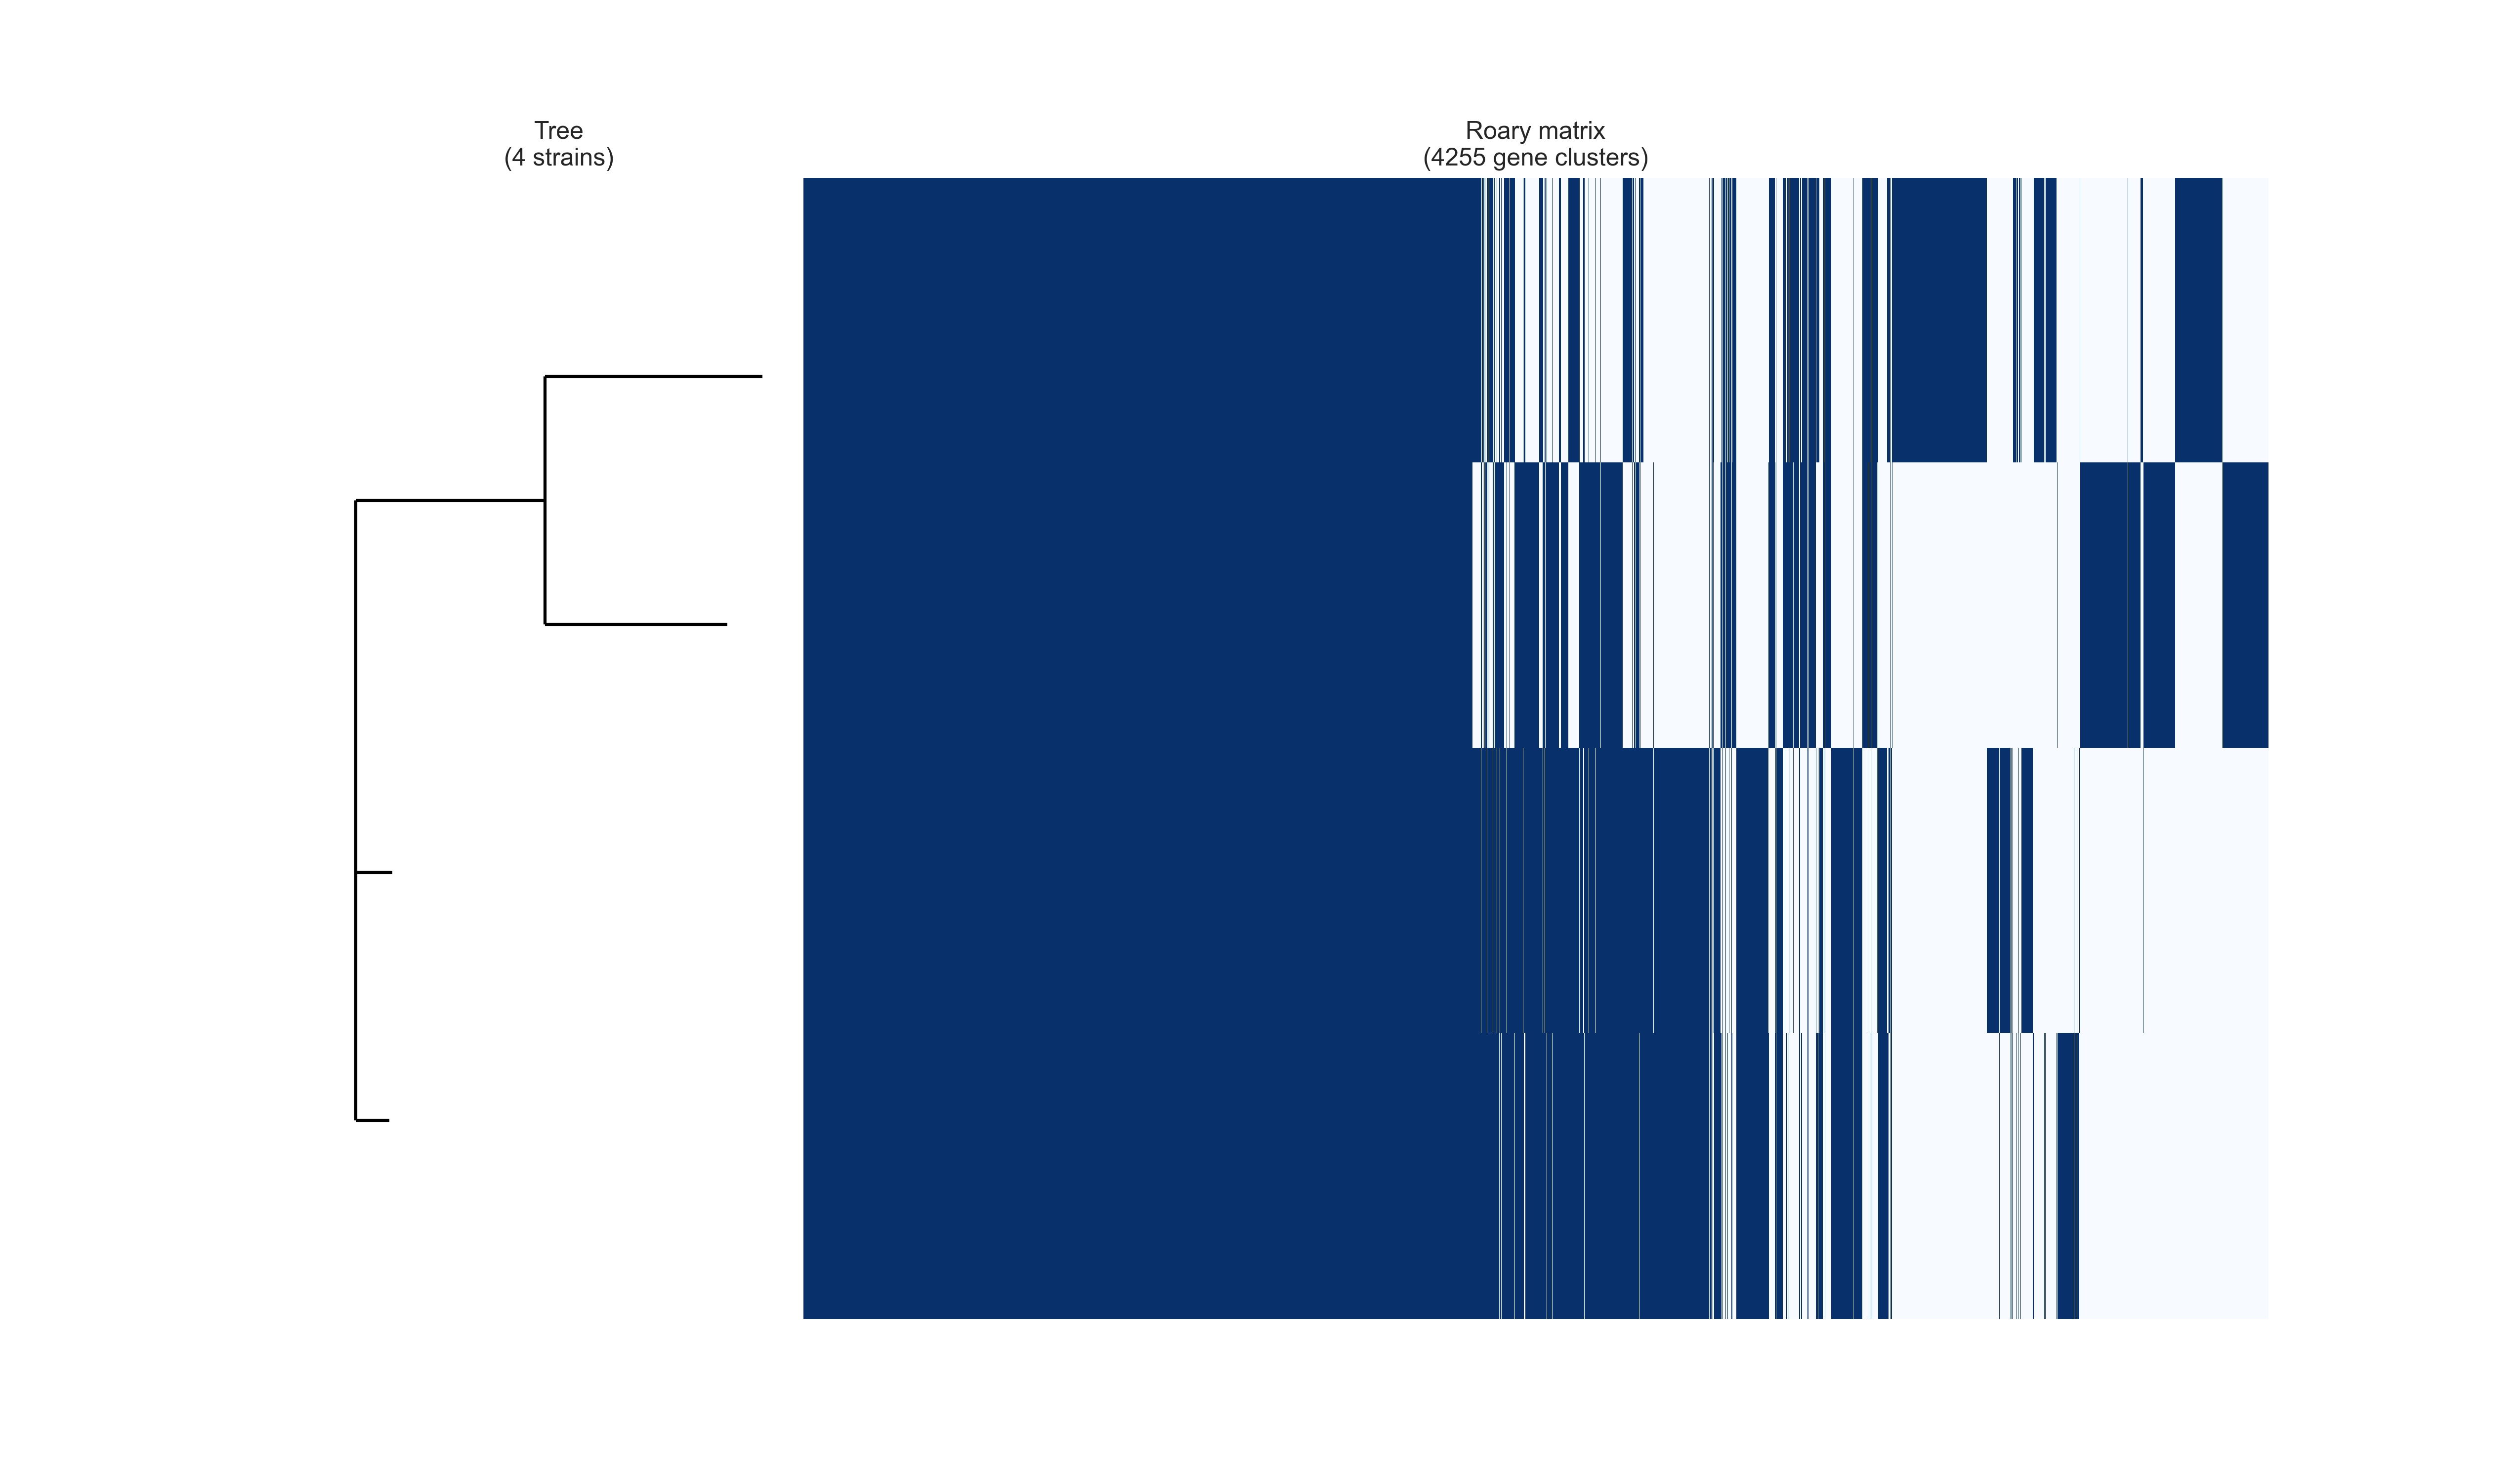

pangenome_matrix.png


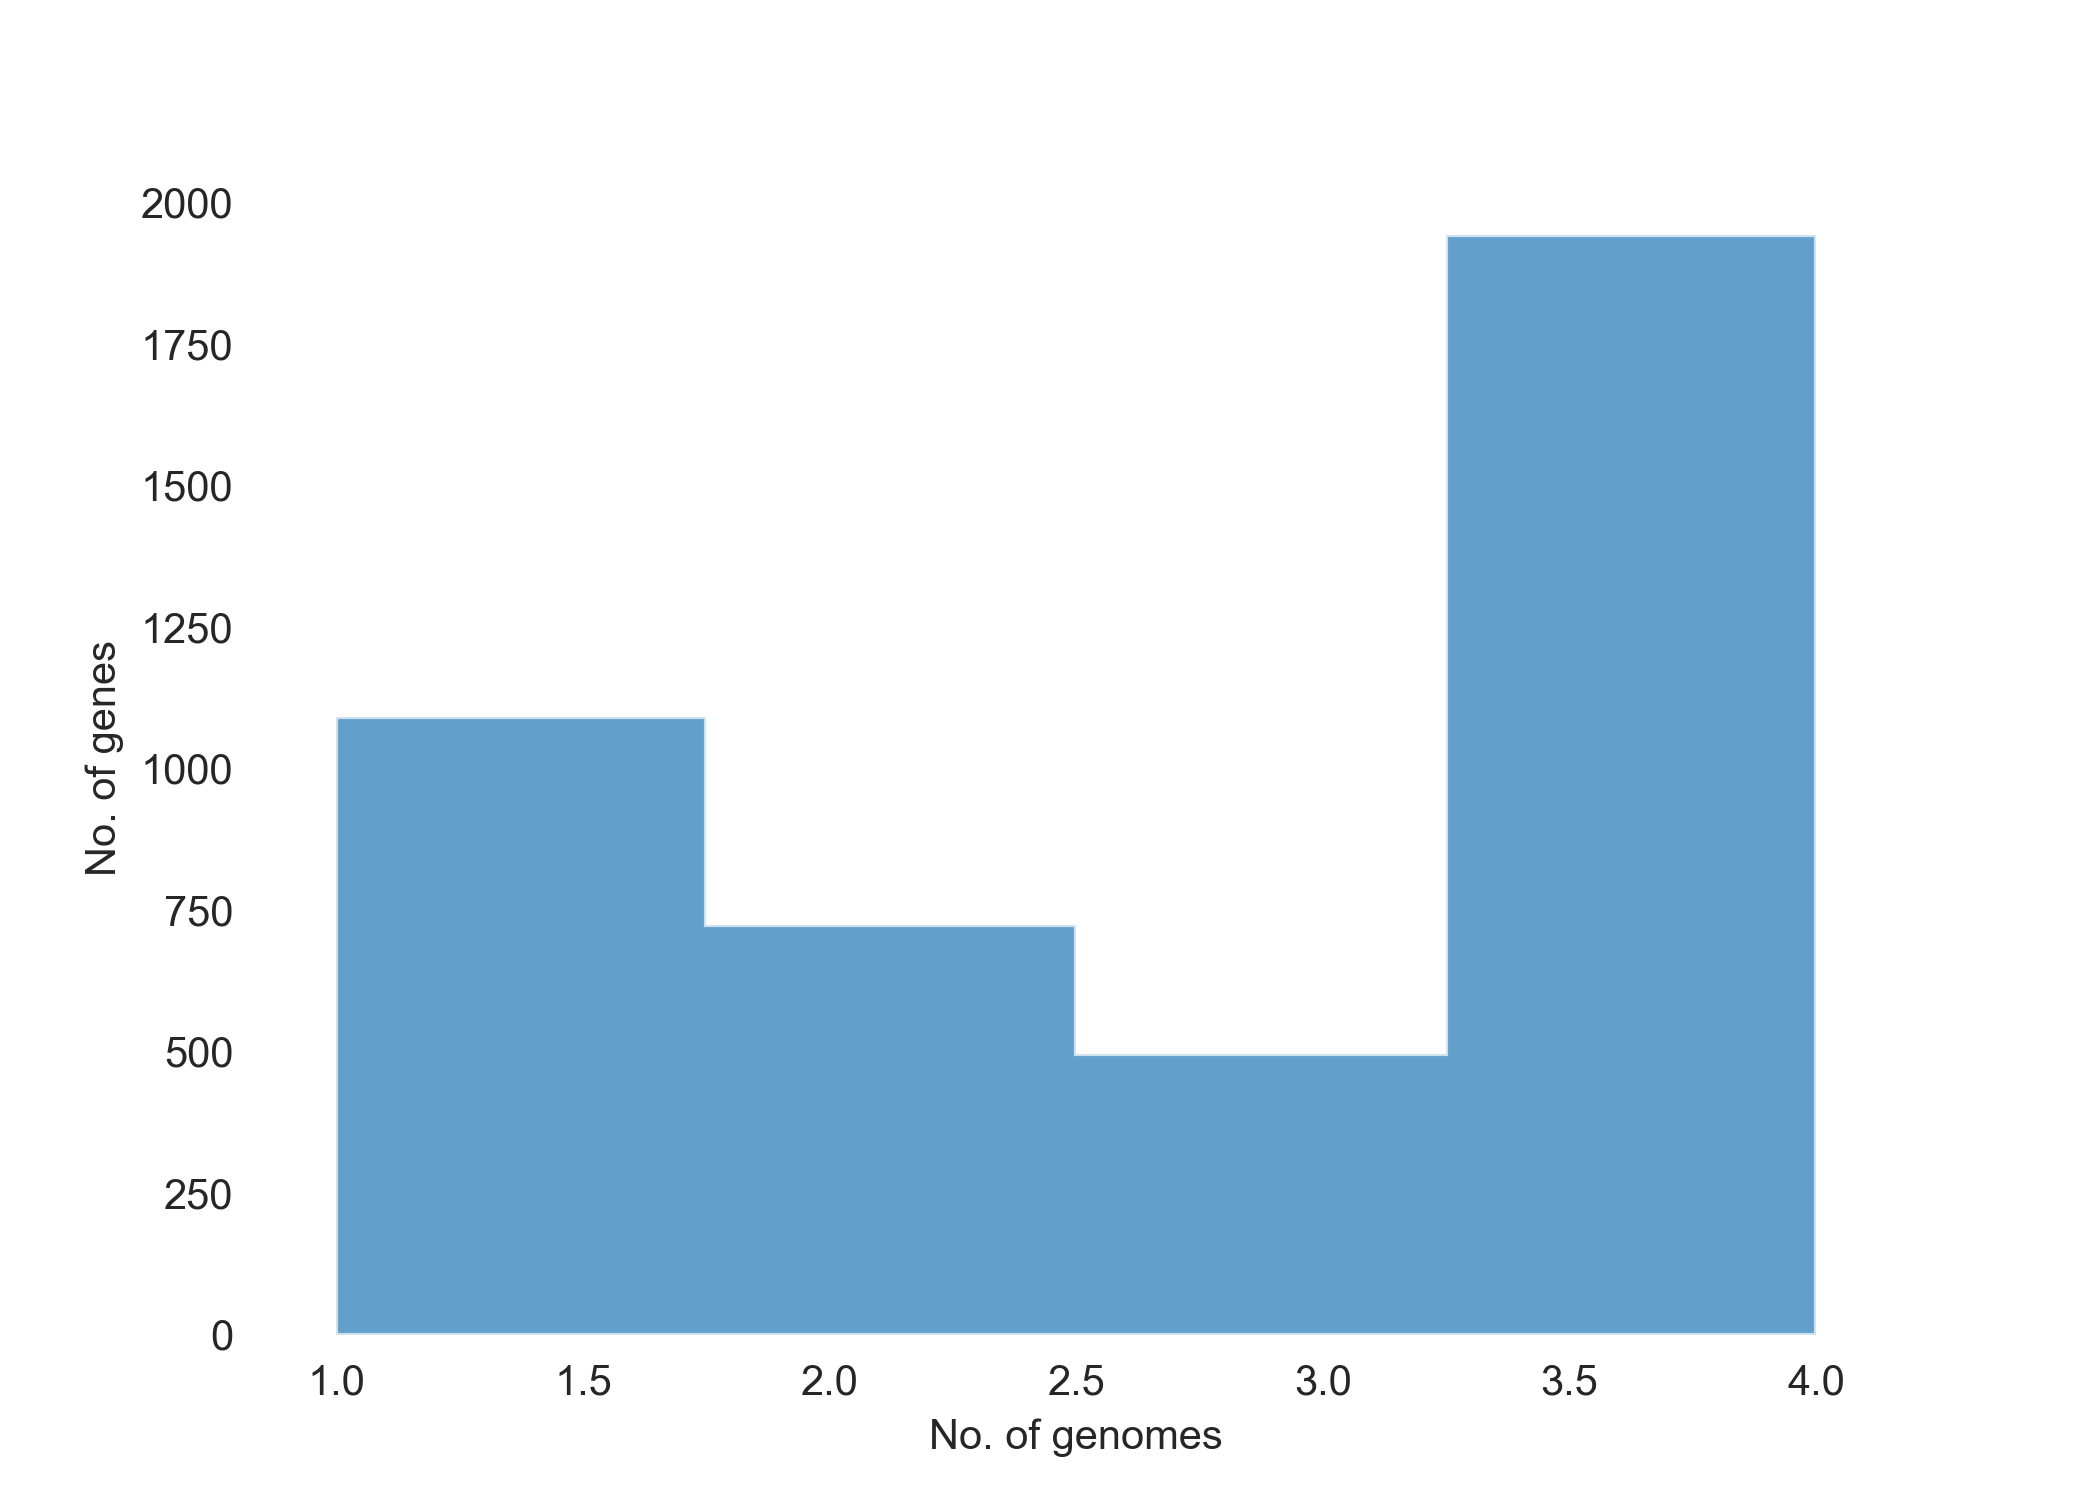

pangenome_frequency.png


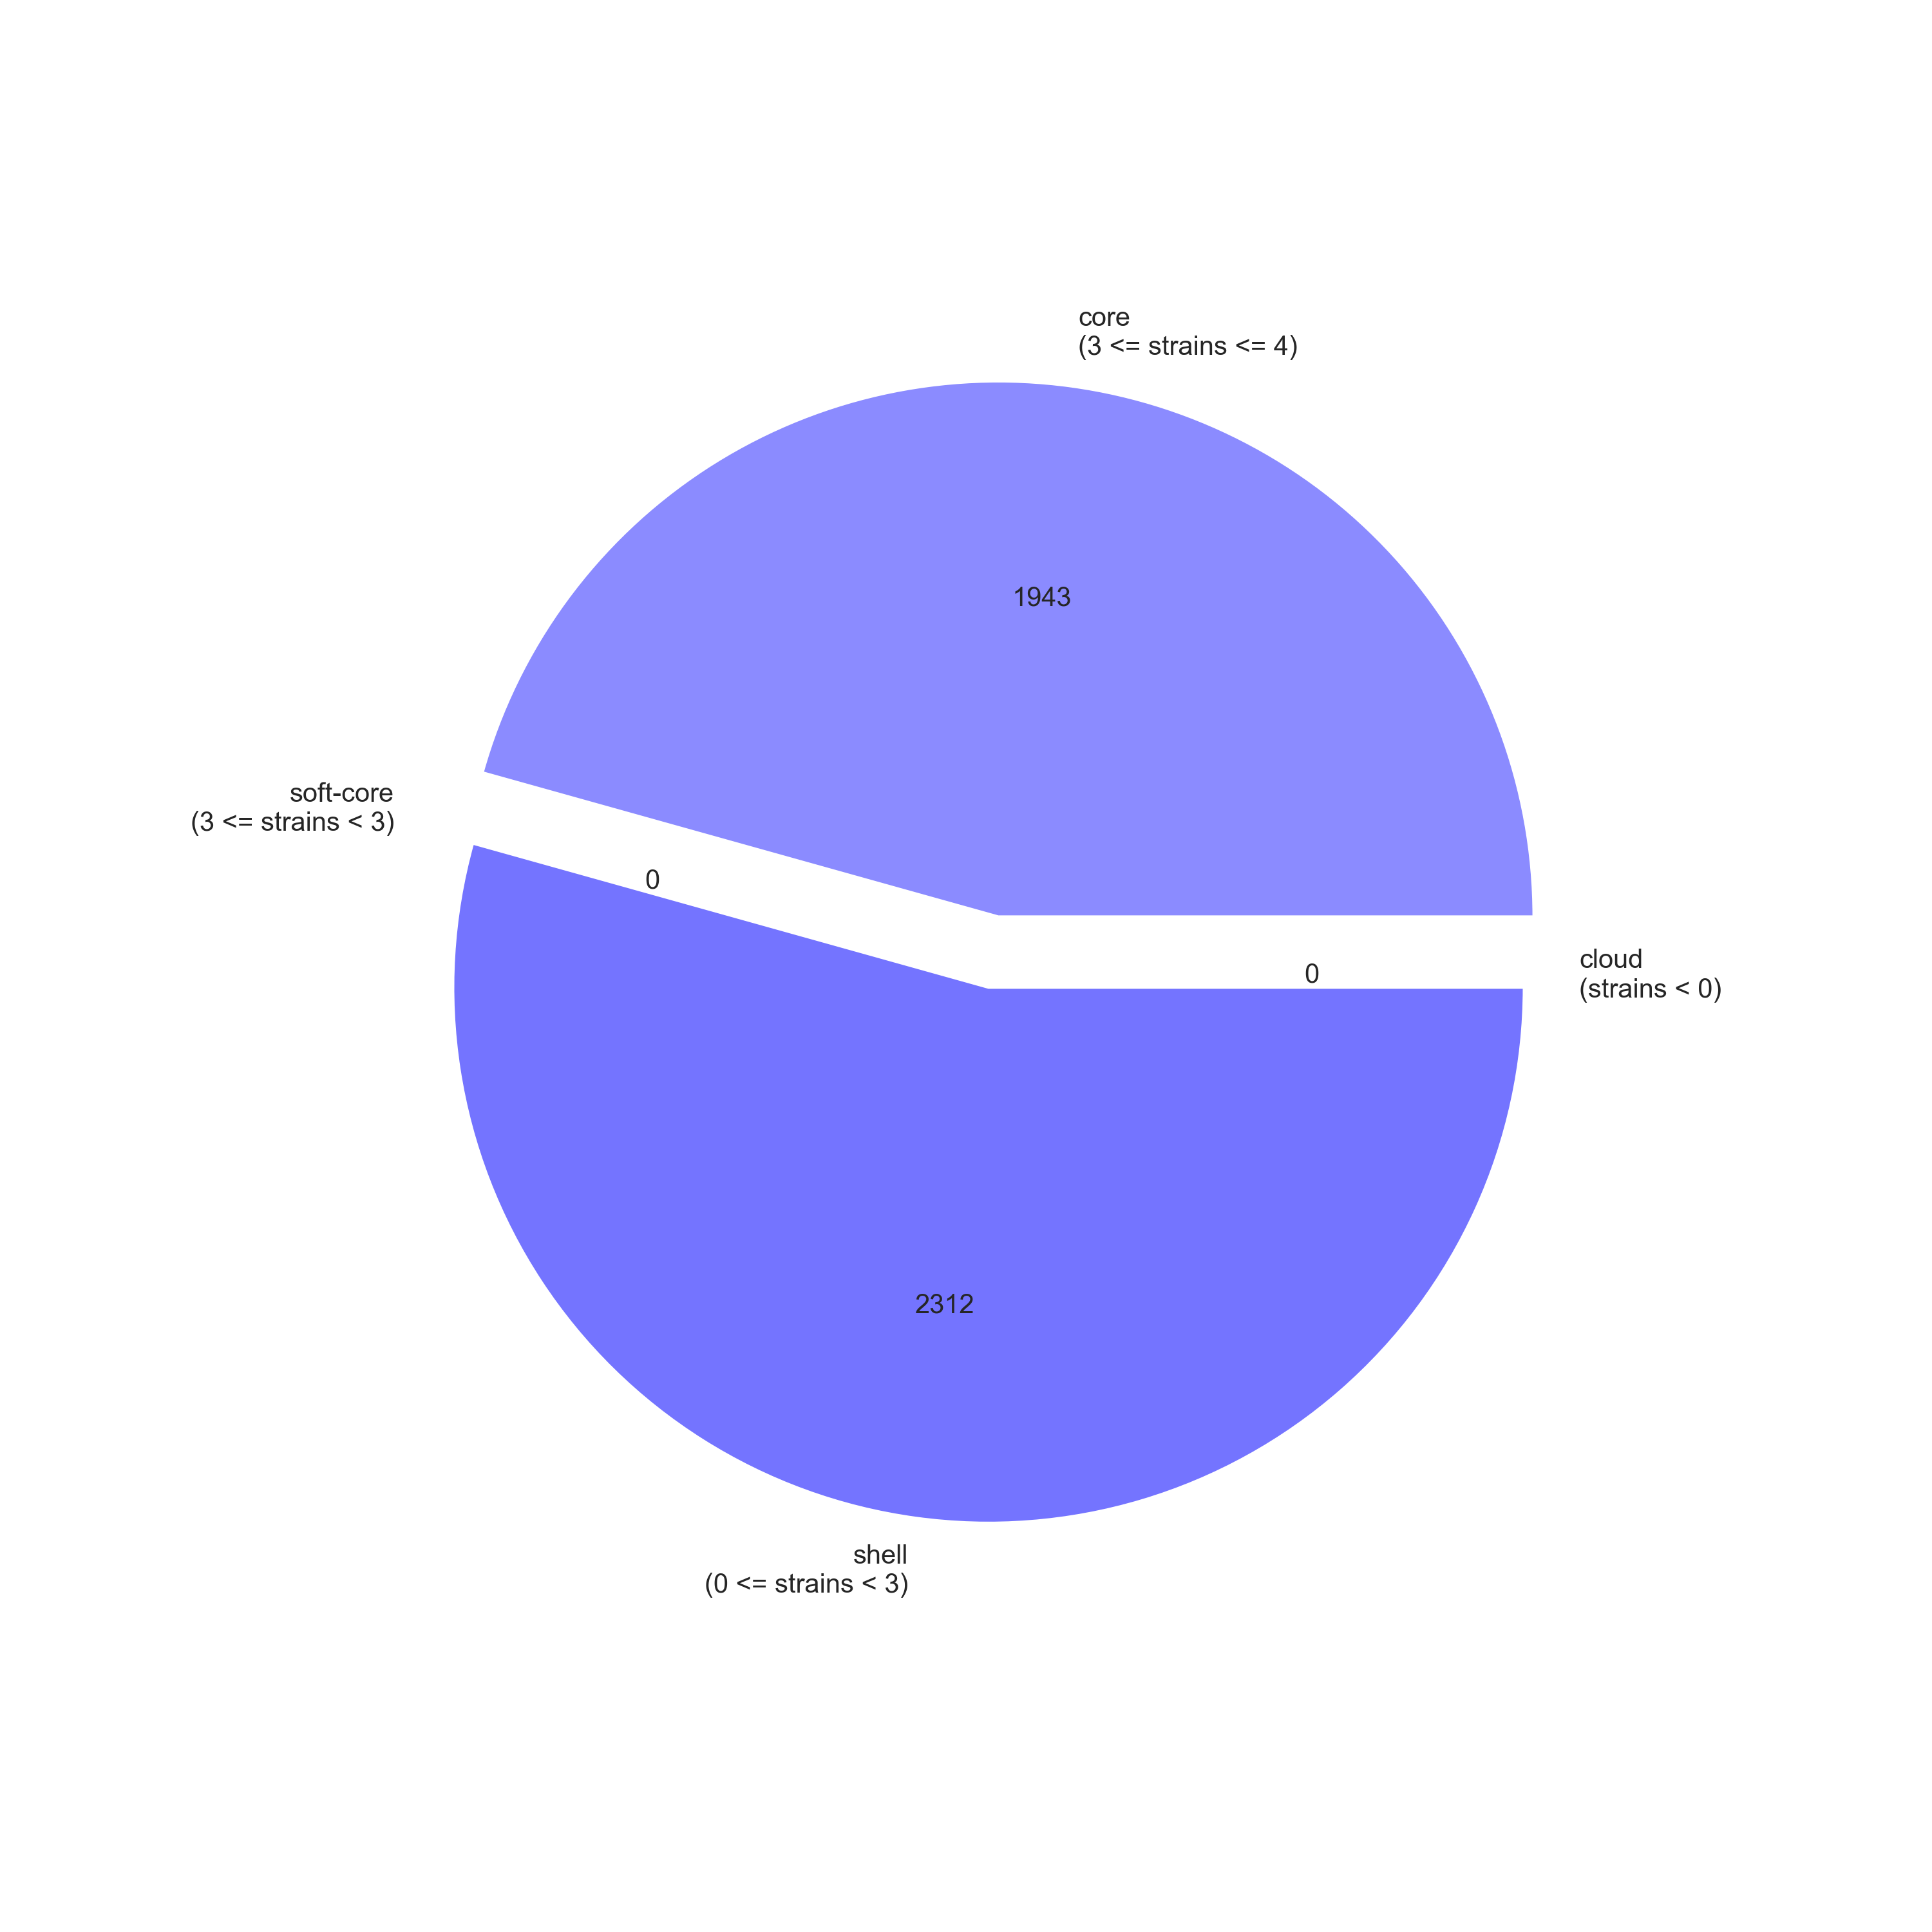

pangenome_pie.png


In [21]:
os.chdir(pwd + "/gff_files/roary")
for imageName in glob('*.png'):
    display(Image(filename=imageName))
    print(imageName)
os.chdir(pwd)

In [22]:
subprocess.run(f"rm {taxon_file}.json""", shell=True)
!rm accession_list.txt
!rm -r info_table.tsv
#!rm -r gff_files/*
#!rm annotated_genomes/*
subprocess.run(f"rm {taxon_file}.zip""", shell=True)
!rm README.md

In [23]:
#criteria for genome selection to strict (assembly-source genbank)? draft sequence -> we do annotation right?
#GenomeDiagramm library
#conda the best way?
#voila

#is it possible to have interaction in jupyter notebook
#circos (input-data?)
# download blast - read up on algorithm
#antismash


#1.upload own genome data
#if empty -> trna-scan, barrnap, prodigal (pcap includes them all)
#anvio